# BMW Pricing
-----
## Exploratory Data Analysis and Forecasting Model

# Imports

In [1]:
%pip install catboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     -------------------------------------- 60.8/60.8 kB 815.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.2/101.7 MB 5.3 MB/s eta 0:00:20
   ---------------------------------------- 0.6/101.7 MB 7.7 MB/s eta 0:00:14
   ---------------------------------------- 1.0/101.7 MB 7.9 MB/s eta 0:00:13
    --------------------------------------- 1.8/101.7 MB 10.1 MB/s eta 0:00:10
    --------------------------------------- 2.1/101.7 MB 9.6 MB/s eta 0:00:11
    --------------------------------------- 2.4/101.7 MB 9.6 MB/s eta 0:00:11
   - -------------------------------------- 3.0/101.7 MB 9.1 MB/s eta 0:00:11
   - -------------------------------------- 3.4/101.7 MB 9.0 MB/s eta 0:00:11
 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ------------- -------------------------- 204.8/625.1 kB 4.1 MB/s eta 0:00:01
   ------------------------------ --------- 471.0/625.1 kB 4.9 MB/s eta 0:00:01
   ---------------------------------------  624.6/625.1 kB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 625.1/625.1 kB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------ --------------------------- 0.9/2.8 MB 27.7 MB/s eta 0:00:01
   --------------------- ------------------ 1.5/2.8 MB 15.9 MB/s eta 0:00:01
   --------------------------------- ------ 2.3/2.8 MB 18.6 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 16.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   --------------------------------------- 301.8/301.8 kB 19.4 MB/s eta 0:00:00
   


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [5]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 393.8 kB/s eta 0:05:18
   ---------------------------------------- 0.3/124.9 MB 2.1 MB/s eta 0:00:59
   ---------------------------------------- 0.8/124.9 MB 4.8 MB/s eta 0:00:26
   ---------------------------------------- 0.8/124.9 MB 4.8 MB/s eta 0:00:26
    --------------------------------------- 1.7/124.9 MB 5.9 MB/s eta 0:00:22
    --------------------------------------- 2.9/124.9 MB 8.6 MB/s eta 0:00:15
   - -------------------------------------- 3.5/124.9 MB 9.2 MB/s eta 0:00:14
   - -------------------------------------- 4.2/124.9 MB 9.9 MB/s eta 0:00:13
   - -------------------------------------- 4.8/124.9 MB 10.3 MB/s eta 0:00:12
   - -------------------------------------- 5.4/124.9 MB 10.4 MB/s eta 0:00


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# standard library
import os
import warnings

# numeric and matrix operations
import numpy as np
import pandas as pd

# datetime
import datetime as dt

# loading plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline

# Machine learning libraries
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


from catboost import CatBoostRegressor
import catboost as cb
from xgboost import XGBRegressor

# Timeseries imports
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import (MinMaxScaler, RobustScaler, FunctionTransformer,
                                   OneHotEncoder, StandardScaler, OrdinalEncoder)

# Suppress warnings
warnings.filterwarnings('ignore')

# Helper Functions

In [7]:
def get_tabla_nulos(dataset):
  """
    Genera una tabla con el recuento de nulos por cada columna y su porcentaje
    sobre el total de registros. Organiza los resultados en orden descendente
    según la cantidad de nulos.
  """
  tabla_nulos = dataset.isnull().sum().sort_values(ascending=False).reset_index()
  tabla_nulos.rename(columns={'index':'columna', 0:'nulos'}, inplace=True)
  tabla_nulos.set_index('columna', inplace=True)
  tabla_nulos['% nulos'] = round(tabla_nulos['nulos']/len(dataset)*100,3)
  return tabla_nulos

In [8]:
def group_low_frequency_values(df, column_name, threshold, replacement_value):
    """
    Agrupa los valores de una columna que tienen una frecuencia inferior al umbral especificado.

    Args:
    df (pd.DataFrame): DataFrame en el que se desea agrupar los valores.
    column_name (str): Nombre de la columna en la que se realizará el agrupamiento.
    threshold (float): Umbral de frecuencia mínima (entre 0 y 1). Los valores con frecuencia inferior se agruparán.
    replacement_value (str): Valor que reemplazará a los valores agrupados.

    Returns:
    pd.Series: Columna con valores agrupados según la frecuencia.
    """
    # Frecuencias
    value_counts = df[column_name].value_counts(normalize=True)

    # Determino que valores tienen una frecuencia menor al umbral
    low_freq_values = value_counts[value_counts < threshold].index

    # Reemplazo
    return df[column_name].replace(low_freq_values, replacement_value)

In [9]:
def plot_correlation_matrix(df, columns=None, title='Matriz de correlación'):
    """
    Visualiza una matriz de correlación para todas las columnas numéricas
    o para las columnas seleccionadas en un DataFrame.

    Parámetros:
    - df: DataFrame de pandas.
    - columns: Lista opcional de columnas para las que se desea ver la correlación.
               Si es None, se utilizarán todas las columnas numéricas.
    - title: Título del gráfico (opcional).
    """
    # Si no se proporcionan columnas, seleccionamos todas las columnas numéricas
    if columns is None:
        corr_matrix = df.corr(numeric_only=True)
    else:
        corr_matrix = df[columns].corr(numeric_only=True)

    # Creación de la visualización de la matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={"shrink": .8})

    # Agregar el título y mejorar los gráficos
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)

    # Mostrar el gráfico
    plt.show()

# Data Loading

In [2102]:
DATA_PATH = '/content/drive/MyDrive/PROJECTS/Prova_DS_SaloOcupacio2024'

In [2103]:
# dataset subsidies
PATH_SUBSIDIES= os.path.join(DATA_PATH, 'Subvencions_atorgades_AjuntBCN_i_Instituts.csv')
df = pd.read_csv(PATH_SUBSIDIES)

# EDA

Hago una exploración inicial de los datos para entenderlos y detectar eventuales problemas para solucionar.

## Estructura del dataset

In [2104]:
df.head()

Entitat_Municipal                                       Organ_Gestor  \
0  Ajuntament de Barcelona  Gerència Drets de Ciutadania, Participació i T...   
1  Ajuntament de Barcelona                          Gerència de Drets Socials   
2  Ajuntament de Barcelona  Gerència Drets de Ciutadania, Participació i T...   
3  Ajuntament de Barcelona                           Gerència Ecologia Urbana   
4  Ajuntament de Barcelona                           Gerència Ecologia Urbana   

                            Beneficiari    NIF_CIF  \
0          ASSOCIACIO UCRAINESA DJERELO  G65874968   
1      PROJECTE DELS NOMS - HISPANOSIDA  G60396280   
2          ASSOCIACIÓ CULTURAL TUDANZAS  G66661653   
3   ASSOC PROMOCIÓ ADOPCIO I ACOLLIMENT  G66956624   
4   DEPANA LIGA PARA LA DEFENSADEL PATR  G58459280   

                              Tipologia_De_Subvencio Codi_De_Subvencio  \
0  CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019.DRETS...          19S00465   
1  CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019. GERÈ...          19S00469   
2  CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019.DRETS...          19S00470   
3  CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019. ECOL...          19S00483   
4  CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019. ECOL...          19S00485   

                                         Objecte Data_Convocatoria  \
0                                 V Ucrania Fest        24.01.2019   
1          26è Memorial Internacional de la Sida        24.01.2019   
2                  Festival Social Tudanzas 2019        24.01.2019   
3   ACOLLIDES,SOCIALITZACIÓ I PROMOCIÓ DELS ANIM        24.01.2019   
4                      D'ON VENEN LES TORTUGUES?        24.01.2019   

  Data_Atorgament  Import_Sollicitat  Import_Total_Projecte  \
0      16.09.2019             5000.0                14900.0   
1      12.09.2019             4000.0                13000.0   
2      04.10.2019             2000.0                31220.0   
3      09.07.2019             2000.0                 5550.0   
4      12.09.2019             3000.0                 6000.0   

   Import_Atorgat_Inicial  Import_Reintegrat_Total  
0                  4500.0                      0.0  
1                  3000.0                      0.0  
2                  1000.0                      0.0  
3                  1950.0                      0.0  
4                   980.0                      0.0

In [2105]:
df.tail()

Entitat_Municipal Organ_Gestor  \
61691  Institut Municipal Barcelona Esports          NaN   
61692  Institut Municipal Barcelona Esports          NaN   
61693  Institut Municipal Barcelona Esports          NaN   
61694  Institut Municipal Barcelona Esports          NaN   
61695  Institut Municipal Barcelona Esports          NaN   

                             Beneficiari    NIF_CIF  \
61691            CLUB NATACION BARCELONA  G08533689   
61692  REAL CLUB DE TENIS BARCELONA-1899  G08555278   
61693             Unió Esportiva d'Horta  G08675738   
61694   Fed Esp Cat Paralítics Cerebrals  G60121043   
61695   Fed Esp Cat Paralítics Cerebrals  G60121043   

                           Tipologia_De_Subvencio Codi_De_Subvencio  \
61691  SUBVENCIONS DIRECTES (amb o sense CONVENI)          20S00988   
61692  SUBVENCIONS DIRECTES (amb o sense CONVENI)          20S00989   
61693  SUBVENCIONS DIRECTES (amb o sense CONVENI)          20S00991   
61694  SUBVENCIONS DIRECTES (amb o sense CONVENI)          21S00311   
61695  SUBVENCIONS DIRECTES (amb o sense CONVENI)          21S00313   

                                             Objecte Data_Convocatoria  \
61691  Convocatòria subv entitats esportives - COVID        00.00.0000   
61692  Convocatòria subv entitats esportives - COVID        00.00.0000   
61693  Convocatòria subv entitats esportives - COVID        00.00.0000   
61694              Conveni DIBA 2020 - Esdeveniments        00.00.0000   
61695              Conveni DIBA 2020 - Esdeveniments        00.00.0000   

      Data_Atorgament  Import_Sollicitat  Import_Total_Projecte  \
61691      31.12.2020           25000.00               25000.00   
61692      31.12.2020           25000.00               25000.00   
61693      31.12.2020           18993.41               18993.41   
61694      06.05.2021            5000.00                5000.00   
61695      29.04.2021            8000.00                8000.00   

       Import_Atorgat_Inicial  Import_Reintegrat_Total  
61691                25000.00                      0.0  
61692                25000.00                      0.0  
61693                18993.41                      0.0  
61694                 5000.00                      0.0  
61695                 8000.00                      0.0

Primeros problemas detectados:
- En Data_Convocatoria hay fechas con solos zeros.


In [2106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61696 entries, 0 to 61695
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entitat_Municipal        61696 non-null  object 
 1   Organ_Gestor             54915 non-null  object 
 2   Beneficiari              61696 non-null  object 
 3   NIF_CIF                  61696 non-null  object 
 4   Tipologia_De_Subvencio   61132 non-null  object 
 5   Codi_De_Subvencio        61696 non-null  object 
 6   Objecte                  61696 non-null  object 
 7   Data_Convocatoria        61696 non-null  object 
 8   Data_Atorgament          61696 non-null  object 
 9   Import_Sollicitat        61696 non-null  float64
 10  Import_Total_Projecte    61696 non-null  float64
 11  Import_Atorgat_Inicial   61696 non-null  float64
 12  Import_Reintegrat_Total  61696 non-null  float64
dtypes: float64(4), object(9)
memory usage: 6.1+ MB


Las dos columnas que indican fechas deben transformarse en datetime.

In [2107]:
df['Data_Convocatoria'] = pd.to_datetime(df['Data_Convocatoria'], dayfirst=True, errors='coerce')
df['Data_Atorgament'] = pd.to_datetime(df['Data_Atorgament'], dayfirst=True, errors='coerce')

In [2108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61696 entries, 0 to 61695
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Entitat_Municipal        61696 non-null  object        
 1   Organ_Gestor             54915 non-null  object        
 2   Beneficiari              61696 non-null  object        
 3   NIF_CIF                  61696 non-null  object        
 4   Tipologia_De_Subvencio   61132 non-null  object        
 5   Codi_De_Subvencio        61696 non-null  object        
 6   Objecte                  61696 non-null  object        
 7   Data_Convocatoria        33807 non-null  datetime64[ns]
 8   Data_Atorgament          61410 non-null  datetime64[ns]
 9   Import_Sollicitat        61696 non-null  float64       
 10  Import_Total_Projecte    61696 non-null  float64       
 11  Import_Atorgat_Inicial   61696 non-null  float64       
 12  Import_Reintegrat_Total  61696 n

In [2109]:
df.nunique()

Entitat_Municipal             12
Organ_Gestor                  48
Beneficiari                25247
NIF_CIF                    18885
Tipologia_De_Subvencio       260
Codi_De_Subvencio          49175
Objecte                    34016
Data_Convocatoria            111
Data_Atorgament             1338
Import_Sollicitat          13174
Import_Total_Projecte      27191
Import_Atorgat_Inicial     12897
Import_Reintegrat_Total     1130
dtype: int64

Resumen del contenido de las columnas:
 - **Entitat_Municipal**: La entidad municipal que ha otorgado la subvención.
 - **Organ_Gestor**: El órgano que ha gestionado la subvención dentro de la administración municipal.
 - **Beneficiari**: El beneficiario de la subvención, generalmente una persona u organización.
 - **NIF_CIF**: El código fiscal o CIF (Código de Identificación Fiscal) del beneficiario, que identifica a la empresa u organización.
 - **Tipologia_De_Subvencio**: La tipología de la subvención, por ejemplo, subvenciones para proyectos culturales, sociales, deportivos, etc.
 - **Codi_De_Subvencio**: El código identificativo de la subvención, utilizado para rastrear y gestionar la subvención específica.
 - **Objecte**: La descripción del objeto o propósito de la subvención, es decir, la razón o el proyecto para el cual fue otorgada.
 - **Data_Convocatoria**: La fecha de convocatoria, es decir, cuando se abrió la convocatoria para solicitar la subvención.
 - **Data_Atorgament**: La fecha en que la subvención fue efectivamente concedida o asignada al beneficiario.
 - **Import_Sollicitat**: El importe solicitado por el beneficiario en la solicitud de subvención.
 - **Import_Total_Projecte**: El importe total del proyecto para el cual se solicitó la subvención.
 - **Import_Atorgat_Inicial**: El importe inicial que se concedió al beneficiario.
 - **Import_Reintegrat_Total**: El importe total reintegrado por el beneficiario, si una parte de la subvención ha sido reintegrada (por ejemplo, si el proyecto no se completó como se previó o se encontraron fondos en exceso).


## Control de valores nulos

In [2110]:
# Control de valores nulos
get_tabla_nulos(df)

nulos  % nulos
columna                                
Data_Convocatoria        27889   45.204
Organ_Gestor              6781   10.991
Tipologia_De_Subvencio     564    0.914
Data_Atorgament            286    0.464
Entitat_Municipal            0    0.000
Beneficiari                  0    0.000
NIF_CIF                      0    0.000
Codi_De_Subvencio            0    0.000
Objecte                      0    0.000
Import_Sollicitat            0    0.000
Import_Total_Projecte        0    0.000
Import_Atorgat_Inicial       0    0.000
Import_Reintegrat_Total      0    0.000

## Control de registros duplicados

In [2111]:
# Control de duplicados
df.duplicated().sum()

0

In [2112]:
df.columns.to_list()

['Entitat_Municipal',
 'Organ_Gestor',
 'Beneficiari',
 'NIF_CIF',
 'Tipologia_De_Subvencio',
 'Codi_De_Subvencio',
 'Objecte',
 'Data_Convocatoria',
 'Data_Atorgament',
 'Import_Sollicitat',
 'Import_Total_Projecte',
 'Import_Atorgat_Inicial',
 'Import_Reintegrat_Total']

In [2113]:
# verifico si hay duplicados a nivel de subvención ortogada
df.duplicated(subset=[
              'Entitat_Municipal',
              'Organ_Gestor',
              'Beneficiari',
              'NIF_CIF',
              'Tipologia_De_Subvencio',
              'Codi_De_Subvencio',
              'Objecte']).sum()

0

No hay duplicados en el dataset.

## Analisis univariante - Variables numericas

In [2114]:
df.describe()

Data_Convocatoria                Data_Atorgament  \
count                          33807                          61410   
mean   2020-12-18 12:34:00.713461504  2021-10-02 02:02:31.245725696   
min              2017-02-02 00:00:00            2016-04-01 00:00:00   
25%              2019-04-01 00:00:00            2020-01-07 00:00:00   
50%              2020-06-02 00:00:00            2021-10-04 00:00:00   
75%              2022-05-03 00:00:00            2022-12-30 00:00:00   
max              2024-04-23 00:00:00            2024-09-04 00:00:00   
std                              NaN                            NaN   

       Import_Sollicitat  Import_Total_Projecte  Import_Atorgat_Inicial  \
count       6.169600e+04           6.169600e+04            6.169600e+04   
mean        3.262258e+04           3.717274e+04            1.174707e+05   
min         0.000000e+00           0.000000e+00           -4.700000e+06   
25%         1.000000e+03           1.500000e+03            1.000000e+03   
50%         3.200000e+03           6.412705e+03            2.250000e+03   
75%         9.000000e+03           2.000000e+04            6.000000e+03   
max         1.620830e+08           1.506817e+08            1.607830e+08   
std         1.188566e+06           6.939191e+05            2.112606e+06   

       Import_Reintegrat_Total  
count             6.169600e+04  
mean              1.067048e+02  
min               0.000000e+00  
25%               0.000000e+00  
50%               0.000000e+00  
75%               0.000000e+00  
max               1.185303e+06  
std               5.104336e+03

Problemas detectados:
- Hay subvenciones con importe solicitado de cero euros y importe ortogado positivo.
- Hay importes totales de proyectos igual a cero.
- Hay importes ortogados negativos
- posibles outliers en cada campo numerico
- Almenos el 75% de los importes reintegrados es cero.
- Hay fechas anteriores al año 2019 tanto en Data_Convocatoria, como en Data_Atorgament. El dataset deberñia ser solamente desde 2019 en adelante

Analizo la distribución de las variables numericas

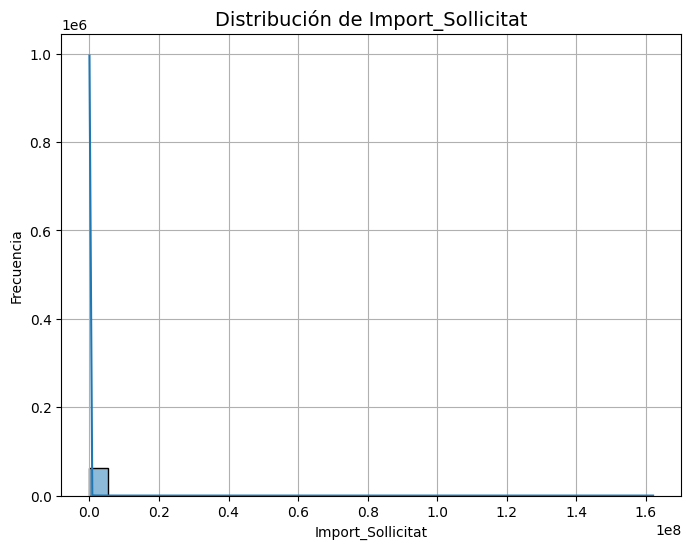

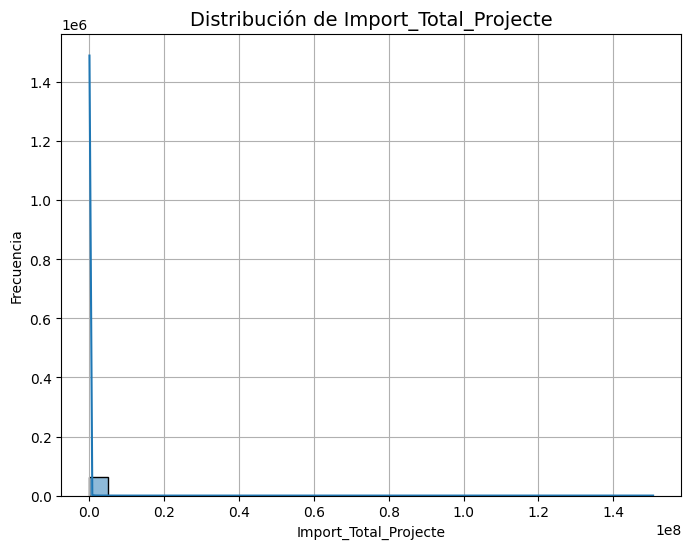

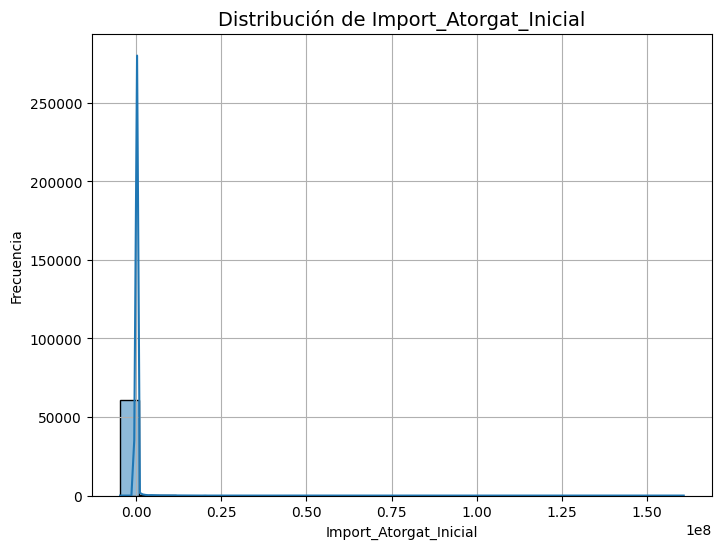

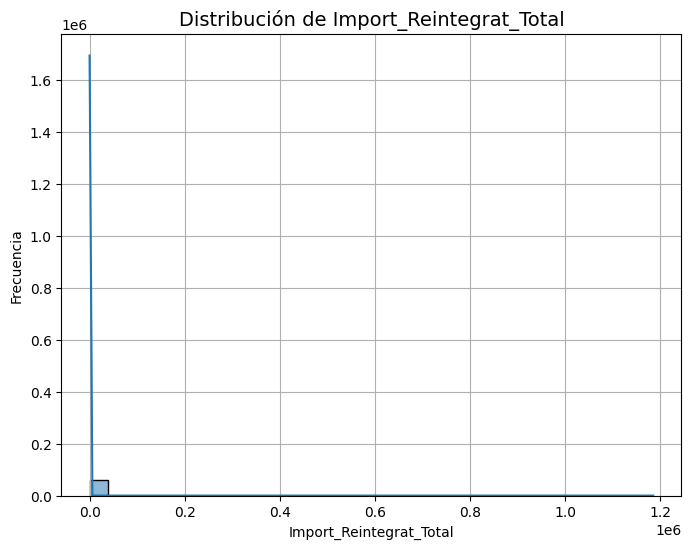

In [2115]:
#Lista de las columnas numéricas
numeric_cols = df.select_dtypes(include=['float64']).columns.to_list()

# Ploteo histograma más KDE
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribución de {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()



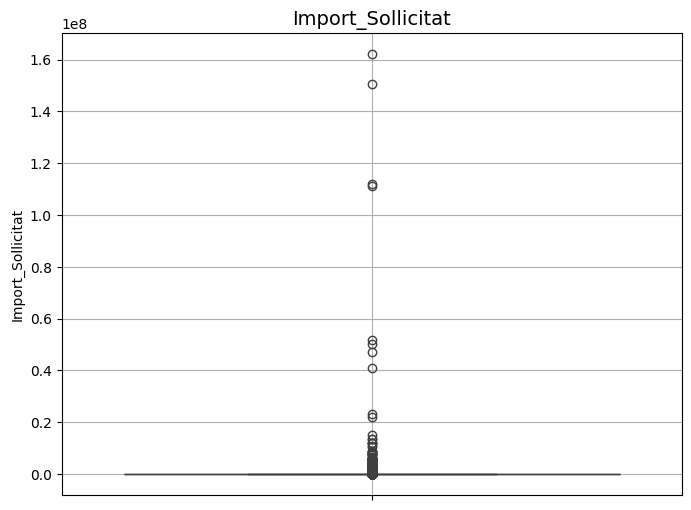

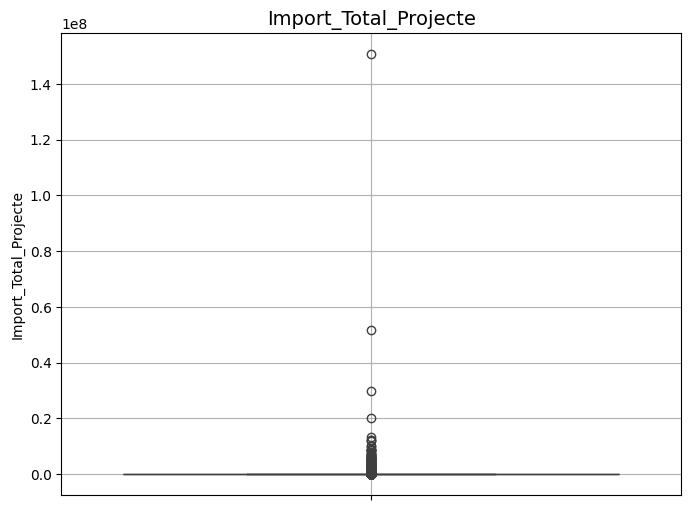

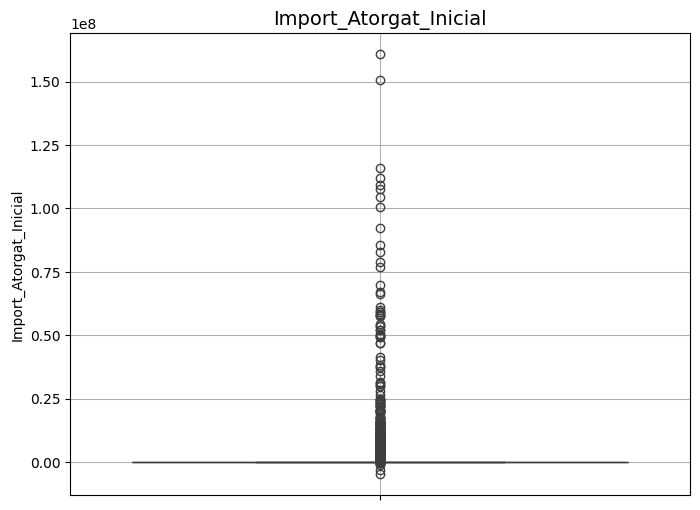

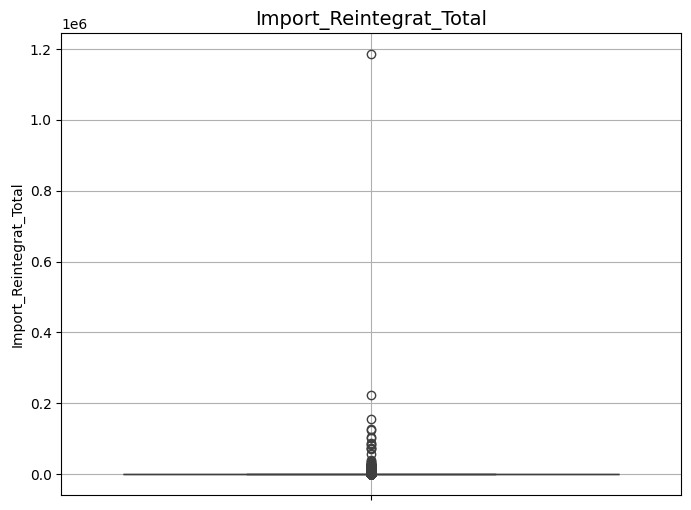

In [2116]:
# Ploteo boxplot
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[col])
    plt.title(f'{col}', fontsize=14)
    plt.grid(True)
    plt.show()

Podemos observar lo siguiente:

1. **Concentración de importes bajos**: La gran mayoría de las subvenciones . tienen importes solicitados y otorgados bajos, cercanos a 0, lo que indica que muchas subvenciones están destinadas a proyectos de menor envergadura.

2. **Presencia de outliers significativos**: Hay valores extremos (outliers) en todas estas columnas, con importes que alcanzan decenas o incluso cientos de millones de euros, lo que probablemente corresponde a subvenciones de gran magnitud destinadas a grandes proyectos o entidades públicas.

3. **Distribución altamente asimétrica**: La distribución de los importes está claramente sesgada hacia la derecha, lo que significa que, aunque la mayoría de los proyectos reciben subvenciones pequeñas, hay unos pocos casos excepcionales que concentran una cantidad desproporcionada de fondos.

4. **Disparidad entre proyectos**: Esta distribución muestra una gran disparidad en los montos de las subvenciones, con una brecha considerable entre los proyectos de menor y mayor envergadura, lo que sugiere que el programa de subvenciones cubre tanto pequeñas iniciativas locales como grandes proyectos institucionales.

Veamos que subvenciones son las que reciben la mayor cantidad de fondos

In [2117]:
df.columns.to_list()

['Entitat_Municipal',
 'Organ_Gestor',
 'Beneficiari',
 'NIF_CIF',
 'Tipologia_De_Subvencio',
 'Codi_De_Subvencio',
 'Objecte',
 'Data_Convocatoria',
 'Data_Atorgament',
 'Import_Sollicitat',
 'Import_Total_Projecte',
 'Import_Atorgat_Inicial',
 'Import_Reintegrat_Total']

In [2118]:
df[df['Import_Atorgat_Inicial']>0.25e8]['Tipologia_De_Subvencio'].value_counts(normalize=True)*100

Tipologia_De_Subvencio
TRANSFERÈNCIES ENS PÚBLICS I ALTRES    100.0
Name: proportion, dtype: float64

In [2119]:
df[df['Import_Atorgat_Inicial']>0.25e8][[

    'Entitat_Municipal',
    'Organ_Gestor',
    'Beneficiari',
    'Objecte',
    'Import_Atorgat_Inicial'
]].sort_values('Import_Atorgat_Inicial')


Entitat_Municipal  \
7160   Ajuntament de Barcelona   
6851   Ajuntament de Barcelona   
50563  Ajuntament de Barcelona   
6592   Ajuntament de Barcelona   
45078  Ajuntament de Barcelona   
11966  Ajuntament de Barcelona   
43395  Ajuntament de Barcelona   
25882  Ajuntament de Barcelona   
42653  Ajuntament de Barcelona   
11944  Ajuntament de Barcelona   
25883  Ajuntament de Barcelona   
46611  Ajuntament de Barcelona   
5065   Ajuntament de Barcelona   
6605   Ajuntament de Barcelona   
26959  Ajuntament de Barcelona   
5067   Ajuntament de Barcelona   
11934  Ajuntament de Barcelona   
1901   Ajuntament de Barcelona   
52964  Ajuntament de Barcelona   
24386  Ajuntament de Barcelona   
48400  Ajuntament de Barcelona   
6795   Ajuntament de Barcelona   
31702  Ajuntament de Barcelona   
26011  Ajuntament de Barcelona   
48433  Ajuntament de Barcelona   
52952  Ajuntament de Barcelona   
24413  Ajuntament de Barcelona   
24178  Ajuntament de Barcelona   
29065  Ajuntament de Barcelona   
11935  Ajuntament de Barcelona   
26050  Ajuntament de Barcelona   
11946  Ajuntament de Barcelona   
6811   Ajuntament de Barcelona   
31267  Ajuntament de Barcelona   
31266  Ajuntament de Barcelona   
25606  Ajuntament de Barcelona   
11933  Ajuntament de Barcelona   
32636  Ajuntament de Barcelona   
50554  Ajuntament de Barcelona   
27376  Ajuntament de Barcelona   
11680  Ajuntament de Barcelona   
24221  Ajuntament de Barcelona   
25742  Ajuntament de Barcelona   
5055   Ajuntament de Barcelona   
6810   Ajuntament de Barcelona   
24628  Ajuntament de Barcelona   
1899   Ajuntament de Barcelona   
6617   Ajuntament de Barcelona   
18786  Ajuntament de Barcelona   
4951   Ajuntament de Barcelona   

                                            Organ_Gestor  \
7160   Gerència d'Area de Drets Socials, Justícia Glo...   
6851   Gerència d'Àrea d'Agenda 2030, Transició Digit...   
50563  Gerència d’Àrea d’Economia, Recursos i Promoci...   
6592   Gerència d’Àrea d’Economia, Recursos i Promoci...   
45078  Gerència d'Area de Drets Socials, Justícia Glo...   
11966                 Gerència de Presidència i Economia   
43395  Gerència d’Àrea d’Economia, Recursos i Promoci...   
25882  Gerència d’Àrea d’Economia, Recursos i Promoci...   
42653  Gerència d’Àrea de Cultura, Educació, Ciència ...   
11944  Gerència d’Àrea d’Economia, Recursos i Promoci...   
25883  Gerència d’Àrea d’Economia, Recursos i Promoci...   
46611                 Gerència de Pressupostos i Hisenda   
5065                           Gerència de Drets Socials   
6605             Gerència d'Empresa, Cultura i Innovació   
26959            Gerència d'Empresa, Cultura i Innovació   
5067                           Gerència de Drets Socials   
11934  Gerència d’Àrea de Cultura, Educació, Ciència ...   
1901    Gerència Adjunta de Mediambient i Serveis Urbans   
52964   Gerència Adjunta de Mediambient i Serveis Urbans   
24386  Gerència d’Àrea de Cultura, Educació, Ciència ...   
48400  Gerència d'Àrea d'Agenda 2030, Transició Digit...   
6795   Gerència d’Àrea de Cultura, Educació, Ciència ...   
31702  Gerència d'Àrea d'Agenda 2030, Transició Digit...   
26011                 Gerència de Pressupostos i Hisenda   
48433                 Gerència de Pressupostos i Hisenda   
52952                 Gerència de Pressupostos i Hisenda   
24413  Gerència d’Àrea de Cultura, Educació, Ciència ...   
24178                                                NaN   
29065  Gerència adjunta d'Infraestructures i Coordina...   
11935  Gerència d’Àrea de Cultura, Educació, Ciència ...   
26050                                                NaN   
11946   Gerència Adjunta de Mediambient i Serveis Urbans   
6811   Gerència d’Àrea de Cultura, Educació, Ciència ...   
31267  Gerència d’Àrea de Cultura, Educació, Ciència ...   
31266  Gerència d’Àrea de Cultura, Educació, Ciència ...   
25606  Gerència d’Àrea de Cultura, Educació, Ciència ...   
11933  Gerència d’Àrea de Cultura, Educació, Ciència ...  

In [2120]:
df[df['Import_Atorgat_Inicial']<0.2e8]

Entitat_Municipal  \
0                   Ajuntament de Barcelona   
1                   Ajuntament de Barcelona   
2                   Ajuntament de Barcelona   
3                   Ajuntament de Barcelona   
4                   Ajuntament de Barcelona   
...                                     ...   
61691  Institut Municipal Barcelona Esports   
61692  Institut Municipal Barcelona Esports   
61693  Institut Municipal Barcelona Esports   
61694  Institut Municipal Barcelona Esports   
61695  Institut Municipal Barcelona Esports   

                                            Organ_Gestor  \
0      Gerència Drets de Ciutadania, Participació i T...   
1                              Gerència de Drets Socials   
2      Gerència Drets de Ciutadania, Participació i T...   
3                               Gerència Ecologia Urbana   
4                               Gerència Ecologia Urbana   
...                                                  ...   
61691                                                NaN   
61692                                                NaN   
61693                                                NaN   
61694                                                NaN   
61695                                                NaN   

                                Beneficiari    NIF_CIF  \
0              ASSOCIACIO UCRAINESA DJERELO  G65874968   
1          PROJECTE DELS NOMS - HISPANOSIDA  G60396280   
2              ASSOCIACIÓ CULTURAL TUDANZAS  G66661653   
3       ASSOC PROMOCIÓ ADOPCIO I ACOLLIMENT  G66956624   
4       DEPANA LIGA PARA LA DEFENSADEL PATR  G58459280   
...                                     ...        ...   
61691               CLUB NATACION BARCELONA  G08533689   
61692     REAL CLUB DE TENIS BARCELONA-1899  G08555278   
61693                Unió Esportiva d'Horta  G08675738   
61694      Fed Esp Cat Paralítics Cerebrals  G60121043   
61695      Fed Esp Cat Paralítics Cerebrals  G60121043   

                                  Tipologia_De_Subvencio Codi_De_Subvencio  \
0      CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019.DRETS...          19S00465   
1      CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019. GERÈ...          19S00469   
2      CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019.DRETS...          19S00470   
3      CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019. ECOL...          19S00483   
4      CONVOCATÒRIA GENERAL DE SUBVENCIONS 2019. ECOL...          19S00485   
...                                                  ...               ...   
61691         SUBVENCIONS DIRECTES (amb o sense CONVENI)          20S00988   
61692         SUBVENCIONS DIRECTES (amb o sense CONVENI)          20S00989   
61693         SUBVENCIONS DIRECTES (amb o sense CONVENI)          20S00991   
61694         SUBVENCIONS DIRECTES (amb o sense CONVENI)          21S00311   
61695         SUBVENCIONS DIRECTES (amb o sense CONVENI)          21S00313   

                                             Objecte Data_Convocatoria  \
0                                     V Ucrania Fest        2019-01-24   
1              26è Memorial Internacional de la Sida        2019-01-24   
2                      Festival Social Tudanzas 2019        2019-01-24   
3       ACOLLIDES,SOCIALITZACIÓ I PROMOCIÓ DELS ANIM        2019-01-24   
4                          D'ON VENEN LES TORTUGUES?        2019-01-24   
...                                              ...               ...   
61691  Convocatòria subv entitats esportives - COVID               NaT   
61692  Convocatòria subv entitats esportives - COVID               NaT   
61693  Convocatòria subv entitats esportives - COVID               NaT   
61694              Conveni DIBA 2020 - Esdeveniments               NaT   
61695              Conveni DIBA 2020 - Esdeveniments               NaT   

      Data_Atorgament  Import_Sollicitat  Import_Total_Projecte  \
0          2019-09-16            5000.00               14900.00   
1          2019-09-12            4000.00               13000.00   
2          2019-

#### Observaciones relevantes

Se pueden identificar dos grupos principales en la distribución de las subvenciones otorgadas por el Ayuntamiento de Barcelona:

1. **Grupo 1: Subvenciones a Entidades Públicas**:
   - Estas subvenciones se caracterizan por **importes elevados** y pertenecen a la categoría **"TRANSFERÈNCIES ENS PÚBLICS I ALTRES"**.
   - Están destinadas generalmente a **grandes proyectos** o iniciativas de desarrollo a largo plazo, como infraestructura pública, servicios sociales o políticas estratégicas.
   - Representan una parte significativa del presupuesto de subvenciones, pero constituyen un número relativamente restringido de casos.

2. **Grupo 2: Subvenciones a Sujetos Privados o Asociaciones**:
   - Estas subvenciones son **más frecuentes**, pero con **importes relativamente bajos** en comparación con las subvenciones a entidades públicas.
   - Son asignadas a **individuos, asociaciones o pequeñas organizaciones**, y suelen estar dirigidas a proyectos de menor envergadura.
   - Representan la mayoría de las subvenciones, pero su impacto económico global es inferior al de las subvenciones para grandes proyectos.

Esta distinción es fundamental para comprender cómo se distribuye y utiliza el dinero público, y podría también proporcionar ideas sobre cómo mejorar la planificación y asignación de subvenciones en el futuro, considerando las diferentes necesidades y objetivos de las distintas categorías de beneficiarios.


In [2121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61696 entries, 0 to 61695
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Entitat_Municipal        61696 non-null  object        
 1   Organ_Gestor             54915 non-null  object        
 2   Beneficiari              61696 non-null  object        
 3   NIF_CIF                  61696 non-null  object        
 4   Tipologia_De_Subvencio   61132 non-null  object        
 5   Codi_De_Subvencio        61696 non-null  object        
 6   Objecte                  61696 non-null  object        
 7   Data_Convocatoria        33807 non-null  datetime64[ns]
 8   Data_Atorgament          61410 non-null  datetime64[ns]
 9   Import_Sollicitat        61696 non-null  float64       
 10  Import_Total_Projecte    61696 non-null  float64       
 11  Import_Atorgat_Inicial   61696 non-null  float64       
 12  Import_Reintegrat_Total  61696 n

### Analisis univariante - Variables categoricas

Veamos que hay dentro de las variables categoricas y como estan distribuidas

In [2122]:
# Lista de las columnas tipo object
object_columns = df.select_dtypes('O').columns.to_list()
# Analisis univariante de las columnas categoricas
for col in object_columns:
  print('\n',col.upper())
  print(df[col].unique())



 ENTITAT_MUNICIPAL
['Ajuntament de Barcelona' 'Institut de Cultura de Barcelona'
 'Institut Barcelona Esports'
 'Institut Municipal de persones amb Discapacitat'
 "Institut Municipal d'Educació de Barcelona"
 'Institut Municipal de Serveis Socials' "Institut Municipal d'Educació"
 'Institut Municipal de Mercats de Barcelona'
 'Institut Municipal de Persones amb Discapacitat'
 'Institut Municipal Barcelona Esports'
 'Institut Municipal del Paisatge Urbà i la Qualitat de Vida'
 "Institut Municipal d' Hisenda"]

 ORGAN_GESTOR
['Gerència Drets de Ciutadania, Participació i Transparència'
 'Gerència de Drets Socials' 'Gerència Ecologia Urbana'
 'Districte de Nou Barris' 'Districte de Sant Andreu'
 "Districte d'Horta-Guinardó" 'Districte de Gràcia'
 "Districte de l'Eixample" 'Districte de Sant Martí'
 'Gerència de Turisme, Comerç i Mercats'
 'Gerència de Política Econòmica i Desenvolupament'
 'Institut de Cultura de Barcelona' 'Districte de Sarrià-St.Gervasi'
 'Institut Barcelona Esports'
 

In [2123]:
# Analizo la distribución de las variables categoricas
for col in df.select_dtypes('O'):
  print('\n',col.upper())
  print(df[col].value_counts(normalize=True)*100)


 ENTITAT_MUNICIPAL
Entitat_Municipal
Ajuntament de Barcelona                                       74.904370
Institut de Cultura de Barcelona                              10.496629
Institut Municipal Barcelona Esports                           5.833441
Institut Barcelona Esports                                     1.946642
Institut Municipal de persones amb Discapacitat                1.718102
Institut Municipal de Serveis Socials                          1.594917
Institut Municipal d'Educació                                  0.977373
Institut Municipal de Persones amb Discapacitat                0.826634
Institut Municipal del Paisatge Urbà i la Qualitat de Vida     0.625648
Institut Municipal de Mercats de Barcelona                     0.473288
Institut Municipal d' Hisenda                                  0.382521
Institut Municipal d'Educació de Barcelona                     0.220436
Name: proportion, dtype: float64

 ORGAN_GESTOR
Organ_Gestor
Gerència d’Àrea d’Economia, Recursos 

In [2124]:
df['Beneficiari'].sample(50)

6905             CIDOB CENTRE D'INFORMACIO I DOCUMENT.INTE
52879                                    ESPLAI SANT MEDIR
59457                  APA DE L'ESCOLA DURAN I BAS DE BARC
37442                  PLATAFORMA CONTRA VIOLÈNCIES GÈNERE
28896                                         CANCIANIC SL
53936                                     LITTLE KULALA SL
39800                           INST. MPAL. CULTURA (ICUB)
30909                                 MARC ROVIRA CARRILLO
15252                        COOPERATIVA LA RAIZ, S.C.C.L.
21124                          PARC CIENTIFIC DE BARCELONA
13566                                         TACONMAIZ SL
50586                             FITNESS NOU BARRIS, S.L.
6568                     PARROQUIA SANT JOSEP DE CALASSANç
4925                                     LAIA TOBED SECALL
18531           ASSOC. COMERCIANTS LA MARINA - ZONA FRANCA
52742                             ASSOC. SANT MARTI ESPORT
56841                            CLUB ESPORTIU MEDITERRANI
3373                                    SIETE PUERTAS S.A.
59974     ASSOC.HUACAL(ORGANITZACIO NO GOVERNAMENTAL DE...
17695                   FED. CASC ANTIC GESTIÓ COMUNITÀRIA
59739           ASSOCIACIO LA VOZ AHOGADA PROJECTE ESCENIC
23717                  LA FARINERA ATENEU DEL CLOT DE BARC
30425                             IACTA SOCIOJURIDICA SCCL
1805                        FORNIELES TOVAR FRANCISCO JOSE
38550                      RUS MALDONADO, MARIA DEL CARMEN
40122                                  CHOCOLATE FONDUE SL
59175     FEDERACIO D'ASSOCIACIONS DE COMERCIANTS I VEÏ...
40619                                   Peón Negro Ajedrez
19924                               ASSOCIACIÓ DIGITALFEMS
46377                   FEDERACIÓ CATALANA DE ASSOCIACIONS
15660                                       DITO FOOD S.L.
22774                             MICROTEATRE BARCELONA SL
22039                                      FUNDACION ADSIS
47443                      COOP. ESCOLA LLIURE EL SOL SCCL
28377                   CENTRO CULT.Y DEPORTIVO DEL TURO P
3003                                 Club de Bàsquet Fènix
34144                                    ORTIZ SALA, LYDIA
48475                                 M REMEI FERRE BENACH
55274                             GALLO ARIAS, ANGEL LEITO
60539           ASOC DE VECINOS PARAGUAY PERU DE BARCELONA
45298                            CAPIPOTA PRODUCTIONS S.L.
18212                          GRUP DE TEATRE DE LES CORTS
12377                                 GRUP D'ART ESCOLA SL
53690                                PEÑALVER AZNAR, JESUS
34612                             OTIUM ENTERTAINMENT S.L.
59325         FEDERACIO D¿ASSOCIACIONS DE BARCELONA CENTRE
35714     FED. CATALANA ENTITATS ASSOCIACIONS SALUT MENTAL
39930             ASSOCIACIÓ COLLA GEGANTERA DE NOU BARRIS
24722                            CLUB PIRAGÜISME BARCELONA
13148                              GONZALEZ OLIVEROS, JOSE
Name: Beneficiari, dtype: object

- Eliminar columnas inutiles
- Limpiar columnas categoricas
- Decidir que hacer con las grandes importes

## DATA CLEANING

Ahora que hemos explorado y entendido los datos que tenemos, podemos avanzar con la limpieza de las variables.

### Tratamiento de nulos

In [2125]:
get_tabla_nulos(df)

nulos  % nulos
columna                                
Data_Convocatoria        27889   45.204
Organ_Gestor              6781   10.991
Tipologia_De_Subvencio     564    0.914
Data_Atorgament            286    0.464
Entitat_Municipal            0    0.000
Beneficiari                  0    0.000
NIF_CIF                      0    0.000
Codi_De_Subvencio            0    0.000
Objecte                      0    0.000
Import_Sollicitat            0    0.000
Import_Total_Projecte        0    0.000
Import_Atorgat_Inicial       0    0.000
Import_Reintegrat_Total      0    0.000

#### Variables con baja frecuencia de nulos

In [2126]:
# Selecciono solo las subvenciones con nulos en campos a baja frecuencia de nulos.
low_null_subsidies = df[(df['Data_Atorgament'].isnull()) | (df['Tipologia_De_Subvencio'].isnull())]

# Calculo el importe total de esas subvenciones sobre el importe total del las subvenciones
cuota_low_null_subsidies =  low_null_subsidies['Import_Atorgat_Inicial'].sum()/df['Import_Atorgat_Inicial'].sum()*100

# Print del resultado
print(f"Importe total subvenciones 'LOW NULL'= {low_null_subsidies['Import_Atorgat_Inicial'].sum()}€")
print(f"Cuota total subvenciones 'LOW NULL'= {cuota_low_null_subsidies.round(2)}%")

Importe total subvenciones 'LOW NULL'= 77480344.53€
Cuota total subvenciones 'LOW NULL'= 1.07%


Resulta que se para las variables a baja frecuencia de nulos, se pueden eliminar los registros correspondentes ya que el importe total de esas subvenciones representa solamente el 1% del importe total del las subvenciones del dataset.

In [2127]:
df = df.dropna(subset=['Data_Atorgament','Tipologia_De_Subvencio'],ignore_index=True)

In [2128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60846 entries, 0 to 60845
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Entitat_Municipal        60846 non-null  object        
 1   Organ_Gestor             54160 non-null  object        
 2   Beneficiari              60846 non-null  object        
 3   NIF_CIF                  60846 non-null  object        
 4   Tipologia_De_Subvencio   60846 non-null  object        
 5   Codi_De_Subvencio        60846 non-null  object        
 6   Objecte                  60846 non-null  object        
 7   Data_Convocatoria        33807 non-null  datetime64[ns]
 8   Data_Atorgament          60846 non-null  datetime64[ns]
 9   Import_Sollicitat        60846 non-null  float64       
 10  Import_Total_Projecte    60846 non-null  float64       
 11  Import_Atorgat_Inicial   60846 non-null  float64       
 12  Import_Reintegrat_Total  60846 n

#### Variables con alta frecuencia de nulos

In [2129]:
get_tabla_nulos(df)

nulos  % nulos
columna                                
Data_Convocatoria        27039   44.438
Organ_Gestor              6686   10.988
Entitat_Municipal            0    0.000
Beneficiari                  0    0.000
NIF_CIF                      0    0.000
Tipologia_De_Subvencio       0    0.000
Codi_De_Subvencio            0    0.000
Objecte                      0    0.000
Data_Atorgament              0    0.000
Import_Sollicitat            0    0.000
Import_Total_Projecte        0    0.000
Import_Atorgat_Inicial       0    0.000
Import_Reintegrat_Total      0    0.000

Elimino la columna Data_Convocatoria vista su elevada cantidad de nulos

In [2130]:
del df['Data_Convocatoria']

Analizo más en profundidad la columna Organ_Gestor

In [2131]:
# Filtro los registros con Organ_Gestor nulo
null_Organ_Gestor_df = df[df['Organ_Gestor'].isnull()]

In [2132]:
# Visualizo la cuota de las subvenciones sin Organ_Gestor sobre el total del importe de las subvenciones
round(null_Organ_Gestor_df['Import_Atorgat_Inicial'].sum()/df['Import_Atorgat_Inicial'].sum()*100,3)

11.921

Representan casi un 12% del importe total de las subvenciones.

In [2133]:
# Como se distribyuen los años en los registros con Organ_Gestor nulo?
null_Organ_Gestor_df['Data_Atorgament'].dropna().dt.year.value_counts(normalize=True)*100

Data_Atorgament
2019    22.868681
2020    20.370924
2021    19.443614
2023    17.379599
2022    15.166019
2024     4.621597
2018     0.104696
2016     0.029913
2017     0.014957
Name: proportion, dtype: float64

<Axes: xlabel='Data_Atorgament', ylabel='Count'>

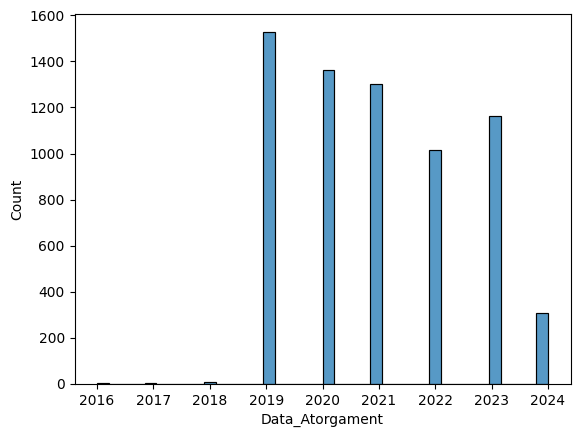

In [2134]:
sns.histplot(null_Organ_Gestor_df['Data_Atorgament'].dropna().dt.year)

In [2135]:
12/5

2.4

Observamos que las subvenciones con Organ_Gestor nulo se distribuyen más o menos equitativamente entre los 5 años completos que tenemos en el conjunto de datos (2019-2023). Así, aunque eliminando los registros perdiéramos un total del 12% del importe total de las subvenciones, en realidad considerando cada año individualmente, sólo perderíamos en media el 2,5% (12%/5) del importe cumulativo anual.

Considero que este compromiso es aceptable y decido eliminar los registros con Organ_Gestor nulo.

In [2136]:
df = df.dropna(subset=['Organ_Gestor'],ignore_index=True)

In [2137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54160 entries, 0 to 54159
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Entitat_Municipal        54160 non-null  object        
 1   Organ_Gestor             54160 non-null  object        
 2   Beneficiari              54160 non-null  object        
 3   NIF_CIF                  54160 non-null  object        
 4   Tipologia_De_Subvencio   54160 non-null  object        
 5   Codi_De_Subvencio        54160 non-null  object        
 6   Objecte                  54160 non-null  object        
 7   Data_Atorgament          54160 non-null  datetime64[ns]
 8   Import_Sollicitat        54160 non-null  float64       
 9   Import_Total_Projecte    54160 non-null  float64       
 10  Import_Atorgat_Inicial   54160 non-null  float64       
 11  Import_Reintegrat_Total  54160 non-null  float64       
dtypes: datetime64[ns](1), float64(4)

### Limpieza variables tipo object

Como tengo pocas columnas puedo hacer un análisis y limpieza en profundidad de cada variable.

In [2138]:
object_columns

['Entitat_Municipal',
 'Organ_Gestor',
 'Beneficiari',
 'NIF_CIF',
 'Tipologia_De_Subvencio',
 'Codi_De_Subvencio',
 'Objecte']

#### Entitat_Municipal

In [2139]:
df['Entitat_Municipal'].value_counts(True)*100

Entitat_Municipal
Ajuntament de Barcelona                                       83.628139
Institut de Cultura de Barcelona                               9.752585
Institut Barcelona Esports                                     2.217504
Institut Municipal de persones amb Discapacitat                1.957164
Institut Municipal de Serveis Socials                          1.137371
Institut Municipal del Paisatge Urbà i la Qualitat de Vida     0.664697
Institut Municipal d' Hisenda                                  0.391433
Institut Municipal d'Educació de Barcelona                     0.251108
Name: proportion, dtype: float64

Agrupamos los valores unicos con baja frecuencia.

In [2140]:
df['Entitat_Municipal'] = group_low_frequency_values(
    df= df,
    column_name= 'Entitat_Municipal',
    threshold= 0.05,
    replacement_value= 'Altres Institucions'
)


In [2141]:
df['Entitat_Municipal'].value_counts(True)*100

Entitat_Municipal
Ajuntament de Barcelona             83.628139
Institut de Cultura de Barcelona     9.752585
Altres Institucions                  6.619276
Name: proportion, dtype: float64

#### Organ_Gestor (Àrea_d'Interès)

In [2142]:
df['Organ_Gestor'].value_counts(True)*100

Organ_Gestor
Gerència d’Àrea d’Economia, Recursos i Promoció Econòmica                17.095643
Gerència de Presidència i Economia                                       11.211226
Institut de Cultura de Barcelona                                          9.752585
Gerència Àrea D.Socials,Salut,Cooperac. i Comunit.                        6.272157
Gerència Drets de Ciutadania, Participació i Transparència                5.653619
Gerència Àrea Cultura,Educació,Esports i Cicles V.                        4.086041
Gerència d'Area de Drets Socials, Justícia Global, Feminismes i LGTBI     2.967134
Districte de Ciutat Vella                                                 2.876662
Districte d'Horta-Guinardó                                                2.874815
Districte de Sant Martí                                                   2.719719
Districte de Sants-Montjuic                                               2.536928
Districte de Sant Andreu                                                  2.446455
Districte de Nou Barris                                                   2.385524
Districte de l'Eixample                                                   2.350443
Institut Barcelona Esports                                                2.217504
Districte de Gràcia                                                       2.025480
Institut Municipal de Persones amb Discapacitat                           1.957164
Gerència d’Àrea de Cultura, Educació, Ciència i Comunitat                 1.676514
Districte de Sarrià-St.Gervasi                                            1.624815
Gerència de Drets Socials                                                 1.608198
Gerència d'Area d'Ecologia Urbana                                         1.567578
Gerència de Política Econòmica i Desenvolupament                          1.445716
Promoció econòmica                                                        1.379247
Gerència Adjunta de Mediambient i Serveis Urbans                          1.248154
Districte de les Corts                                                    1.205687
Institut Municipal de serveis Socials                                     1.137371
Gerència Ecologia Urbana                                                  0.930576
Gerència de Turisme, Comerç i Mercats                                     0.749631
Institut Municipal del Paisatge Urbà i la Qualitat de Vida                0.664697
Ger.d'Àrea de Mobilitat, Infraestruc. i Svs Urbans                        0.550222
Gerència de Recursos                                                      0.417282
Gerència de Pressupostos i Hisenda                                        0.398818
Institut Municipal d' Hisenda                                             0.391433
Gerència Municipal                                                        0.306499
Gerència d'Àrea d'Agenda 2030, Transició Digital i Esports                0.262186
Institut Municipal d'Educació de Barcelona                                0.251108
Gerència d'Àrea d'Agenda 2030, Transició Digital,                         0.195716
Gerència de Serveis Generals                                              0.177253
Gerència d'Empresa, Cultura i Innovació                                   0.073855
Gerència d'Àrea Seguretat i Prevenció                                     0.070162
Gerència adjunta d'Infraestructures i Coordinació Urbana                  0.059084
Gerència de Persones i Desenvolupament Organitzatiu                       0.046160
Gerènc. Svs Urbans i Manteniment de l’Espai Públic                        0.027696
Gerencia de RRHH i Organització                                           0.025849
Gerència adjunta d'Urbanisme                                              0.025849
Gerencia Municipal                                                        0.024003
Gerència de l'Habitatge                                                   0.020310
Gerència d'Àrea de Seguretat i Prevenció                                  0.009232
Nam

Desde la columna Organ_Gestor se puede extraer el área de interés de la subvención, que es una información fundamental para nuestro estudio.
A partir del análisis de los valores únicos elijo definir las siguientes áreas de interés:

- Economia
- Cultura i esport
- drets socials i persones amb discapacitat
- Districtes
- Urbanisme
- Turisme
- Hisenda
- Transició digital
- Altres

In [2143]:
def assign_area_of_interest(organ_gestor):
        """
        Asigna un área de interés en función de las palabras clave en 'Organ_Gestor'.
        """
        organ_gestor = organ_gestor.lower()

        # asigna las areas en función de las palabras clave
        if 'econom' in organ_gestor or 'recurso' in organ_gestor:
            return 'Economia'
        elif ('cultu' in organ_gestor or 'esport' in organ_gestor or 'educa' in organ_gestor) and('digital' not in organ_gestor):
            return 'Cultura i esport'
        elif 'social' in organ_gestor or 'drets' in organ_gestor or 'discapacitat' in organ_gestor:
            return 'Drets socials i persones amb discapacitat'
        elif 'districte' in organ_gestor:
            return 'Districtes'
        elif 'urb' in organ_gestor:
            return 'Urbanisme'
        elif 'turisme' in organ_gestor:
            return 'Turisme'
        elif 'hisenda' in organ_gestor:
            return 'Hisenda'
        elif 'digital' in organ_gestor:
            return 'Transició digital'
        else:
            return 'Altres'  # En todos los otros casos

In [2144]:
df["Àrea_d'Interès"] = df['Organ_Gestor'].apply(assign_area_of_interest)

In [2145]:
df["Àrea_d'Interès"].value_counts(True)*100

Àrea_d'Interès
Economia                                     28.724151
Districtes                                   23.046529
Drets socials i persones amb discapacitat    19.595643
Cultura i esport                             18.057607
Urbanisme                                     5.073855
Altres                                        3.504431
Hisenda                                       0.790251
Turisme                                       0.749631
Transició digital                             0.457903
Name: proportion, dtype: float64

Agrupo las areas de interes con baja frecuencia

In [2146]:
df["Àrea_d'Interès"] = group_low_frequency_values(
    df= df,
    column_name= "Àrea_d'Interès",
    threshold= 0.05,
    replacement_value= "Altres Àrees d'Interès"
)

In [2147]:
df["Àrea_d'Interès"].value_counts(normalize=True)*100

Àrea_d'Interès
Economia                                     28.724151
Districtes                                   23.046529
Drets socials i persones amb discapacitat    19.595643
Cultura i esport                             18.057607
Altres Àrees d'Interès                        5.502216
Urbanisme                                     5.073855
Name: proportion, dtype: float64

#### Beneficiari


partiendo del NIF o CIF extraigo el tipo de beneficiario:
- Personas físicas
- Asociaciones y similares
- Organismos públicos

Quiero ver la distribución de los formatos del NIF_CIF

<Axes: xlabel='NIF_CIF', ylabel='Count'>

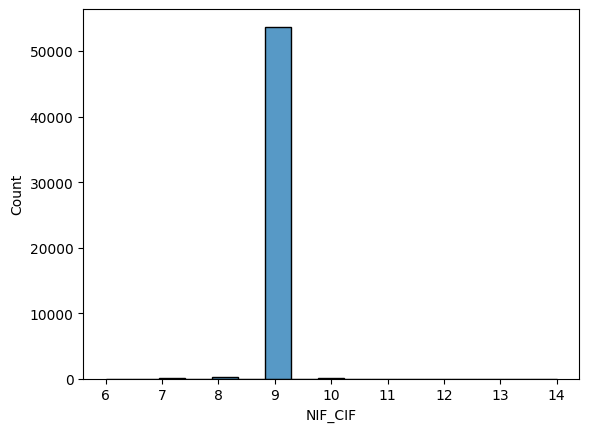

In [2148]:
sns.histplot(df['NIF_CIF'].apply(lambda x:len(x)))

In [2149]:
df['NIF_CIF'].apply(lambda x:len(x)).value_counts(True)*100

NIF_CIF
9     99.191285
8      0.348966
10     0.241876
7      0.180945
12     0.020310
6      0.009232
11     0.005539
14     0.001846
Name: proportion, dtype: float64

In [2150]:
def get_tipologia_beneficiari(row):
  """
  Determina la tipología de beneficiario en función del NIF/CIF y de la columna 'Tipologia_De_Subvencio'.
  Si 'Tipologia_De_Subvencio' es 'TRANSFERÈNCIES ENS PÚBLICS I ALTRES', se asigna 'Ens públics'.
  """
  nif_cif = row['NIF_CIF']
  tipologia_subvencio = row['Tipologia_De_Subvencio']

  # Si la subvención es para ens publics
  if tipologia_subvencio == "TRANSFERÈNCIES ENS PÚBLICS I ALTRES":
    return 'Ens públics'

  # Verifico formato del NIF
  if len(nif_cif) != 9:
    return 'Desconegut'

  if nif_cif[0].isalpha() and nif_cif[0] not in ['X', 'Y', 'Z']:  # Asociaciones y similares
    return 'Associacions i similars'
  elif nif_cif[0] in ['X', 'Y', 'Z']:  # NIE
      return 'Persones físiques'
  elif nif_cif[0].isnumeric() and nif_cif[-1].isalpha():  # NIF español
      return 'Persones físiques'
  else:
      return 'Desconegut'

In [2151]:
df['Tipologia_Beneficiari'] = df.apply(get_tipologia_beneficiari, axis=1)

In [2152]:
df['Tipologia_Beneficiari'].value_counts(True)*100

Tipologia_Beneficiari
Associacions i similars    73.055761
Persones físiques          22.315362
Ens públics                 3.653988
Desconegut                  0.974889
Name: proportion, dtype: float64

#### Tipologia_De_Subvencio

   Agrupo todas las tipologias que contienen la palabra clave "general" en una unica tipologia CONVOCATÒRIA GENERAL

In [2153]:
df['Tipologia_De_Subvencio'] = df['Tipologia_De_Subvencio'].apply(lambda x: 'CONVOCATÒRIA GENERAL' if 'general' in str(x).lower() else x)

In [2154]:
df['Tipologia_De_Subvencio'].value_counts(True)*100

Tipologia_De_Subvencio
CONVOCATÒRIA GENERAL                                                50.358198
AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A PERSONES AMB POCS     10.699778
AJUTS                                                                7.669867
PROJ. INVERS. ESTABLIMENTS ECON. LOCAL CONCURRÈNCIA NO COMPETITI     5.081241
TRANSFERÈNCIES ENS PÚBLICS I ALTRES                                  3.653988
                                                                      ...    
CONVOCATÒRIA DRETS SOCIALS I LABORALS DE LES TREBALLADORES SEXUA     0.001846
Convocatòria planificació, gestió i seguiments PDC 2018              0.001846
PROJECTE PILOT AMUNT!                                                0.001846
CONVOCATÒRIA XIV edició del Premi 25 de Novembre                     0.001846
XV edició Premi 25 de novembre                                       0.001846
Name: proportion, Length: 124, dtype: float64

Agrupo los valores con baja frecuencia

In [2155]:
df["Tipologia_De_Subvencio"] = group_low_frequency_values(
    df= df,
    column_name= "Tipologia_De_Subvencio",
    threshold= 0.02,
    replacement_value= "ALTRES SUBVENCIONS"
)

In [2156]:
df['Tipologia_De_Subvencio'].value_counts(True)*100

Tipologia_De_Subvencio
CONVOCATÒRIA GENERAL                                                50.358198
ALTRES SUBVENCIONS                                                  20.236337
AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A PERSONES AMB POCS     10.699778
AJUTS                                                                7.669867
PROJ. INVERS. ESTABLIMENTS ECON. LOCAL CONCURRÈNCIA NO COMPETITI     5.081241
TRANSFERÈNCIES ENS PÚBLICS I ALTRES                                  3.653988
SUBVENCIONS DIRECTES (amb o sense CONVENI)                           2.300591
Name: proportion, dtype: float64

#### Eliminación variables innecesarias

In [2157]:
df.select_dtypes('O').columns.to_list()

['Entitat_Municipal',
 'Organ_Gestor',
 'Beneficiari',
 'NIF_CIF',
 'Tipologia_De_Subvencio',
 'Codi_De_Subvencio',
 'Objecte',
 "Àrea_d'Interès",
 'Tipologia_Beneficiari']

A este punto se pueden eliminar las siguientes columnas porquè irrelevantes:
- Organ_Gestor
- Beneficiari
- NIF_CIF
- Codi_De_Subvencio
- Objecte

In [2158]:
df.drop([
     'Organ_Gestor',
      'Beneficiari',
      'NIF_CIF',
      'Codi_De_Subvencio',
      'Objecte'
],axis=1,inplace=True)

In [2159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54160 entries, 0 to 54159
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Entitat_Municipal        54160 non-null  object        
 1   Tipologia_De_Subvencio   54160 non-null  object        
 2   Data_Atorgament          54160 non-null  datetime64[ns]
 3   Import_Sollicitat        54160 non-null  float64       
 4   Import_Total_Projecte    54160 non-null  float64       
 5   Import_Atorgat_Inicial   54160 non-null  float64       
 6   Import_Reintegrat_Total  54160 non-null  float64       
 7   Àrea_d'Interès           54160 non-null  object        
 8   Tipologia_Beneficiari    54160 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 3.7+ MB


### Limpieza Data_Atorgament

In [2160]:
df['Data_Atorgament'].describe()

count                            54160
mean     2021-09-29 16:17:47.769571840
min                2016-04-01 00:00:00
25%                2019-12-31 00:00:00
50%                2021-09-29 00:00:00
75%                2023-01-03 00:00:00
max                2024-09-04 00:00:00
Name: Data_Atorgament, dtype: object

Voy a eliminar los registros del mes de septiembre 2024 porqué el mes es incompleto.

In [2161]:
# añado features de tiempo
df['Any_Atorgament'] = df['Data_Atorgament'].dt.year # año
df['Mes_Atorgament'] = df['Data_Atorgament'].dt.month # Mes
df['Trimestre_Atorgament'] = df['Data_Atorgament'].dt.quarter # trimestre

In [2162]:
df_september_24 = df[
    (df['Any_Atorgament']==2024) &
    (df['Mes_Atorgament']==9)
]

In [2163]:
df_september_24

Entitat_Municipal Tipologia_De_Subvencio  \
49450           Ajuntament de Barcelona     ALTRES SUBVENCIONS   
49451           Ajuntament de Barcelona     ALTRES SUBVENCIONS   
49452           Ajuntament de Barcelona     ALTRES SUBVENCIONS   
49453           Ajuntament de Barcelona     ALTRES SUBVENCIONS   
49454           Ajuntament de Barcelona     ALTRES SUBVENCIONS   
...                                 ...                    ...   
54098  Institut de Cultura de Barcelona     ALTRES SUBVENCIONS   
54099  Institut de Cultura de Barcelona     ALTRES SUBVENCIONS   
54100  Institut de Cultura de Barcelona     ALTRES SUBVENCIONS   
54101  Institut de Cultura de Barcelona     ALTRES SUBVENCIONS   
54102  Institut de Cultura de Barcelona     ALTRES SUBVENCIONS   

      Data_Atorgament  Import_Sollicitat  Import_Total_Projecte  \
49450      2024-09-03          100000.00              314088.00   
49451      2024-09-03          143486.92              172407.18   
49452      2024-09-03           60000.00              120567.00   
49453      2024-09-03          186650.79              249741.05   
49454      2024-09-03           90600.01              191378.34   
...               ...                ...                    ...   
54098      2024-09-03            6000.00                6000.00   
54099      2024-09-03            6000.00                6000.00   
54100      2024-09-03            6000.00                6000.00   
54101      2024-09-03            6000.00                6000.00   
54102      2024-09-03            6000.00                6000.00   

       Import_Atorgat_Inicial  Import_Reintegrat_Total    Àrea_d'Interès  \
49450                100000.0                      0.0  Cultura i esport   
49451                 82000.0                      0.0  Cultura i esport   
49452                 60000.0                      0.0  Cultura i esport   
49453                134000.0                      0.0  Cultura i esport   
49454                 30000.0                      0.0  Cultura i esport   
...                       ...                      ...               ...   
54098                  6000.0                      0.0  Cultura i esport   
54099                  6000.0                      0.0  Cultura i esport   
54100                  6000.0                      0.0  Cultura i esport   
54101                  6000.0                      0.0  Cultura i esport   
54102                  6000.0                      0.0  Cultura i esport   

         Tipologia_Beneficiari  Any_Atorgament  Mes_Atorgament  \
49450  Associacions i similars            2024               9   
49451  Associacions i similars            2024               9   
49452  Associacions i similars            2024               9   
49453  Associacions i similars            2024               9   
49454  Associacions i similars            2024               9   
...                        ...             ...             ...   
54098  Associacions i similars            2024               9   
54099  Associacions i similars            2024               9   
54100  Associacions i similars            2024               9   
54101        Persones físiques            2024               9   
54102        Persones físiques            2024               9   

       Trimestre_Atorgament  
49450                     3  
49451                     3  
49452                     3  
49453                     3  
49454                     3  
...                     ...  
54098                     3  
54099                     3  
54100                     3  
54101                     3  
54102                     3  

[105 rows x 12 columns]

In [2164]:
df = df.drop(df_september_24.index)
df = df.reset_index(drop=True)

In [2165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54055 entries, 0 to 54054
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Entitat_Municipal        54055 non-null  object        
 1   Tipologia_De_Subvencio   54055 non-null  object        
 2   Data_Atorgament          54055 non-null  datetime64[ns]
 3   Import_Sollicitat        54055 non-null  float64       
 4   Import_Total_Projecte    54055 non-null  float64       
 5   Import_Atorgat_Inicial   54055 non-null  float64       
 6   Import_Reintegrat_Total  54055 non-null  float64       
 7   Àrea_d'Interès           54055 non-null  object        
 8   Tipologia_Beneficiari    54055 non-null  object        
 9   Any_Atorgament           54055 non-null  int32         
 10  Mes_Atorgament           54055 non-null  int32         
 11  Trimestre_Atorgament     54055 non-null  int32         
dtypes: datetime64[ns](1), float64(4)

In [2166]:
# Como se distribuyen los años en los que han sido ortogadas las subvenciones en los registros?
(df['Data_Atorgament'].dt.year.value_counts(normalize=True)*100).sort_values()

Data_Atorgament
2016     0.003700
2017     0.040699
2018     0.127648
2024    10.820461
2023    14.222551
2022    15.689575
2020    16.560910
2021    17.274998
2019    25.259458
Name: proportion, dtype: float64

Como se distribuyen los años en los cuales han sido ortogadas las subvenciones en los registros?

<Axes: xlabel='Data_Atorgament', ylabel='Count'>

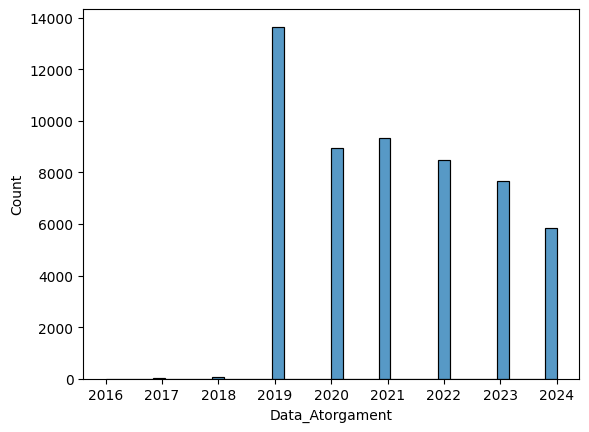

In [2167]:
sns.histplot(df['Data_Atorgament'].dt.year)

In [2168]:
subsidies_before_2019 = df[(df['Data_Atorgament'].dt.year)<2019]
subsidies_before_2019

Entitat_Municipal Tipologia_De_Subvencio Data_Atorgament  \
640    Ajuntament de Barcelona     ALTRES SUBVENCIONS      2017-12-22   
641    Ajuntament de Barcelona     ALTRES SUBVENCIONS      2017-12-22   
642    Ajuntament de Barcelona     ALTRES SUBVENCIONS      2017-12-22   
643    Ajuntament de Barcelona     ALTRES SUBVENCIONS      2017-12-14   
644    Ajuntament de Barcelona     ALTRES SUBVENCIONS      2017-12-14   
...                        ...                    ...             ...   
45697      Altres Institucions     ALTRES SUBVENCIONS      2018-12-31   
47127      Altres Institucions     ALTRES SUBVENCIONS      2018-12-31   
47129      Altres Institucions     ALTRES SUBVENCIONS      2018-09-19   
47130      Altres Institucions     ALTRES SUBVENCIONS      2018-09-19   
47131      Altres Institucions     ALTRES SUBVENCIONS      2018-09-19   

       Import_Sollicitat  Import_Total_Projecte  Import_Atorgat_Inicial  \
640             35000.00               99060.00                35000.00   
641             30000.00               47433.12                30000.00   
642             30000.00               66050.00                30000.00   
643             60000.00               84698.00                30000.00   
644             15000.00               30060.00                15000.00   
...                  ...                    ...                     ...   
45697            4340.00                4340.00                 4340.00   
47127           16011.07               16011.07                16011.07   
47129            1000.00                1000.00                 1000.00   
47130            1000.00                1000.00                 1000.00   
47131             800.00                 800.00                  800.00   

       Import_Reintegrat_Total Àrea_d'Interès    Tipologia_Beneficiari  \
640                        0.0     Districtes  Associacions i similars   
641                        0.0     Districtes  Associacions i similars   
642                        0.0     Districtes  Associacions i similars   
643                        0.0     Districtes  Associacions i similars   
644                        0.0     Districtes  Associacions i similars   
...                        ...            ...                      ...   
45697                      0.0      Urbanisme  Associacions i similars   
47127                      0.0      Urbanisme        Persones físiques   
47129                      0.0      Urbanisme        Persones físiques   
47130                      0.0      Urbanisme        Persones físiques   
47131                      0.0      Urbanisme        Persones físiques   

       Any_Atorgament  Mes_Atorgament  Trimestre_Atorgament  
640              2017              12                     4  
641              2017              12                     4  
642              2017              12                     4  
643              2017              12                     4  
644              2017              12                     4  
...               ...             ...                   ...  
45697            2018              12                     4  
47127            2018              12                     4  
47129            2018               9                     3  
47130            2018               9                     3  
47131            2018               9                     3  

[93 rows x 12 columns]

Eliminino las subvenciones con fecha de ortogación anterior al año 2019, ya que el dataset se enfoca en las subvenciones ortogadas a partir de ese año en adelante.

In [2169]:
df.drop(subsidies_before_2019.index,inplace=True)
df.reset_index(drop=True,inplace=True)

In [2170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53962 entries, 0 to 53961
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Entitat_Municipal        53962 non-null  object        
 1   Tipologia_De_Subvencio   53962 non-null  object        
 2   Data_Atorgament          53962 non-null  datetime64[ns]
 3   Import_Sollicitat        53962 non-null  float64       
 4   Import_Total_Projecte    53962 non-null  float64       
 5   Import_Atorgat_Inicial   53962 non-null  float64       
 6   Import_Reintegrat_Total  53962 non-null  float64       
 7   Àrea_d'Interès           53962 non-null  object        
 8   Tipologia_Beneficiari    53962 non-null  object        
 9   Any_Atorgament           53962 non-null  int32         
 10  Mes_Atorgament           53962 non-null  int32         
 11  Trimestre_Atorgament     53962 non-null  int32         
dtypes: datetime64[ns](1), float64(4)

<Axes: xlabel='Data_Atorgament', ylabel='Count'>

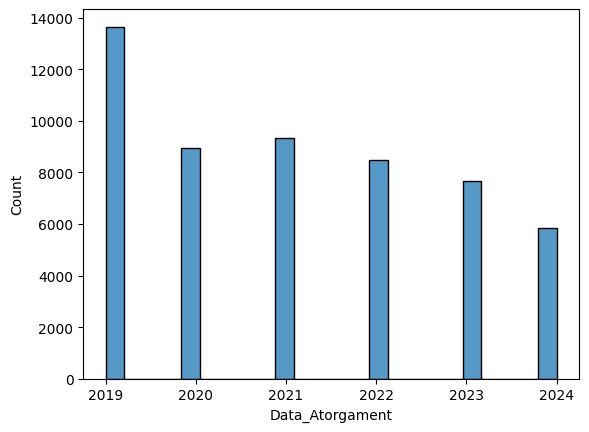

In [2171]:
sns.histplot(df['Data_Atorgament'].dt.year)

### Limpieza variables numéricas

In [2172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53962 entries, 0 to 53961
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Entitat_Municipal        53962 non-null  object        
 1   Tipologia_De_Subvencio   53962 non-null  object        
 2   Data_Atorgament          53962 non-null  datetime64[ns]
 3   Import_Sollicitat        53962 non-null  float64       
 4   Import_Total_Projecte    53962 non-null  float64       
 5   Import_Atorgat_Inicial   53962 non-null  float64       
 6   Import_Reintegrat_Total  53962 non-null  float64       
 7   Àrea_d'Interès           53962 non-null  object        
 8   Tipologia_Beneficiari    53962 non-null  object        
 9   Any_Atorgament           53962 non-null  int32         
 10  Mes_Atorgament           53962 non-null  int32         
 11  Trimestre_Atorgament     53962 non-null  int32         
dtypes: datetime64[ns](1), float64(4)

In [2173]:
numeric_cols

['Import_Sollicitat',
 'Import_Total_Projecte',
 'Import_Atorgat_Inicial',
 'Import_Reintegrat_Total']

Analizo mejor la distribución de Import_Reintegrat_Total

In [2174]:
round(df['Import_Reintegrat_Total'].value_counts(normalize=True)*100,3)

Import_Reintegrat_Total
0.00        96.631
1000.00      0.261
1500.00      0.156
500.00       0.141
2000.00      0.126
             ...  
12000.00     0.002
41.71        0.002
2846.17      0.002
7100.00      0.002
979.79       0.002
Name: proportion, Length: 1070, dtype: float64

Para el 96% de las subvenciones del conjunto de datos no hubo reembolso de dinero. La distribución de la variable está muy desequilibrada y por ello decido eliminarla porque no aporta suficiente información.

In [2175]:
del df['Import_Reintegrat_Total']

Analisis correlación entre las variables numericas

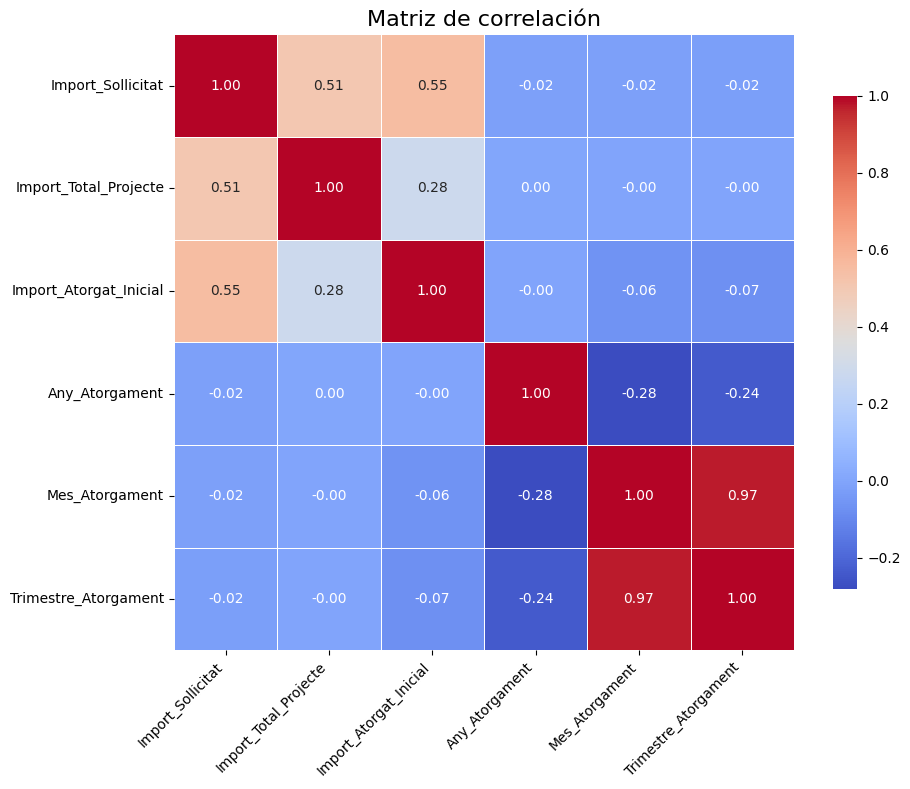

In [2176]:
plot_correlation_matrix(df)

In [2177]:
df.describe()

Data_Atorgament  Import_Sollicitat  \
count                          53962       5.396200e+04   
mean   2021-09-29 15:14:35.416033280       2.964040e+04   
min              2019-01-08 00:00:00       0.000000e+00   
25%              2019-12-31 00:00:00       1.000000e+03   
50%              2021-09-29 00:00:00       3.000000e+03   
75%              2023-01-03 00:00:00       8.171235e+03   
max              2024-08-29 00:00:00       1.620830e+08   
std                              NaN       1.245424e+06   

       Import_Total_Projecte  Import_Atorgat_Inicial  Any_Atorgament  \
count           5.396200e+04            5.396200e+04    53962.000000   
mean            3.079976e+04            1.163814e+05     2021.095326   
min             0.000000e+00           -4.637900e+05     2019.000000   
25%             1.500000e+03            8.000000e+02     2019.000000   
50%             6.742050e+03            2.000000e+03     2021.000000   
75%             2.000000e+04            5.000000e+03     2023.000000   
max             1.506817e+08            1.607830e+08     2024.000000   
std             6.791096e+05            2.213708e+06        1.694564   

       Mes_Atorgament  Trimestre_Atorgament  
count    53962.000000          53962.000000  
mean         8.281365              3.113895  
min          1.000000              1.000000  
25%          7.000000              3.000000  
50%          9.000000              3.000000  
75%         12.000000              4.000000  
max         12.000000              4.000000  
std          3.551601              1.028242

Podemos ver que hay valores "raros" en las 3 columnas: importes igual a cero o negativos.
Quiero ver si hay registros que tienen estos tipos de valores en los 3 campos contemporaneamente.

In [2178]:
df[
    (df['Import_Sollicitat']<=0) &
    (df['Import_Total_Projecte']<=0) &
    (df['Import_Atorgat_Inicial']<=0)

]

Empty DataFrame
Columns: [Entitat_Municipal, Tipologia_De_Subvencio, Data_Atorgament, Import_Sollicitat, Import_Total_Projecte, Import_Atorgat_Inicial, Àrea_d'Interès, Tipologia_Beneficiari, Any_Atorgament, Mes_Atorgament, Trimestre_Atorgament]
Index: []

No hay subvenciones de este tipo. Filtremos ahora todos los registros que tengan almenos uno de estos 3 campos <=0

In [2179]:
bizarre_amount_subvencions = df[
    (df['Import_Sollicitat']<=0) |
    (df['Import_Total_Projecte']<=0) |
    (df['Import_Atorgat_Inicial']<=0)

]
bizarre_amount_subvencions

Entitat_Municipal  \
289    Institut de Cultura de Barcelona   
290    Institut de Cultura de Barcelona   
291    Institut de Cultura de Barcelona   
292    Institut de Cultura de Barcelona   
293    Institut de Cultura de Barcelona   
...                                 ...   
53248           Ajuntament de Barcelona   
53316           Ajuntament de Barcelona   
53408           Ajuntament de Barcelona   
53624           Ajuntament de Barcelona   
53647           Ajuntament de Barcelona   

                                  Tipologia_De_Subvencio Data_Atorgament  \
289                                   ALTRES SUBVENCIONS      2019-10-24   
290                                   ALTRES SUBVENCIONS      2019-10-24   
291                                   ALTRES SUBVENCIONS      2019-10-24   
292                                   ALTRES SUBVENCIONS      2019-10-24   
293                                   ALTRES SUBVENCIONS      2019-10-24   
...                                                  ...             ...   
53248                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2022-11-18   
53316                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2021-10-06   
53408                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2021-06-21   
53624  AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
53647  AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   

       Import_Sollicitat  Import_Total_Projecte  Import_Atorgat_Inicial  \
289                  0.0                 744.00                  437.52   
290                  0.0                2197.95                  976.03   
291                  0.0                 645.12                  415.14   
292                  0.0                 527.16                  390.15   
293                  0.0                 733.46                  359.86   
...                  ...                    ...                     ...   
53248                0.0                   0.00             19000000.00   
53316                0.0                   0.00                75000.00   
53408                0.0                   0.00                22876.00   
53624                0.0                   0.00                  300.00   
53647                0.0                 486.47                  300.00   

                                  Àrea_d'Interès    Tipologia_Beneficiari  \
289                             Cultura i esport        Persones físiques   
290                             Cultura i esport        Persones físiques   
291                             Cultura i esport        Persones físiques   
292                             Cultura i esport        Persones físiques   
293                             Cultura i esport  Associacions i similars   
...                                          ...                      ...   
53248  Drets socials i persones amb discapacitat              Ens públics   
53316                                   Economia              Ens públics   
53408                           Cultura i esport              Ens públics   
53624                                   Economia        Persones físiques   
53647                                   Economia        Persones físiques   

       Any_Atorgament  Mes_Atorgament  Trimestre_Atorgament  
289              2019              10                     4  
290              2019              10                     4  
291              2019              10                     4  
292              2019              10                     4  
293              2019              10                     4  
...               ...             ...                   ...  
53248            2022              11                     4  
53316            2021              10                     4  
53408            2021               6                     2  
53624            2019              12                     4  
53647            2019              12                     4  

[8394 rows x 11 colum

In [2180]:
bizarre_amount_subvencions.sample(15)

Entitat_Municipal  \
7683   Ajuntament de Barcelona   
7888   Ajuntament de Barcelona   
46322  Ajuntament de Barcelona   
48109  Ajuntament de Barcelona   
3447   Ajuntament de Barcelona   
48019  Ajuntament de Barcelona   
31463  Ajuntament de Barcelona   
6450   Ajuntament de Barcelona   
40455  Ajuntament de Barcelona   
4996   Ajuntament de Barcelona   
28402  Ajuntament de Barcelona   
43748  Ajuntament de Barcelona   
5335   Ajuntament de Barcelona   
5417   Ajuntament de Barcelona   
39453  Ajuntament de Barcelona   

                                  Tipologia_De_Subvencio Data_Atorgament  \
7683   AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
7888   AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
46322  AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
48109  AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
3447                 TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2019-10-25   
48019                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2021-07-28   
31463  AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
6450   AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
40455  AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
4996   AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
28402                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2020-09-21   
43748  AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
5335   AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
5417   AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
39453  AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   

       Import_Sollicitat  Import_Total_Projecte  Import_Atorgat_Inicial  \
7683                 0.0                   0.00                  300.00   
7888                 0.0                   0.00                  300.00   
46322                0.0                 209.59                  300.00   
48109                0.0                 242.09                  300.00   
3447              6750.0                   0.00                 4444.84   
48019                0.0                   0.00                70000.00   
31463                0.0                 366.16                  300.00   
6450                 0.0                 489.95                  300.00   
40455                0.0                 265.05                  300.00   
4996                 0.0                 178.65                  300.00   
28402                0.0                   0.00                 6750.00   
43748                0.0                 180.80                  300.00   
5335                 0.0                 172.07                  300.00   
5417                 0.0                 542.95                  300.00   
39453                0.0                   0.00                  300.00   

      Àrea_d'Interès Tipologia_Beneficiari  Any_Atorgament  Mes_Atorgament  \
7683        Economia     Persones físiques            2019              12   
7888        Economia     Persones físiques            2019              12   
46322       Economia     Persones físiques            2019              12   
48109       Economia     Persones físiques            2019              12   
3447        Economia           Ens públics            2019              10   
48019       Economia           Ens públics            2021               7   
31463       Economia     Persones físiques            2019              12   
6450        Economia     Persones físiques            2019              12   
40455       Economia     Persones físiques            2019              12   
4996        Economia     Persones físiques            2019              12   
28402       Economia           Ens públics            2020               9   
43748       Economia     Persones físiques            2019              12   
5335        Economia     Persones fí

In [2181]:
# Calculo que porcentaje son del total
len(bizarre_amount_subvencions)/len(df)*100

15.555390830584484

Son más del 15%. Examinaré cada columna más en detalle.

#### Import_Atorgat_Inicial

In [2182]:
not_positive_imp_atorgat = df[df['Import_Atorgat_Inicial']<=0] #  subvenciones con Import_Atorgat_Inicial <=0
not_positive_imp_atorgat

Entitat_Municipal                      Tipologia_De_Subvencio  \
4404  Ajuntament de Barcelona  SUBVENCIONS DIRECTES (amb o sense CONVENI)   
4488  Ajuntament de Barcelona  SUBVENCIONS DIRECTES (amb o sense CONVENI)   

     Data_Atorgament  Import_Sollicitat  Import_Total_Projecte  \
4404      2020-07-16          2000000.0              8000000.0   
4488      2020-11-02             9000.0                 9000.0   

      Import_Atorgat_Inicial Àrea_d'Interès    Tipologia_Beneficiari  \
4404               -463790.0       Economia  Associacions i similars   
4488                 -3000.0     Districtes        Persones físiques   

      Any_Atorgament  Mes_Atorgament  Trimestre_Atorgament  
4404            2020               7                     3  
4488            2020              11                     4

Hay solo dos registros con Import_Atorgat_Inicial igual a cero. Decido borrarlos vista la importancia de la variable

In [2183]:
df = df.drop(not_positive_imp_atorgat.index)
df = df.reset_index(drop=True)

In [2184]:
df.describe()

Data_Atorgament  Import_Sollicitat  \
count                          53960       5.396000e+04   
mean   2021-09-29 15:35:11.964418048       2.960427e+04   
min              2019-01-08 00:00:00       0.000000e+00   
25%              2019-12-31 00:00:00       1.000000e+03   
50%              2021-09-29 00:00:00       3.000000e+03   
75%              2023-01-03 00:00:00       8.161500e+03   
max              2024-08-29 00:00:00       1.620830e+08   
std                              NaN       1.245418e+06   

       Import_Total_Projecte  Import_Atorgat_Inicial  Any_Atorgament  \
count           5.396000e+04            5.396000e+04    53960.000000   
mean            3.065248e+04            1.163944e+05     2021.095367   
min             0.000000e+00            9.000000e-02     2019.000000   
25%             1.500000e+03            8.000000e+02     2019.000000   
50%             6.741055e+03            2.000000e+03     2021.000000   
75%             2.000000e+04            5.000000e+03     2023.000000   
max             1.506817e+08            1.607830e+08     2024.000000   
std             6.782551e+05            2.213748e+06        1.694583   

       Mes_Atorgament  Trimestre_Atorgament  
count    53960.000000          53960.000000  
mean         8.281338              3.113881  
min          1.000000              1.000000  
25%          7.000000              3.000000  
50%          9.000000              3.000000  
75%         12.000000              4.000000  
max         12.000000              4.000000  
std          3.551643              1.028254

Siguen habiendo subvenciones con importe ortogado irrelevante (menor que 1€)

<Axes: ylabel='Import_Atorgat_Inicial'>

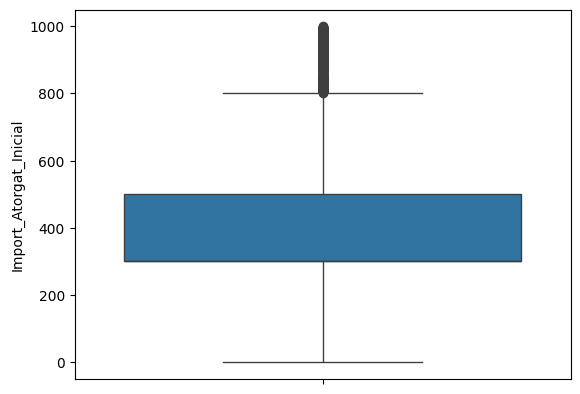

In [2185]:
sns.boxplot(df[df['Import_Atorgat_Inicial']<1000]['Import_Atorgat_Inicial'])

In [2186]:
df[df['Import_Atorgat_Inicial']<5]

Entitat_Municipal Tipologia_De_Subvencio Data_Atorgament  \
2361   Ajuntament de Barcelona   CONVOCATÒRIA GENERAL      2019-12-19   
2362   Ajuntament de Barcelona   CONVOCATÒRIA GENERAL      2020-01-30   
2505   Ajuntament de Barcelona                  AJUTS      2019-04-23   
2512   Ajuntament de Barcelona                  AJUTS      2019-03-27   
3177   Ajuntament de Barcelona                  AJUTS      2019-12-13   
3863   Ajuntament de Barcelona                  AJUTS      2020-01-10   
4121   Ajuntament de Barcelona                  AJUTS      2020-01-07   
4128   Ajuntament de Barcelona                  AJUTS      2020-01-07   
4130   Ajuntament de Barcelona                  AJUTS      2020-01-07   
4152   Ajuntament de Barcelona                  AJUTS      2020-01-07   
4172   Ajuntament de Barcelona                  AJUTS      2020-01-07   
4207   Ajuntament de Barcelona                  AJUTS      2020-01-10   
4221   Ajuntament de Barcelona                  AJUTS      2020-01-10   
4234   Ajuntament de Barcelona                  AJUTS      2020-01-10   
18802  Ajuntament de Barcelona                  AJUTS      2021-08-27   
20228  Ajuntament de Barcelona                  AJUTS      2020-01-10   
20318  Ajuntament de Barcelona                  AJUTS      2019-05-03   
24010  Ajuntament de Barcelona                  AJUTS      2020-01-07   
28129  Ajuntament de Barcelona                  AJUTS      2020-03-13   
28130  Ajuntament de Barcelona                  AJUTS      2020-03-13   
29493  Ajuntament de Barcelona   CONVOCATÒRIA GENERAL      2020-01-15   
29644  Ajuntament de Barcelona                  AJUTS      2019-12-31   
30041  Ajuntament de Barcelona                  AJUTS      2020-01-10   
31966  Ajuntament de Barcelona                  AJUTS      2020-01-10   
32669  Ajuntament de Barcelona                  AJUTS      2020-01-10   
33668  Ajuntament de Barcelona                  AJUTS      2019-03-27   
33881  Ajuntament de Barcelona                  AJUTS      2020-01-07   
34874  Ajuntament de Barcelona                  AJUTS      2019-12-31   

       Import_Sollicitat  Import_Total_Projecte  Import_Atorgat_Inicial  \
2361             5550.00               10130.00                    0.25   
2362              300.00                 600.00                    0.25   
2505                3.00                   3.00                    3.00   
2512                3.00                   3.00                    3.00   
3177                2.10                   2.10                    2.10   
3863                2.20                   2.20                    2.20   
4121                4.97                   4.97                    4.97   
4128                3.60                   3.60                    3.60   
4130                3.55                   3.55                    3.55   
4152                1.48                   1.48                    1.48   
4172                4.20                   4.20                    4.20   
4207                4.70                   4.70                    4.70   
4221                3.21                   3.21                    3.21   
4234                2.27                   2.27                    2.27   
18802               2.60                   2.60                    2.60   
20228               4.40                   4.40                    4.40   
20318               1.16                   1.16                    1.16   
24010               4.40                   4.40                    4.40   
28129               3.73                   3.73                    3.73   
28130               0.09                   0.09                    0.09   
29493            8000.00               16710.00                    0.25   
29644               2.20                   2.20                    2.20   
30041               2.27                   2.27                    2.27   
31966               4.83                   4.83                    4.83   
32669               

Muchas de estas parecen coherentes

In [2187]:
df[df['Import_Atorgat_Inicial']<1] # filtro aquellas <1€

Entitat_Municipal Tipologia_De_Subvencio Data_Atorgament  \
2361   Ajuntament de Barcelona   CONVOCATÒRIA GENERAL      2019-12-19   
2362   Ajuntament de Barcelona   CONVOCATÒRIA GENERAL      2020-01-30   
28130  Ajuntament de Barcelona                  AJUTS      2020-03-13   
29493  Ajuntament de Barcelona   CONVOCATÒRIA GENERAL      2020-01-15   

       Import_Sollicitat  Import_Total_Projecte  Import_Atorgat_Inicial  \
2361             5550.00               10130.00                    0.25   
2362              300.00                 600.00                    0.25   
28130               0.09                   0.09                    0.09   
29493            8000.00               16710.00                    0.25   

                                  Àrea_d'Interès    Tipologia_Beneficiari  \
2361                                  Districtes  Associacions i similars   
2362                                  Districtes  Associacions i similars   
28130  Drets socials i persones amb discapacitat  Associacions i similars   
29493                                 Districtes  Associacions i similars   

       Any_Atorgament  Mes_Atorgament  Trimestre_Atorgament  
2361             2019              12                     4  
2362             2020               1                     1  
28130            2020               3                     1  
29493            2020               1                     1

Decido borrar estos solo los de convocatoria general e importe menor que 1€ porque incoherentes

In [2188]:
df[
    (df['Import_Atorgat_Inicial']<1) &
    (df['Tipologia_De_Subvencio']=='CONVOCATÒRIA GENERAL')
]

Entitat_Municipal Tipologia_De_Subvencio Data_Atorgament  \
2361   Ajuntament de Barcelona   CONVOCATÒRIA GENERAL      2019-12-19   
2362   Ajuntament de Barcelona   CONVOCATÒRIA GENERAL      2020-01-30   
29493  Ajuntament de Barcelona   CONVOCATÒRIA GENERAL      2020-01-15   

       Import_Sollicitat  Import_Total_Projecte  Import_Atorgat_Inicial  \
2361              5550.0                10130.0                    0.25   
2362               300.0                  600.0                    0.25   
29493             8000.0                16710.0                    0.25   

      Àrea_d'Interès    Tipologia_Beneficiari  Any_Atorgament  Mes_Atorgament  \
2361      Districtes  Associacions i similars            2019              12   
2362      Districtes  Associacions i similars            2020               1   
29493     Districtes  Associacions i similars            2020               1   

       Trimestre_Atorgament  
2361                      4  
2362                      1  
29493                     1

In [2189]:
df = df.drop(
    df[
    (df['Import_Atorgat_Inicial']<1) &
    (df['Tipologia_De_Subvencio']=='CONVOCATÒRIA GENERAL')
].index
)
df = df.reset_index(drop=True)

In [2190]:
df.describe()

Data_Atorgament  Import_Sollicitat  \
count                          53957       5.395700e+04   
mean   2021-09-29 16:25:27.082676992       2.960566e+04   
min              2019-01-08 00:00:00       0.000000e+00   
25%              2019-12-31 00:00:00       1.000000e+03   
50%              2021-09-29 00:00:00       3.000000e+03   
75%              2023-01-03 00:00:00       8.166000e+03   
max              2024-08-29 00:00:00       1.620830e+08   
std                              NaN       1.245453e+06   

       Import_Total_Projecte  Import_Atorgat_Inicial  Any_Atorgament  \
count           5.395700e+04            5.395700e+04    53957.000000   
mean            3.065367e+04            1.164009e+05     2021.095446   
min             0.000000e+00            9.000000e-02     2019.000000   
25%             1.500000e+03            8.000000e+02     2019.000000   
50%             6.741010e+03            2.000000e+03     2021.000000   
75%             2.000000e+04            5.000000e+03     2023.000000   
max             1.506817e+08            1.607830e+08     2024.000000   
std             6.782739e+05            2.213809e+06        1.694593   

       Mes_Atorgament  Trimestre_Atorgament  
count    53957.000000          53957.000000  
mean         8.281539              3.113943  
min          1.000000              1.000000  
25%          7.000000              3.000000  
50%          9.000000              3.000000  
75%         12.000000              4.000000  
max         12.000000              4.000000  
std          3.551429              1.028195

#### Import_Total_Projecte

In [2191]:
not_positive_imp_tot_projecte = df[df['Import_Total_Projecte']<=0] #  subvenciones con Import_Total_Projecte <=0
not_positive_imp_tot_projecte

Entitat_Municipal  \
563    Ajuntament de Barcelona   
564    Ajuntament de Barcelona   
640    Ajuntament de Barcelona   
641    Ajuntament de Barcelona   
643    Ajuntament de Barcelona   
...                        ...   
53241  Ajuntament de Barcelona   
53243  Ajuntament de Barcelona   
53311  Ajuntament de Barcelona   
53403  Ajuntament de Barcelona   
53619  Ajuntament de Barcelona   

                                  Tipologia_De_Subvencio Data_Atorgament  \
563    AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2020-01-27   
564    AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2020-01-27   
640                  TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2019-01-29   
641                  TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2019-01-25   
643                  TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2019-01-28   
...                                                  ...             ...   
53241                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2022-10-28   
53243                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2022-11-18   
53311                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2021-10-06   
53403                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2021-06-21   
53619  AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   

       Import_Sollicitat  Import_Total_Projecte  Import_Atorgat_Inicial  \
563                  0.0                    0.0                   300.0   
564                  0.0                    0.0                   300.0   
640                  0.0                    0.0               1875000.0   
641                  0.0                    0.0               6500000.0   
643                  0.0                    0.0               1300000.0   
...                  ...                    ...                     ...   
53241                0.0                    0.0                 10000.0   
53243                0.0                    0.0              19000000.0   
53311                0.0                    0.0                 75000.0   
53403                0.0                    0.0                 22876.0   
53619                0.0                    0.0                   300.0   

                                  Àrea_d'Interès Tipologia_Beneficiari  \
563                                     Economia     Persones físiques   
564                                     Economia     Persones físiques   
640                                   Districtes           Ens públics   
641                       Altres Àrees d'Interès           Ens públics   
643    Drets socials i persones amb discapacitat           Ens públics   
...                                          ...                   ...   
53241                     Altres Àrees d'Interès           Ens públics   
53243  Drets socials i persones amb discapacitat           Ens públics   
53311                                   Economia           Ens públics   
53403                           Cultura i esport           Ens públics   
53619                                   Economia     Persones físiques   

       Any_Atorgament  Mes_Atorgament  Trimestre_Atorgament  
563              2020               1                     1  
564              2020               1                     1  
640              2019               1                     1  
641              2019               1                     1  
643              2019               1                     1  
...               ...             ...                   ...  
53241            2022              10                     4  
53243            2022              11                     4  
53311            2021              10                     4  
53403            2021               6                     2  
53619            2019              12                     4  

[3259 rows x 11 columns]

In [2192]:
not_positive_imp_tot_projecte.shape

(3259, 11)

In [2193]:
# porcentaje sobre el total
len(not_positive_imp_tot_projecte)/len(df)*100

6.039994810682581

In [2194]:
# distribución de tipologia de subvención
not_positive_imp_tot_projecte['Tipologia_De_Subvencio'].value_counts(True)*100

Tipologia_De_Subvencio
TRANSFERÈNCIES ENS PÚBLICS I ALTRES                                60.049095
AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A PERSONES AMB POCS    38.201902
ALTRES SUBVENCIONS                                                  1.442160
SUBVENCIONS DIRECTES (amb o sense CONVENI)                          0.153421
AJUTS                                                               0.153421
Name: proportion, dtype: float64

In [2195]:
not_positive_imp_tot_projecte.sample(15)

Entitat_Municipal  \
4505   Ajuntament de Barcelona   
35354  Ajuntament de Barcelona   
8353   Ajuntament de Barcelona   
41561  Ajuntament de Barcelona   
5997   Ajuntament de Barcelona   
43380  Ajuntament de Barcelona   
46911  Ajuntament de Barcelona   
38930  Ajuntament de Barcelona   
42969  Ajuntament de Barcelona   
6537   Ajuntament de Barcelona   
25850  Ajuntament de Barcelona   
7884   Ajuntament de Barcelona   
5920   Ajuntament de Barcelona   
23105  Ajuntament de Barcelona   
48411  Ajuntament de Barcelona   

                                  Tipologia_De_Subvencio Data_Atorgament  \
4505                 TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2020-10-29   
35354                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2019-02-11   
8353   AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
41561                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2021-12-24   
5997   AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
43380                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2023-12-21   
46911  AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
38930                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2020-12-31   
42969                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2021-01-21   
6537   AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
25850  AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
7884   AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
5920   AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
23105                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2022-12-07   
48411  AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   

       Import_Sollicitat  Import_Total_Projecte  Import_Atorgat_Inicial  \
4505                0.00                    0.0                60215.00   
35354           63983.72                    0.0                63983.72   
8353                0.00                    0.0                  300.00   
41561               0.00                    0.0              1129253.01   
5997                0.00                    0.0                  300.00   
43380               0.00                    0.0                47219.04   
46911               0.00                    0.0                  300.00   
38930               0.00                    0.0              1087334.03   
42969               0.00                    0.0              4934592.76   
6537                0.00                    0.0                  300.00   
25850               0.00                    0.0                  300.00   
7884                0.00                    0.0                  300.00   
5920                0.00                    0.0                  300.00   
23105               0.00                    0.0                10000.00   
48411               0.00                    0.0                  300.00   

                                  Àrea_d'Interès Tipologia_Beneficiari  \
4505                            Cultura i esport           Ens públics   
35354                                   Economia           Ens públics   
8353                                    Economia     Persones físiques   
41561                           Cultura i esport           Ens públics   
5997                                    Economia     Persones físiques   
43380                                  Urbanisme           Ens públics   
46911                                   Economia     Persones físiques   
38930                                   Economia           Ens públics   
42969                                 Districtes           Ens públics   
6537                                    Economia     Persones físiques   
25850                                   Economia     Persones físiques   
7884                                    Economia     Persones físiques   
5920                                    Economia     Persones físiques   
23105  Drets s

Siendo estos registros en mayoría transferencias a entes publicos, decido poner el importe total del proyecto igual al importe ortogado.


Import_Total_Projecte =Import_Atorgat_Inicial

In [2196]:
df['Import_Total_Projecte'] = np.where(df['Import_Total_Projecte']<=0,df['Import_Atorgat_Inicial'],df['Import_Total_Projecte'])

In [2197]:
df.describe()

Data_Atorgament  Import_Sollicitat  \
count                          53957       5.395700e+04   
mean   2021-09-29 16:25:27.082676992       2.960566e+04   
min              2019-01-08 00:00:00       0.000000e+00   
25%              2019-12-31 00:00:00       1.000000e+03   
50%              2021-09-29 00:00:00       3.000000e+03   
75%              2023-01-03 00:00:00       8.166000e+03   
max              2024-08-29 00:00:00       1.620830e+08   
std                              NaN       1.245453e+06   

       Import_Total_Projecte  Import_Atorgat_Inicial  Any_Atorgament  \
count           5.395700e+04            5.395700e+04    53957.000000   
mean            1.365939e+05            1.164009e+05     2021.095446   
min             9.000000e-02            9.000000e-02     2019.000000   
25%             2.152380e+03            8.000000e+02     2019.000000   
50%             7.728840e+03            2.000000e+03     2021.000000   
75%             2.255000e+04            5.000000e+03     2023.000000   
max             1.607830e+08            1.607830e+08     2024.000000   
std             2.219683e+06            2.213809e+06        1.694593   

       Mes_Atorgament  Trimestre_Atorgament  
count    53957.000000          53957.000000  
mean         8.281539              3.113943  
min          1.000000              1.000000  
25%          7.000000              3.000000  
50%          9.000000              3.000000  
75%         12.000000              4.000000  
max         12.000000              4.000000  
std          3.551429              1.028195

#### Import_Sollicitat

In [2198]:
not_positive_imp_sollicitat = df[df['Import_Sollicitat']<=0] #  subvenciones con Import_Sollicitat <=0
not_positive_imp_sollicitat

Entitat_Municipal  \
289    Institut de Cultura de Barcelona   
290    Institut de Cultura de Barcelona   
291    Institut de Cultura de Barcelona   
292    Institut de Cultura de Barcelona   
293    Institut de Cultura de Barcelona   
...                                 ...   
53243           Ajuntament de Barcelona   
53311           Ajuntament de Barcelona   
53403           Ajuntament de Barcelona   
53619           Ajuntament de Barcelona   
53642           Ajuntament de Barcelona   

                                  Tipologia_De_Subvencio Data_Atorgament  \
289                                   ALTRES SUBVENCIONS      2019-10-24   
290                                   ALTRES SUBVENCIONS      2019-10-24   
291                                   ALTRES SUBVENCIONS      2019-10-24   
292                                   ALTRES SUBVENCIONS      2019-10-24   
293                                   ALTRES SUBVENCIONS      2019-10-24   
...                                                  ...             ...   
53243                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2022-11-18   
53311                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2021-10-06   
53403                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2021-06-21   
53619  AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
53642  AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   

       Import_Sollicitat  Import_Total_Projecte  Import_Atorgat_Inicial  \
289                  0.0                 744.00                  437.52   
290                  0.0                2197.95                  976.03   
291                  0.0                 645.12                  415.14   
292                  0.0                 527.16                  390.15   
293                  0.0                 733.46                  359.86   
...                  ...                    ...                     ...   
53243                0.0            19000000.00             19000000.00   
53311                0.0               75000.00                75000.00   
53403                0.0               22876.00                22876.00   
53619                0.0                 300.00                  300.00   
53642                0.0                 486.47                  300.00   

                                  Àrea_d'Interès    Tipologia_Beneficiari  \
289                             Cultura i esport        Persones físiques   
290                             Cultura i esport        Persones físiques   
291                             Cultura i esport        Persones físiques   
292                             Cultura i esport        Persones físiques   
293                             Cultura i esport  Associacions i similars   
...                                          ...                      ...   
53243  Drets socials i persones amb discapacitat              Ens públics   
53311                                   Economia              Ens públics   
53403                           Cultura i esport              Ens públics   
53619                                   Economia        Persones físiques   
53642                                   Economia        Persones físiques   

       Any_Atorgament  Mes_Atorgament  Trimestre_Atorgament  
289              2019              10                     4  
290              2019              10                     4  
291              2019              10                     4  
292              2019              10                     4  
293              2019              10                     4  
...               ...             ...                   ...  
53243            2022              11                     4  
53311            2021              10                     4  
53403            2021               6                     2  
53619            2019              12                     4  
53642            2019              12                     4  

[7964 rows x 11 colum

In [2199]:
not_positive_imp_sollicitat.shape

(7964, 11)

In [2200]:
# cuota respecto al total de subvenciones
len(not_positive_imp_sollicitat)/len(df)*100

14.75990140296903

Las subvenciones con Import_Sollicitat <=0 respresentan una parte importante del dataset

In [2201]:
df.columns

Index(['Entitat_Municipal', 'Tipologia_De_Subvencio', 'Data_Atorgament',
       'Import_Sollicitat', 'Import_Total_Projecte', 'Import_Atorgat_Inicial',
       'Àrea_d'Interès', 'Tipologia_Beneficiari', 'Any_Atorgament',
       'Mes_Atorgament', 'Trimestre_Atorgament'],
      dtype='object')

In [2202]:
# distribución de Tipologia_De_Subvencio
not_positive_imp_sollicitat['Tipologia_De_Subvencio'].value_counts(True)*100

Tipologia_De_Subvencio
AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A PERSONES AMB POCS    72.764942
TRANSFERÈNCIES ENS PÚBLICS I ALTRES                                19.650929
ALTRES SUBVENCIONS                                                  7.496233
AJUTS                                                               0.050226
SUBVENCIONS DIRECTES (amb o sense CONVENI)                          0.037670
Name: proportion, dtype: float64

In [2203]:
not_positive_imp_sollicitat.sample(20)

Entitat_Municipal  \
4040   Ajuntament de Barcelona   
25848  Ajuntament de Barcelona   
6092   Ajuntament de Barcelona   
32574  Ajuntament de Barcelona   
5833   Ajuntament de Barcelona   
44668  Ajuntament de Barcelona   
7231   Ajuntament de Barcelona   
50525  Ajuntament de Barcelona   
46312  Ajuntament de Barcelona   
46570  Ajuntament de Barcelona   
38000  Ajuntament de Barcelona   
28398  Ajuntament de Barcelona   
5306   Ajuntament de Barcelona   
34965  Ajuntament de Barcelona   
5295   Ajuntament de Barcelona   
9253   Ajuntament de Barcelona   
36634  Ajuntament de Barcelona   
32466  Ajuntament de Barcelona   
7897   Ajuntament de Barcelona   
19389  Ajuntament de Barcelona   

                                  Tipologia_De_Subvencio Data_Atorgament  \
4040                 TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2020-01-31   
25848  AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
6092   AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
32574                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2020-08-11   
5833   AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
44668                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2021-02-11   
7231   AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
50525                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2021-03-18   
46312  AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-19   
46570  AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
38000                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2020-10-23   
28398                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2020-09-21   
5306   AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
34965  AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
5295   AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
9253                                  ALTRES SUBVENCIONS      2021-02-01   
36634                TRANSFERÈNCIES ENS PÚBLICS I ALTRES      2021-05-21   
32466  AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
7897   AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   
19389  AJUT EQUIVALENT A LA QUOTA LÍQUIDA DE L'IBI A ...      2019-12-17   

       Import_Sollicitat  Import_Total_Projecte  Import_Atorgat_Inicial  \
4040                 0.0              273026.92               273026.92   
25848                0.0                 300.00                  300.00   
6092                 0.0                 409.86                  300.00   
32574                0.0              177000.00               177000.00   
5833                 0.0                 235.40                  300.00   
44668                0.0             3400000.00              3400000.00   
7231                 0.0                 300.00                  300.00   
50525                0.0              358922.04               358922.04   
46312                0.0                 157.87                  300.00   
46570                0.0                  41.41                  300.00   
38000                0.0              160368.35               160368.35   
28398                0.0                6750.00                 6750.00   
5306                 0.0                 196.98                  300.00   
34965                0.0                 237.79                  300.00   
5295                 0.0                 128.74                  300.00   
9253                 0.0                6837.00                 1200.00   
36634                0.0               62500.00                62500.00   
32466                0.0                 408.91                  300.00   
7897                 0.0                 184.25                  300.00   
19389                0.0                 300.00                  300.00   

         Àrea_d'Interès Tipologia_Beneficiari  Any_Atorgament  Mes_Atorgament  \
4040           Economia           Ens públic

Viendo un muestra de los registros con Import_Sollicitat =0 se nota que es plausible imputar el mismo valor del importe totatl del proyecto, osea

**Import_Sollicitat** = **Import_Total_Projecte**

In [2204]:
df['Import_Sollicitat'] = np.where(df['Import_Sollicitat']<=0,df['Import_Total_Projecte'],df['Import_Sollicitat'])

In [2205]:
df.describe()

Data_Atorgament  Import_Sollicitat  \
count                          53957       5.395700e+04   
mean   2021-09-29 16:25:27.082676992       1.198347e+05   
min              2019-01-08 00:00:00       9.000000e-02   
25%              2019-12-31 00:00:00       1.000000e+03   
50%              2021-09-29 00:00:00       3.500000e+03   
75%              2023-01-03 00:00:00       9.715050e+03   
max              2024-08-29 00:00:00       1.620830e+08   
std                              NaN       2.221908e+06   

       Import_Total_Projecte  Import_Atorgat_Inicial  Any_Atorgament  \
count           5.395700e+04            5.395700e+04    53957.000000   
mean            1.365939e+05            1.164009e+05     2021.095446   
min             9.000000e-02            9.000000e-02     2019.000000   
25%             2.152380e+03            8.000000e+02     2019.000000   
50%             7.728840e+03            2.000000e+03     2021.000000   
75%             2.255000e+04            5.000000e+03     2023.000000   
max             1.607830e+08            1.607830e+08     2024.000000   
std             2.219683e+06            2.213809e+06        1.694593   

       Mes_Atorgament  Trimestre_Atorgament  
count    53957.000000          53957.000000  
mean         8.281539              3.113943  
min          1.000000              1.000000  
25%          7.000000              3.000000  
50%          9.000000              3.000000  
75%         12.000000              4.000000  
max         12.000000              4.000000  
std          3.551429              1.028195

#### Variable "Bucket_Import_Atorgat"

Para facilitar el análisis de las subvenciones, crearé una nueva columna "Bucket_Import_Atorgat" que categorizará el Import_Atorgat_Inicial en rangos específicos. Esto permitirá visualizar y comparar de manera más eficiente cómo se distribuyen las subvenciones para los diferentes tamaños de proyectos.

In [2206]:
df['Import_Atorgat_Inicial'].describe()

count    5.395700e+04
mean     1.164009e+05
std      2.213809e+06
min      9.000000e-02
25%      8.000000e+02
50%      2.000000e+03
75%      5.000000e+03
max      1.607830e+08
Name: Import_Atorgat_Inicial, dtype: float64

In [2207]:
def assign_import_atorgat_buckets(import_value):
    # Asigna un rango de importo basado en la distribución de Import_Atorgat_Inicial
    if import_value < 800:
        return '< 800'
    elif 800 <= import_value < 2000:
        return '800 - 2 mil'
    elif 2000 <= import_value < 5000:
        return '2 mil - 5 mil'
    elif 5000 <= import_value < 20_000:
        return '5 mil - 20 mil'
    elif 20_000 <= import_value < 100_000:
        return '20 mil - 100 mil'
    elif 100_000 <= import_value < 500_000:
        return '100 mil - 500 mil'
    elif 500_000 <= import_value < 1_000_000:
        return '500 mil - 1 milió'
    elif 1_000_000 <= import_value < 10_000_000:
        return '1 milió - 10 milions'
    elif 10_000_000 <= import_value < 50_000_000:
        return '10 milions - 50 milions'
    elif 50_000_000 <= import_value <= 100_000_000:
        return '50 milions - 100 milions'
    else:
        return '> 100 milions'


In [2208]:
assign_import_atorgat_buckets(7500)

'5 mil - 20 mil'

In [2209]:
# creo la columna con el bucket del importe atorgado
df['Bucket_Import_Atorgat'] = df['Import_Atorgat_Inicial'].apply(assign_import_atorgat_buckets)

In [2210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53957 entries, 0 to 53956
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Entitat_Municipal       53957 non-null  object        
 1   Tipologia_De_Subvencio  53957 non-null  object        
 2   Data_Atorgament         53957 non-null  datetime64[ns]
 3   Import_Sollicitat       53957 non-null  float64       
 4   Import_Total_Projecte   53957 non-null  float64       
 5   Import_Atorgat_Inicial  53957 non-null  float64       
 6   Àrea_d'Interès          53957 non-null  object        
 7   Tipologia_Beneficiari   53957 non-null  object        
 8   Any_Atorgament          53957 non-null  int32         
 9   Mes_Atorgament          53957 non-null  int32         
 10  Trimestre_Atorgament    53957 non-null  int32         
 11  Bucket_Import_Atorgat   53957 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(3), ob

In [2211]:
df['Bucket_Import_Atorgat'].value_counts(True)*100

Bucket_Import_Atorgat
2 mil - 5 mil               26.522972
< 800                       24.202606
800 - 2 mil                 22.907130
5 mil - 20 mil              17.940212
20 mil - 100 mil             5.578516
100 mil - 500 mil            1.582742
1 milió - 10 milions         0.706118
500 mil - 1 milió            0.305799
10 milions - 50 milions      0.200159
50 milions - 100 milions     0.038920
> 100 milions                0.014827
Name: proportion, dtype: float64

Agrupo los valores con baja frecuencia

In [2212]:
df['Bucket_Import_Atorgat'] = group_low_frequency_values(
    df= df,
    column_name= 'Bucket_Import_Atorgat',
    threshold= 0.01,
    replacement_value= '> 500 mil'
)

In [2213]:
df['Bucket_Import_Atorgat'].value_counts(True)*100

Bucket_Import_Atorgat
2 mil - 5 mil        26.522972
< 800                24.202606
800 - 2 mil          22.907130
5 mil - 20 mil       17.940212
20 mil - 100 mil      5.578516
100 mil - 500 mil     1.582742
> 500 mil             1.265823
Name: proportion, dtype: float64

In [2214]:
# transformo la columna en category
bucket_order = [
    '< 800',
    '800 - 2 mil',
    '2 mil - 5 mil',
    '5 mil - 20 mil',
    '20 mil - 100 mil',
    '100 mil - 500 mil',
    '> 500 mil'
]

df['Bucket_Import_Atorgat'] = pd.Categorical(df['Bucket_Import_Atorgat'], categories=bucket_order, ordered=True)

In [2215]:
df['Bucket_Import_Atorgat'].unique()

['2 mil - 5 mil', '800 - 2 mil', '5 mil - 20 mil', '< 800', '20 mil - 100 mil', '100 mil - 500 mil', '> 500 mil']
Categories (7, object): ['< 800' < '800 - 2 mil' < '2 mil - 5 mil' < '5 mil - 20 mil' <
                         '20 mil - 100 mil' < '100 mil - 500 mil' < '> 500 mil']

### PICKLE DF_CLEAN

In [2216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53957 entries, 0 to 53956
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Entitat_Municipal       53957 non-null  object        
 1   Tipologia_De_Subvencio  53957 non-null  object        
 2   Data_Atorgament         53957 non-null  datetime64[ns]
 3   Import_Sollicitat       53957 non-null  float64       
 4   Import_Total_Projecte   53957 non-null  float64       
 5   Import_Atorgat_Inicial  53957 non-null  float64       
 6   Àrea_d'Interès          53957 non-null  object        
 7   Tipologia_Beneficiari   53957 non-null  object        
 8   Any_Atorgament          53957 non-null  int32         
 9   Mes_Atorgament          53957 non-null  int32         
 10  Trimestre_Atorgament    53957 non-null  int32         
 11  Bucket_Import_Atorgat   53957 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(3),

In [2217]:
df_clean = df.copy()

In [2218]:
df_clean.columns.to_list()

['Entitat_Municipal',
 'Tipologia_De_Subvencio',
 'Data_Atorgament',
 'Import_Sollicitat',
 'Import_Total_Projecte',
 'Import_Atorgat_Inicial',
 "Àrea_d'Interès",
 'Tipologia_Beneficiari',
 'Any_Atorgament',
 'Mes_Atorgament',
 'Trimestre_Atorgament',
 'Bucket_Import_Atorgat']

In [2219]:
ordered_columns = [
 'Data_Atorgament',
 'Any_Atorgament',
 'Mes_Atorgament',
 'Trimestre_Atorgament',
 'Entitat_Municipal',
 "Àrea_d'Interès",
 'Tipologia_De_Subvencio',
 'Tipologia_Beneficiari',
 'Bucket_Import_Atorgat',
 'Import_Total_Projecte',
 'Import_Sollicitat',
 'Import_Atorgat_Inicial'
]

In [2220]:
df_clean = df_clean[ordered_columns]

In [2221]:
df_clean

Data_Atorgament  Any_Atorgament  Mes_Atorgament  Trimestre_Atorgament  \
0          2019-09-16            2019               9                     3   
1          2019-09-12            2019               9                     3   
2          2019-10-04            2019              10                     4   
3          2019-07-09            2019               7                     3   
4          2019-09-12            2019               9                     3   
...               ...             ...             ...                   ...   
53952      2024-08-12            2024               8                     3   
53953      2024-08-12            2024               8                     3   
53954      2024-08-12            2024               8                     3   
53955      2024-08-12            2024               8                     3   
53956      2021-01-19            2021               1                     1   

             Entitat_Municipal                             Àrea_d'Interès  \
0      Ajuntament de Barcelona  Drets socials i persones amb discapacitat   
1      Ajuntament de Barcelona  Drets socials i persones amb discapacitat   
2      Ajuntament de Barcelona  Drets socials i persones amb discapacitat   
3      Ajuntament de Barcelona                                  Urbanisme   
4      Ajuntament de Barcelona                                  Urbanisme   
...                        ...                                        ...   
53952  Ajuntament de Barcelona                                  Urbanisme   
53953  Ajuntament de Barcelona                                  Urbanisme   
53954  Ajuntament de Barcelona                                  Urbanisme   
53955  Ajuntament de Barcelona                                  Urbanisme   
53956  Ajuntament de Barcelona                                  Urbanisme   

      Tipologia_De_Subvencio    Tipologia_Beneficiari Bucket_Import_Atorgat  \
0       CONVOCATÒRIA GENERAL  Associacions i similars         2 mil - 5 mil   
1       CONVOCATÒRIA GENERAL  Associacions i similars         2 mil - 5 mil   
2       CONVOCATÒRIA GENERAL  Associacions i similars           800 - 2 mil   
3       CONVOCATÒRIA GENERAL  Associacions i similars           800 - 2 mil   
4       CONVOCATÒRIA GENERAL  Associacions i similars           800 - 2 mil   
...                      ...                      ...                   ...   
53952   CONVOCATÒRIA GENERAL  Associacions i similars        5 mil - 20 mil   
53953   CONVOCATÒRIA GENERAL  Associacions i similars         2 mil - 5 mil   
53954   CONVOCATÒRIA GENERAL  Associacions i similars        5 mil - 20 mil   
53955   CONVOCATÒRIA GENERAL  Associacions i similars        5 mil - 20 mil   
53956     ALTRES SUBVENCIONS  Associacions i similars                 < 800   

       Import_Total_Projecte  Import_Sollicitat  Import_Atorgat_Inicial  
0                    14900.0             5000.0                  4500.0  
1                    13000.0             4000.0                  3000.0  
2                    31220.0             2000.0                  1000.0  
3                     5550.0             2000.0                  1950.0  
4                     6000.0             3000.0                   980.0  
...                      ...                ...                     ...  
53952                30000.0            10000.0                  8000.0  
53953                19800.0             9900.0                  4500.0  
53954                16000.0             8000.0                  8000.0  
53955                23700.0            10000.0                  7500.0  
53956                 1000.0              500.0                   500.0  

[53957 rows x 12 columns]

In [2222]:
df_clean = df_clean.sort_values(by='Data_Atorgament') # Ordeno el dataset por fecha
df_clean = df_clean.reset_index(drop=True)

In [2223]:
df_clean.to_pickle(os.path.join(DATA_PATH,'df_clean.pkl'))

# VISUALIZATION

## Evolución de Subvenciones por Área de Interés

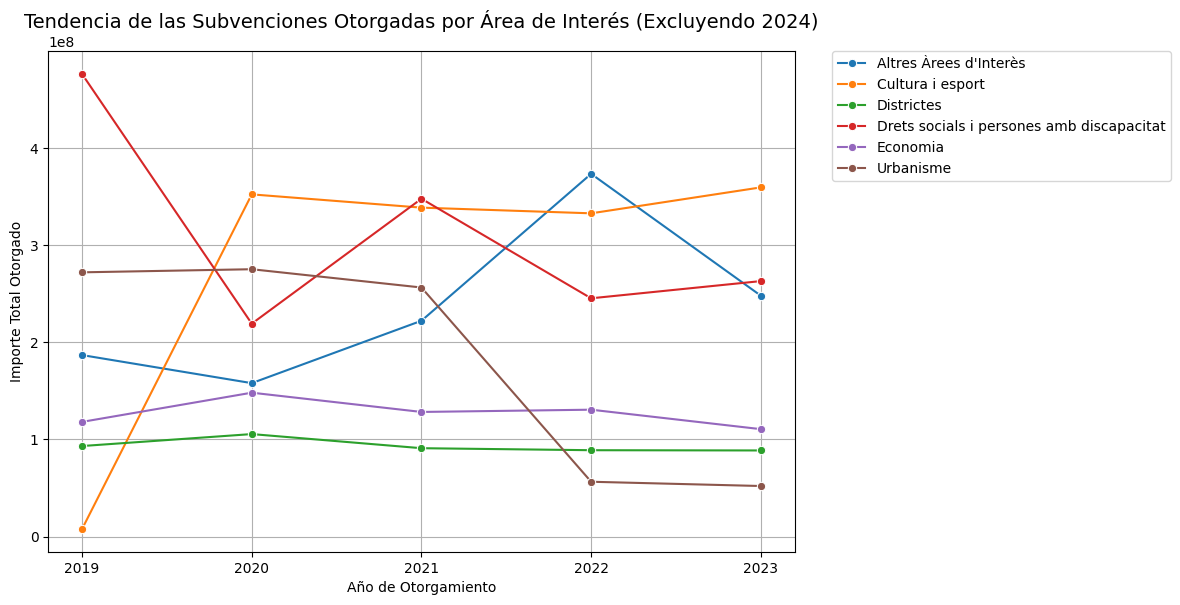

In [2224]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filtrar el dataframe para excluir el año 2024
df_filtered = df_clean[df_clean['Any_Atorgament'] < 2024]

# Agrupar los datos por 'Any_Atorgament' y 'Àrea_d\'Interès' y sumar los importes totales otorgados
df_grouped = df_filtered.groupby(['Any_Atorgament', 'Àrea_d\'Interès'])['Import_Atorgat_Inicial'].sum().reset_index()

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Any_Atorgament', y='Import_Atorgat_Inicial', hue='Àrea_d\'Interès', marker="o")

# Añadir títulos y etiquetas
plt.title('Tendencia de las Subvenciones Otorgadas por Área de Interés (Excluyendo 2024)', fontsize=14)
plt.xlabel('Año de Otorgamiento')
plt.ylabel('Importe Total Otorgado')
plt.xticks(df_grouped['Any_Atorgament'].unique())  # Asegurarse de que todos los años aparezcan en el eje X
plt.grid(True)

# Mover la leyenda fuera del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



La **Ciudad de Barcelona** ha invertido más en **Cultura i esport** y **Altres Àrees d'Interès**, especialmente desde 2020, con fluctuaciones en estos sectores. **Economía** y **Districtes** han recibido fondos de manera constante, mientras que las subvenciones a **Urbanisme** y **Drets socials** han disminuido en los últimos años. En general, la prioridad reciente parece estar en cultura y áreas de interés más diversas.


## Distribución por tamaño del proyecto

In [2225]:
df_clean['Bucket_Import_Atorgat'].cat.categories

Index(['< 800', '800 - 2 mil', '2 mil - 5 mil', '5 mil - 20 mil',
       '20 mil - 100 mil', '100 mil - 500 mil', '> 500 mil'],
      dtype='object')

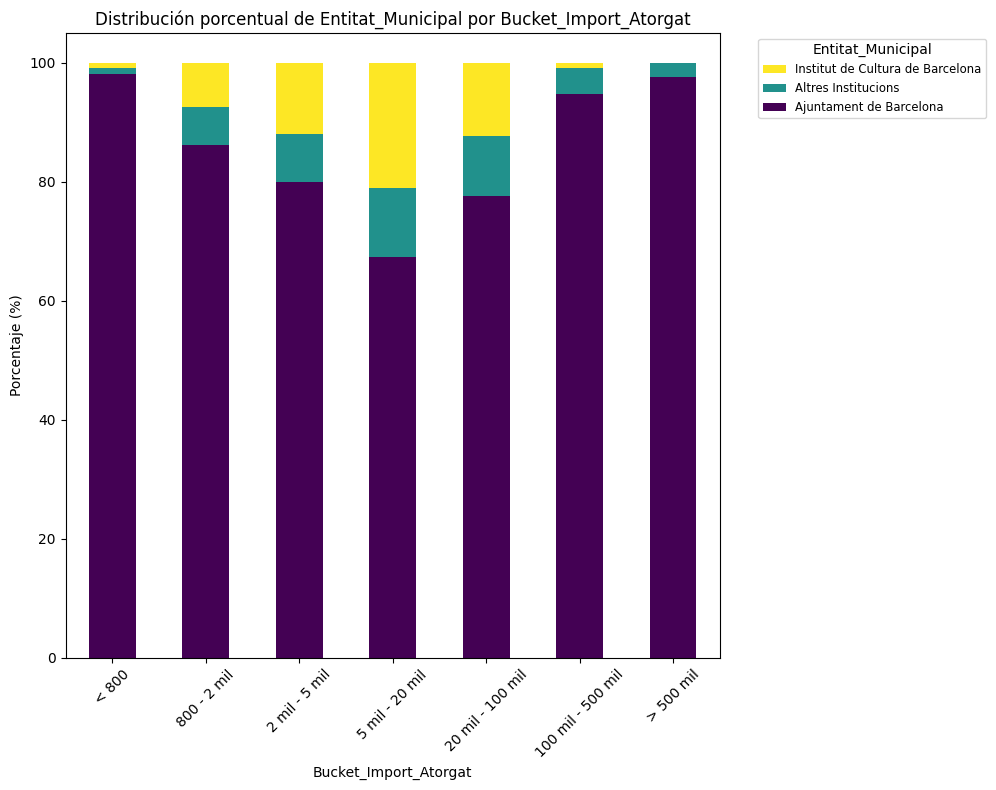

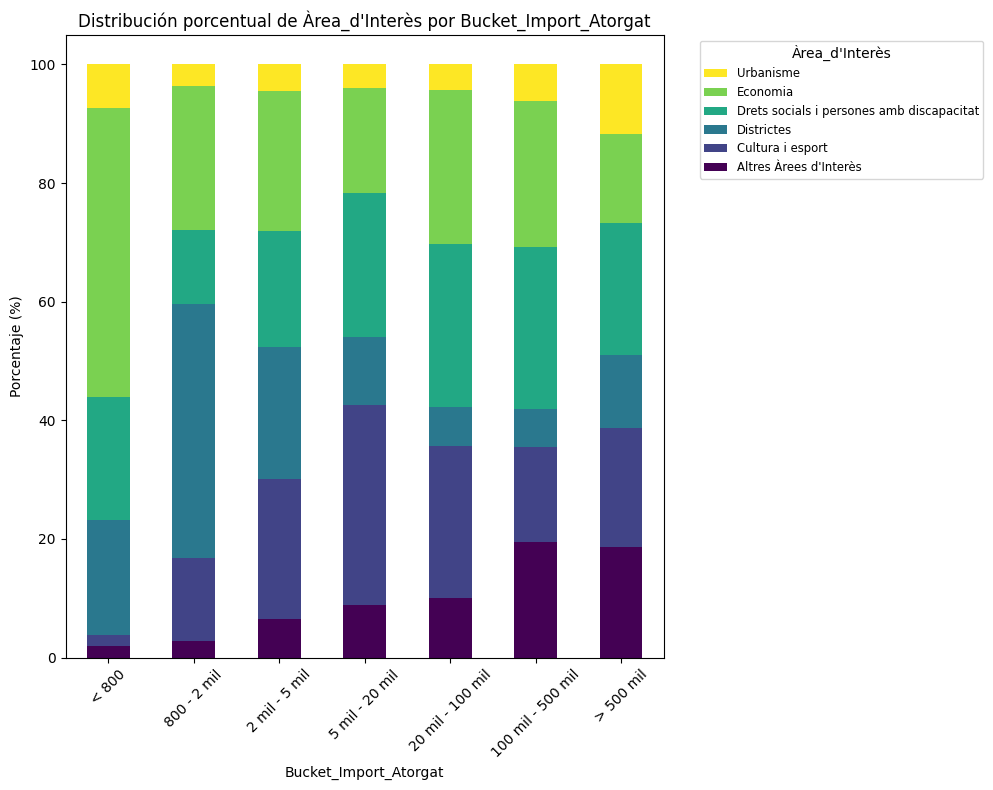

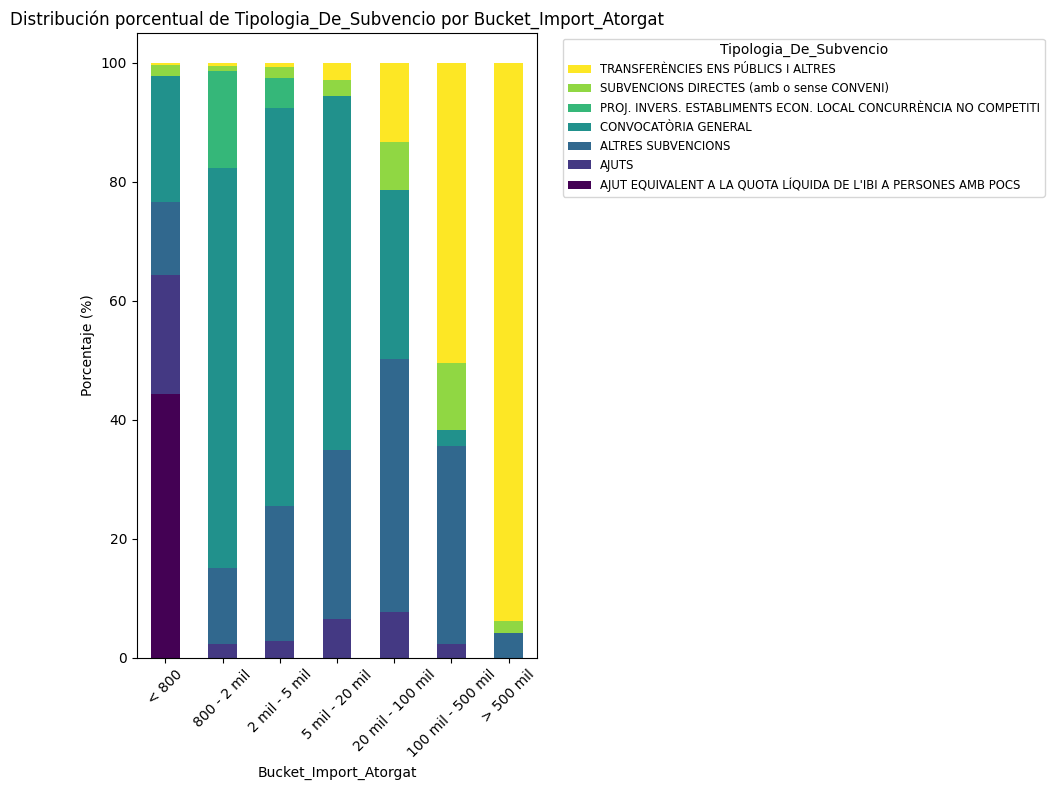

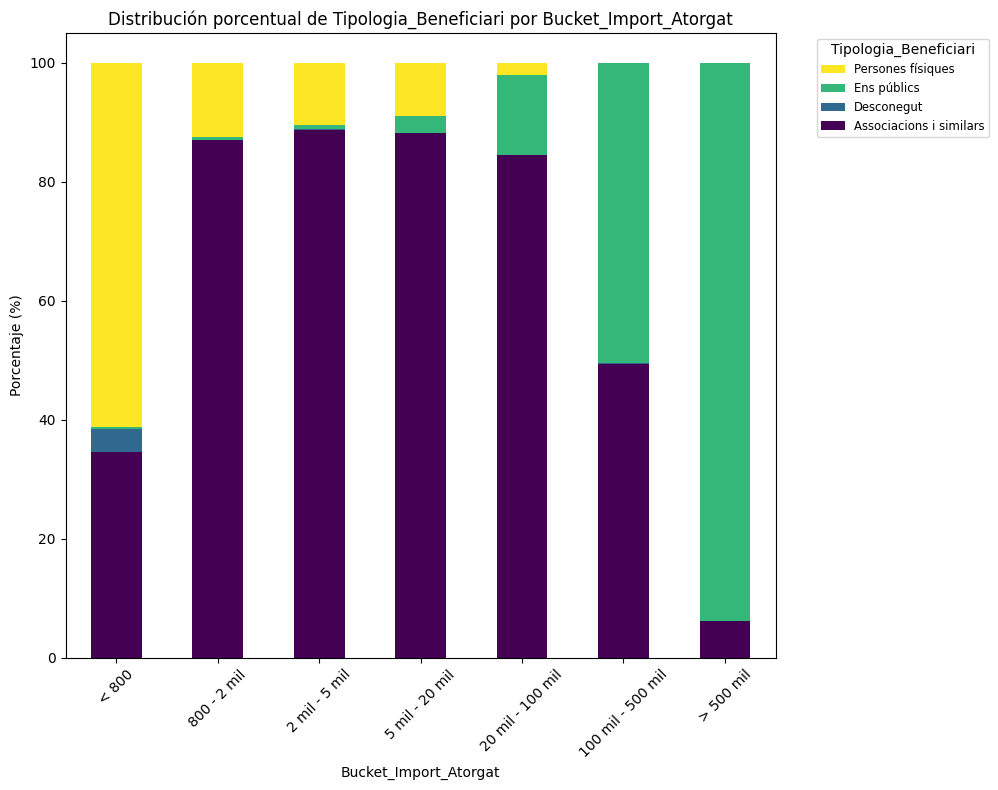

In [2226]:
# Definir las variables para el gráfico
variables = ['Entitat_Municipal', "Àrea_d'Interès", 'Tipologia_De_Subvencio', 'Tipologia_Beneficiari']
bucket_labels = ['< 800', '800 - 2 mil', '2 mil - 5 mil', '5 mil - 20 mil', '20 mil - 100 mil', '100 mil - 500 mil','> 500 mil']

# Ciclo para crear un gráfico separado para cada variable
for var in variables:
    # Configurar la figura y el título
    plt.figure(figsize=(12, 8))
    plt.title(f'Distribución porcentual de {var} por Bucket_Import_Atorgat')

    # Calcular las frecuencias porcentuales para cada Bucket_Projecte
    data_pct = (df_clean.groupby(['Bucket_Import_Atorgat', var], observed=True)
                .size()
                .groupby(level=0)
                .apply(lambda x: 100 * x / x.sum())
                .unstack(fill_value=0))

    # Crear el gráfico de barras apiladas
    ax = data_pct.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')

    # Posicionar la leyenda fuera del gráfico y reducir el tamaño del texto
    plt.legend(title=var, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', reverse=True)  # Invertir el orden

    # Agregar etiquetas y formatear los ejes x e y
    plt.xlabel('Bucket_Import_Atorgat')
    plt.ylabel('Porcentaje (%)')

    # Obtener las posiciones de las marcas y establecer las etiquetas
    plt.xticks(ticks=range(len(bucket_labels)), labels=bucket_labels, rotation=45)

    # Optimizar el diseño para dar espacio a la leyenda
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Espacio para la leyenda a la derecha
    plt.show()


* **El Ajuntament de Barcelona** es el principal responsable de las subvenciones, especialmente en los importes más bajos, donde casi toda la ayuda viene de esta entidad. Sin embargo, cuando las subvenciones aumentan, otras entidades, como el **Institut de Cultura de Barcelona** y **Altres Institucions**, comienzan a jugar un papel más importante.

* En cuanto a las **áreas de interés**, los fondos más pequeños se destinan en gran parte a **Derechos sociales y personas con discapacidad** y **Economía**, pero cuando hablamos de subvenciones mayores, destacan más áreas como **Cultura y deporte** y **Otras Áreas de Interés**. También es notable cómo **Urbanismo** empieza a recibir una mayor proporción en los importes más grandes.

* Respecto a la **tipología de subvención**, las más pequeñas tienden a ser ayudas específicas como el **ajut equivalent a la quota líquida de l'IBI**. En cambio, las subvenciones más grandes se destinan a **transferencias a entes públicos** y otras instituciones.

* En cuanto a los **beneficiarios**, las **asociaciones** son las que más reciben, sobre todo en los tramos bajos y medianos de subvención. Sin embargo, los **entes públicos** ganan relevancia cuando se trata de subvenciones de más de 100.000 euros.


## Importes Promedios por Rango de Subvención

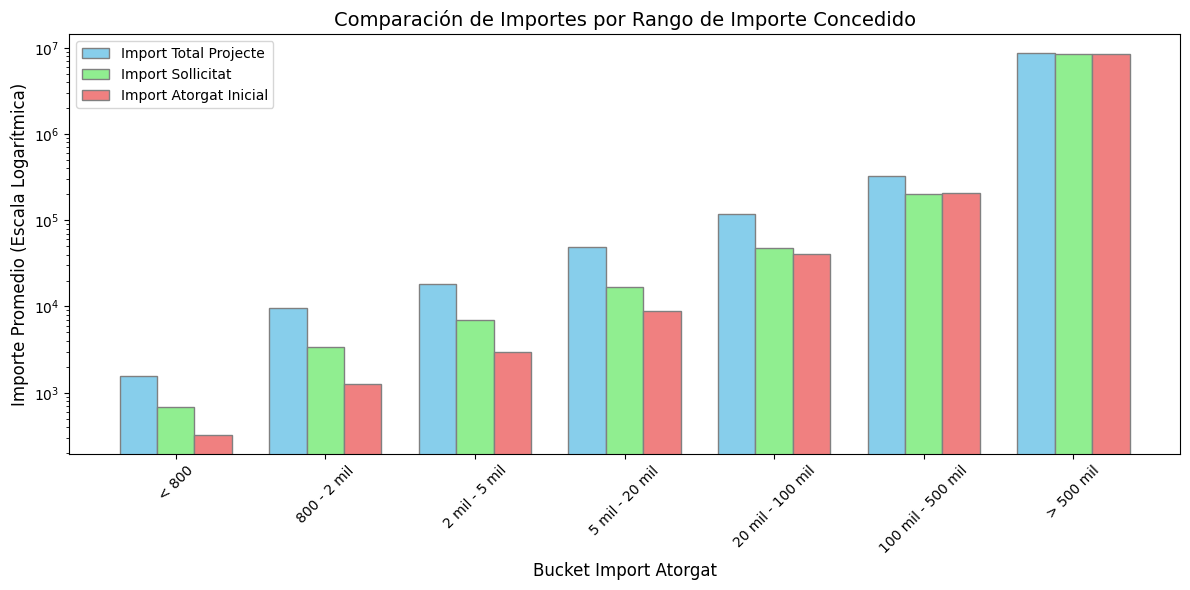

In [2227]:
# Agrupar los datos por el rango de importo concedido (Bucket_Import_Atorgat)
df_grouped = df_clean.groupby('Bucket_Import_Atorgat')[['Import_Total_Projecte', 'Import_Sollicitat', 'Import_Atorgat_Inicial']].mean().reset_index()

# Definir el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Definir la posición de las barras en el eje x
bar_width = 0.25
r1 = np.arange(len(df_grouped))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Crear las barras agrupadas
plt.bar(r1, df_grouped['Import_Total_Projecte'], color='skyblue', width=bar_width, edgecolor='grey', label='Import Total Projecte')
plt.bar(r2, df_grouped['Import_Sollicitat'], color='lightgreen', width=bar_width, edgecolor='grey', label='Import Sollicitat')
plt.bar(r3, df_grouped['Import_Atorgat_Inicial'], color='lightcoral', width=bar_width, edgecolor='grey', label='Import Atorgat Inicial')

# Configurar el eje Y en escala logarítmica
plt.yscale('log')

# Añadir etiquetas y títulos
plt.xlabel('Bucket Import Atorgat', fontsize=12)
plt.ylabel('Importe Promedio (Escala Logarítmica)', fontsize=12)
plt.title('Comparación de Importes por Rango de Importe Concedido', fontsize=14)
plt.xticks([r + bar_width for r in range(len(df_grouped))], df_grouped['Bucket_Import_Atorgat'], rotation=45)

# Añadir la leyenda
plt.legend()

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()



Los proyectos más grandes tienden a recibir un importe más acorde con sus necesidades, mientras que los proyectos pequeños suelen tener una mayor discrepancia entre el importe solicitado y el concedido.

## Evolución de importe ortogado por area de interés y range de importe

#### Dataset agrupado por mes

Quiero caracterizar cada subvenciones en base a:
- Àrea_d'Interès
- Bucket_Import_Atorgat

Para eso creo una columna que indique el codigo de cada una de estas variables, para finalmente generar una columna Unique_ID cuyos valores son la combinaciones de los codigos de cada variable.

In [2228]:
def generate_id_column(df, column_name, abbreviation):
    """
    Genera una nueva columna con ID únicos para los valores de la columna especificada.

    Args:
    df (pd.DataFrame): El DataFrame que contiene los datos.
    column_name (str): El nombre de la columna para la cual generar los ID.
    abbreviation (str): La abreviatura que se utilizará en el prefijo de los ID.

    Returns:
    pd.DataFrame: El DataFrame actualizado con la nueva columna de ID.
    """
    df = df.copy()
    # Crear un diccionario para mapear los valores únicos a ID únicos
    if isinstance(df[column_name].dtype, pd.CategoricalDtype):
      unique_values = df[column_name].cat.categories
    else:
      unique_values = df[column_name].unique()

    id_mapping = {value: f"{abbreviation}_{str(index + 1).zfill(2)}" for index, value in enumerate(unique_values)}

    # Crear la nueva columna ID en el DataFrame
    new_column_name = f"ID_{column_name}"
    df[new_column_name] = df[column_name].map(id_mapping)

    return df

In [2229]:
isinstance(df_clean['Bucket_Import_Atorgat'].dtype, pd.CategoricalDtype)

True

Genero los codigos para cada variable que me interesa

In [2230]:
columns_to_id = [
    ("Àrea_d'Interès", 'Area'),
    ('Bucket_Import_Atorgat', 'Import')
  # ('Entitat_Municipal', 'EM'),
  # ('Tipologia_De_Subvencio', 'TS'),

]


In [2231]:
# Aplico la función generate_id_column a cada columna
for col_name, abbr in columns_to_id:
    df_clean = generate_id_column(df_clean, col_name, abbr)

In [2232]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53957 entries, 0 to 53956
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data_Atorgament           53957 non-null  datetime64[ns]
 1   Any_Atorgament            53957 non-null  int32         
 2   Mes_Atorgament            53957 non-null  int32         
 3   Trimestre_Atorgament      53957 non-null  int32         
 4   Entitat_Municipal         53957 non-null  object        
 5   Àrea_d'Interès            53957 non-null  object        
 6   Tipologia_De_Subvencio    53957 non-null  object        
 7   Tipologia_Beneficiari     53957 non-null  object        
 8   Bucket_Import_Atorgat     53957 non-null  category      
 9   Import_Total_Projecte     53957 non-null  float64       
 10  Import_Sollicitat         53957 non-null  float64       
 11  Import_Atorgat_Inicial    53957 non-null  float64       
 12  ID_Àrea_d'Interès 

Ahora creo la columna Unique_ID que representará el índice unico de cada serie temporal

In [2233]:
df_clean

Data_Atorgament  Any_Atorgament  Mes_Atorgament  Trimestre_Atorgament  \
0          2019-01-08            2019               1                     1   
1          2019-01-10            2019               1                     1   
2          2019-01-10            2019               1                     1   
3          2019-01-10            2019               1                     1   
4          2019-01-10            2019               1                     1   
...               ...             ...             ...                   ...   
53952      2024-08-27            2024               8                     3   
53953      2024-08-27            2024               8                     3   
53954      2024-08-27            2024               8                     3   
53955      2024-08-29            2024               8                     3   
53956      2024-08-29            2024               8                     3   

                      Entitat_Municipal  \
0                   Altres Institucions   
1                   Altres Institucions   
2               Ajuntament de Barcelona   
3               Ajuntament de Barcelona   
4               Ajuntament de Barcelona   
...                                 ...   
53952  Institut de Cultura de Barcelona   
53953  Institut de Cultura de Barcelona   
53954  Institut de Cultura de Barcelona   
53955           Ajuntament de Barcelona   
53956           Ajuntament de Barcelona   

                                  Àrea_d'Interès Tipologia_De_Subvencio  \
0                         Altres Àrees d'Interès     ALTRES SUBVENCIONS   
1      Drets socials i persones amb discapacitat   CONVOCATÒRIA GENERAL   
2      Drets socials i persones amb discapacitat   CONVOCATÒRIA GENERAL   
3      Drets socials i persones amb discapacitat   CONVOCATÒRIA GENERAL   
4      Drets socials i persones amb discapacitat   CONVOCATÒRIA GENERAL   
...                                          ...                    ...   
53952                           Cultura i esport   CONVOCATÒRIA GENERAL   
53953                           Cultura i esport   CONVOCATÒRIA GENERAL   
53954                           Cultura i esport   CONVOCATÒRIA GENERAL   
53955                           Cultura i esport   CONVOCATÒRIA GENERAL   
53956                                 Districtes   CONVOCATÒRIA GENERAL   

         Tipologia_Beneficiari Bucket_Import_Atorgat  Import_Total_Projecte  \
0      Associacions i similars     100 mil - 500 mil              284837.00   
1      Associacions i similars        5 mil - 20 mil               27995.72   
2      Associacions i similars         2 mil - 5 mil               10670.00   
3      Associacions i similars           800 - 2 mil                5000.00   
4      Associacions i similars         2 mil - 5 mil                4532.70   
...                        ...                   ...                    ...   
53952  Associacions i similars           800 - 2 mil              131600.00   
53953        Persones físiques           800 - 2 mil               10080.00   
53954  Associacions i similars         2 mil - 5 mil               14562.00   
53955  Associacions i similars         2 mil - 5 mil               20724.09   
53956  Associacions i similars                 < 800                8840.00   

       Import_Sollicitat  Import_Atorgat_Inicial ID_Àrea_d'Interès  \
0              284837.00                284837.0           Area_01   
1               13997.86                  8000.0           Area_02   
2                3000.00                  3000.0           Area_02   
3                2500.00                  1500.0           Area_02   
4                2250.00                  2250.0           Area_02   
...                  ...                     ...               ...   
53952           30000.00                  1000.0           Area_04   
53953           10000.00                  1000.0           Area_04   
53954            7281.00                  2000.0           A

In [2234]:
df_clean['Unique_ID'] = df_clean[[  'ID_Àrea_d\'Interès',
                                    'ID_Bucket_Import_Atorgat']].agg('_'.join, axis=1)

In [2235]:
df_clean

Data_Atorgament  Any_Atorgament  Mes_Atorgament  Trimestre_Atorgament  \
0          2019-01-08            2019               1                     1   
1          2019-01-10            2019               1                     1   
2          2019-01-10            2019               1                     1   
3          2019-01-10            2019               1                     1   
4          2019-01-10            2019               1                     1   
...               ...             ...             ...                   ...   
53952      2024-08-27            2024               8                     3   
53953      2024-08-27            2024               8                     3   
53954      2024-08-27            2024               8                     3   
53955      2024-08-29            2024               8                     3   
53956      2024-08-29            2024               8                     3   

                      Entitat_Municipal  \
0                   Altres Institucions   
1                   Altres Institucions   
2               Ajuntament de Barcelona   
3               Ajuntament de Barcelona   
4               Ajuntament de Barcelona   
...                                 ...   
53952  Institut de Cultura de Barcelona   
53953  Institut de Cultura de Barcelona   
53954  Institut de Cultura de Barcelona   
53955           Ajuntament de Barcelona   
53956           Ajuntament de Barcelona   

                                  Àrea_d'Interès Tipologia_De_Subvencio  \
0                         Altres Àrees d'Interès     ALTRES SUBVENCIONS   
1      Drets socials i persones amb discapacitat   CONVOCATÒRIA GENERAL   
2      Drets socials i persones amb discapacitat   CONVOCATÒRIA GENERAL   
3      Drets socials i persones amb discapacitat   CONVOCATÒRIA GENERAL   
4      Drets socials i persones amb discapacitat   CONVOCATÒRIA GENERAL   
...                                          ...                    ...   
53952                           Cultura i esport   CONVOCATÒRIA GENERAL   
53953                           Cultura i esport   CONVOCATÒRIA GENERAL   
53954                           Cultura i esport   CONVOCATÒRIA GENERAL   
53955                           Cultura i esport   CONVOCATÒRIA GENERAL   
53956                                 Districtes   CONVOCATÒRIA GENERAL   

         Tipologia_Beneficiari Bucket_Import_Atorgat  Import_Total_Projecte  \
0      Associacions i similars     100 mil - 500 mil              284837.00   
1      Associacions i similars        5 mil - 20 mil               27995.72   
2      Associacions i similars         2 mil - 5 mil               10670.00   
3      Associacions i similars           800 - 2 mil                5000.00   
4      Associacions i similars         2 mil - 5 mil                4532.70   
...                        ...                   ...                    ...   
53952  Associacions i similars           800 - 2 mil              131600.00   
53953        Persones físiques           800 - 2 mil               10080.00   
53954  Associacions i similars         2 mil - 5 mil               14562.00   
53955  Associacions i similars         2 mil - 5 mil               20724.09   
53956  Associacions i similars                 < 800                8840.00   

       Import_Sollicitat  Import_Atorgat_Inicial ID_Àrea_d'Interès  \
0              284837.00                284837.0           Area_01   
1               13997.86                  8000.0           Area_02   
2                3000.00                  3000.0           Area_02   
3                2500.00                  1500.0           Area_02   
4                2250.00                  2250.0           Area_02   
...                  ...                     ...               ...   
53952           30000.00                  1000.0           Area_04   
53953           10000.00                  1000.0           Area_04   
53954            7281.00                  2000.0           A

In [2236]:
df_clean['Unique_ID'].value_counts()

Unique_ID
Area_06_Import_01    6360
Area_03_Import_02    5280
Area_06_Import_03    3385
Area_04_Import_03    3384
Area_04_Import_04    3272
Area_03_Import_03    3178
Area_06_Import_02    2997
Area_02_Import_03    2800
Area_02_Import_01    2700
Area_03_Import_01    2545
Area_02_Import_04    2346
Area_04_Import_02    1743
Area_06_Import_04    1716
Area_02_Import_02    1546
Area_03_Import_04    1105
Area_05_Import_01     965
Area_01_Import_03     923
Area_01_Import_04     856
Area_02_Import_05     827
Area_06_Import_05     782
Area_04_Import_05     768
Area_05_Import_03     641
Area_05_Import_02     455
Area_05_Import_04     385
Area_01_Import_02     339
Area_01_Import_05     304
Area_01_Import_01     255
Area_04_Import_01     234
Area_02_Import_06     233
Area_06_Import_06     211
Area_03_Import_05     200
Area_01_Import_06     167
Area_02_Import_07     152
Area_04_Import_07     137
Area_04_Import_06     136
Area_05_Import_05     129
Area_01_Import_07     127
Area_06_Import_07     102
Area_03_Import_07      85
Area_05_Import_07      80
Area_03_Import_06      55
Area_05_Import_06      52
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Count'>

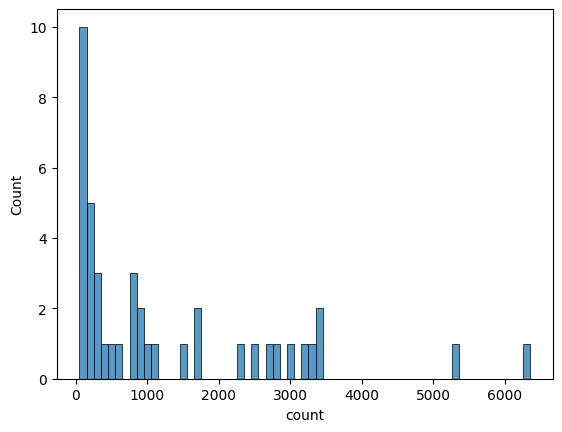

In [2237]:
sns.histplot(df_clean['Unique_ID'].value_counts(),binwidth=100)

In [2238]:
df_clean['Unique_ID'].nunique()

42

Agrupo los datos por més y unique id (área de interés y bucket projecte)

In [2239]:
df_month = df_clean.copy()

In [2240]:
df_month

Data_Atorgament  Any_Atorgament  Mes_Atorgament  Trimestre_Atorgament  \
0          2019-01-08            2019               1                     1   
1          2019-01-10            2019               1                     1   
2          2019-01-10            2019               1                     1   
3          2019-01-10            2019               1                     1   
4          2019-01-10            2019               1                     1   
...               ...             ...             ...                   ...   
53952      2024-08-27            2024               8                     3   
53953      2024-08-27            2024               8                     3   
53954      2024-08-27            2024               8                     3   
53955      2024-08-29            2024               8                     3   
53956      2024-08-29            2024               8                     3   

                      Entitat_Municipal  \
0                   Altres Institucions   
1                   Altres Institucions   
2               Ajuntament de Barcelona   
3               Ajuntament de Barcelona   
4               Ajuntament de Barcelona   
...                                 ...   
53952  Institut de Cultura de Barcelona   
53953  Institut de Cultura de Barcelona   
53954  Institut de Cultura de Barcelona   
53955           Ajuntament de Barcelona   
53956           Ajuntament de Barcelona   

                                  Àrea_d'Interès Tipologia_De_Subvencio  \
0                         Altres Àrees d'Interès     ALTRES SUBVENCIONS   
1      Drets socials i persones amb discapacitat   CONVOCATÒRIA GENERAL   
2      Drets socials i persones amb discapacitat   CONVOCATÒRIA GENERAL   
3      Drets socials i persones amb discapacitat   CONVOCATÒRIA GENERAL   
4      Drets socials i persones amb discapacitat   CONVOCATÒRIA GENERAL   
...                                          ...                    ...   
53952                           Cultura i esport   CONVOCATÒRIA GENERAL   
53953                           Cultura i esport   CONVOCATÒRIA GENERAL   
53954                           Cultura i esport   CONVOCATÒRIA GENERAL   
53955                           Cultura i esport   CONVOCATÒRIA GENERAL   
53956                                 Districtes   CONVOCATÒRIA GENERAL   

         Tipologia_Beneficiari Bucket_Import_Atorgat  Import_Total_Projecte  \
0      Associacions i similars     100 mil - 500 mil              284837.00   
1      Associacions i similars        5 mil - 20 mil               27995.72   
2      Associacions i similars         2 mil - 5 mil               10670.00   
3      Associacions i similars           800 - 2 mil                5000.00   
4      Associacions i similars         2 mil - 5 mil                4532.70   
...                        ...                   ...                    ...   
53952  Associacions i similars           800 - 2 mil              131600.00   
53953        Persones físiques           800 - 2 mil               10080.00   
53954  Associacions i similars         2 mil - 5 mil               14562.00   
53955  Associacions i similars         2 mil - 5 mil               20724.09   
53956  Associacions i similars                 < 800                8840.00   

       Import_Sollicitat  Import_Atorgat_Inicial ID_Àrea_d'Interès  \
0              284837.00                284837.0           Area_01   
1               13997.86                  8000.0           Area_02   
2                3000.00                  3000.0           Area_02   
3                2500.00                  1500.0           Area_02   
4                2250.00                  2250.0           Area_02   
...                  ...                     ...               ...   
53952           30000.00                  1000.0           Area_04   
53953           10000.00                  1000.0           Area_04   
53954            7281.00                  2000.0           A

In [2241]:
df_month = df_month.groupby(['Unique_ID','Any_Atorgament','Mes_Atorgament']).agg(
    Trimestre_Atorgament = ('Trimestre_Atorgament','first'),
    Àrea_de_Interès = ("Àrea_d'Interès",'first'),
    Bucket_Import_Atorgat = ('Bucket_Import_Atorgat','first'),
    ID_Àrea_de_Interès = ("ID_Àrea_d'Interès",'first'),
    ID_Bucket_Import_Atorgat = ('ID_Bucket_Import_Atorgat','first'),
    Import_Total_Projectes = ('Import_Total_Projecte', 'sum'),
    Import_Total_Sollicitat = ('Import_Sollicitat', 'sum'),
    Import_Total_Atorgat = ('Import_Atorgat_Inicial', 'sum')
).reset_index()

In [2242]:
df_month

Unique_ID  Any_Atorgament  Mes_Atorgament  Trimestre_Atorgament  \
0     Area_01_Import_01            2019               2                     1   
1     Area_01_Import_01            2019               8                     3   
2     Area_01_Import_01            2019              10                     4   
3     Area_01_Import_01            2019              11                     4   
4     Area_01_Import_01            2019              12                     4   
...                 ...             ...             ...                   ...   
1851  Area_06_Import_07            2023               3                     1   
1852  Area_06_Import_07            2023               5                     2   
1853  Area_06_Import_07            2023               8                     3   
1854  Area_06_Import_07            2023              12                     4   
1855  Area_06_Import_07            2024               1                     1   

             Àrea_de_Interès Bucket_Import_Atorgat ID_Àrea_de_Interès  \
0     Altres Àrees d'Interès                 < 800            Area_01   
1     Altres Àrees d'Interès                 < 800            Area_01   
2     Altres Àrees d'Interès                 < 800            Area_01   
3     Altres Àrees d'Interès                 < 800            Area_01   
4     Altres Àrees d'Interès                 < 800            Area_01   
...                      ...                   ...                ...   
1851                Economia             > 500 mil            Area_06   
1852                Economia             > 500 mil            Area_06   
1853                Economia             > 500 mil            Area_06   
1854                Economia             > 500 mil            Area_06   
1855                Economia             > 500 mil            Area_06   

     ID_Bucket_Import_Atorgat  Import_Total_Projectes  \
0                   Import_01                 1040.00   
1                   Import_01                 1650.00   
2                   Import_01                 2800.00   
3                   Import_01                10857.80   
4                   Import_01                 3150.00   
...                       ...                     ...   
1851                Import_07              2000000.00   
1852                Import_07              1733889.00   
1853                Import_07              9562500.00   
1854                Import_07              2683906.07   
1855                Import_07              2175884.43   

      Import_Total_Sollicitat  Import_Total_Atorgat  
0                     1040.00               1040.00  
1                      825.00                825.00  
2                     1250.00               1250.00  
3                     7568.90               6848.90  
4                     3150.00               3150.00  
...                       ...                   ...  
1851               2000000.00            2000000.00  
1852               1733889.00            1733889.00  
1853               9562500.00            9562500.00  
1854               2627406.07            2627406.07  
1855               2175884.43            2175884.43  

[1856 rows x 11 columns]

In [2243]:
# ordeno el datset por unique_id y fecha de ortogación
df_month = df_month.sort_values(by=['Unique_ID','Any_Atorgament','Mes_Atorgament'])

In [2244]:
df_month

Unique_ID  Any_Atorgament  Mes_Atorgament  Trimestre_Atorgament  \
0     Area_01_Import_01            2019               2                     1   
1     Area_01_Import_01            2019               8                     3   
2     Area_01_Import_01            2019              10                     4   
3     Area_01_Import_01            2019              11                     4   
4     Area_01_Import_01            2019              12                     4   
...                 ...             ...             ...                   ...   
1851  Area_06_Import_07            2023               3                     1   
1852  Area_06_Import_07            2023               5                     2   
1853  Area_06_Import_07            2023               8                     3   
1854  Area_06_Import_07            2023              12                     4   
1855  Area_06_Import_07            2024               1                     1   

             Àrea_de_Interès Bucket_Import_Atorgat ID_Àrea_de_Interès  \
0     Altres Àrees d'Interès                 < 800            Area_01   
1     Altres Àrees d'Interès                 < 800            Area_01   
2     Altres Àrees d'Interès                 < 800            Area_01   
3     Altres Àrees d'Interès                 < 800            Area_01   
4     Altres Àrees d'Interès                 < 800            Area_01   
...                      ...                   ...                ...   
1851                Economia             > 500 mil            Area_06   
1852                Economia             > 500 mil            Area_06   
1853                Economia             > 500 mil            Area_06   
1854                Economia             > 500 mil            Area_06   
1855                Economia             > 500 mil            Area_06   

     ID_Bucket_Import_Atorgat  Import_Total_Projectes  \
0                   Import_01                 1040.00   
1                   Import_01                 1650.00   
2                   Import_01                 2800.00   
3                   Import_01                10857.80   
4                   Import_01                 3150.00   
...                       ...                     ...   
1851                Import_07              2000000.00   
1852                Import_07              1733889.00   
1853                Import_07              9562500.00   
1854                Import_07              2683906.07   
1855                Import_07              2175884.43   

      Import_Total_Sollicitat  Import_Total_Atorgat  
0                     1040.00               1040.00  
1                      825.00                825.00  
2                     1250.00               1250.00  
3                     7568.90               6848.90  
4                     3150.00               3150.00  
...                       ...                   ...  
1851               2000000.00            2000000.00  
1852               1733889.00            1733889.00  
1853               9562500.00            9562500.00  
1854               2627406.07            2627406.07  
1855               2175884.43            2175884.43  

[1856 rows x 11 columns]

In [2245]:
df_month.to_pickle(os.path.join(DATA_PATH,'df_month.pkl'))

In [2246]:
df_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Unique_ID                 1856 non-null   object  
 1   Any_Atorgament            1856 non-null   int32   
 2   Mes_Atorgament            1856 non-null   int32   
 3   Trimestre_Atorgament      1856 non-null   int32   
 4   Àrea_de_Interès           1856 non-null   object  
 5   Bucket_Import_Atorgat     1856 non-null   category
 6   ID_Àrea_de_Interès        1856 non-null   object  
 7   ID_Bucket_Import_Atorgat  1856 non-null   category
 8   Import_Total_Projectes    1856 non-null   float64 
 9   Import_Total_Sollicitat   1856 non-null   float64 
 10  Import_Total_Atorgat      1856 non-null   float64 
dtypes: category(2), float64(3), int32(3), object(3)
memory usage: 113.2+ KB


#### Plot

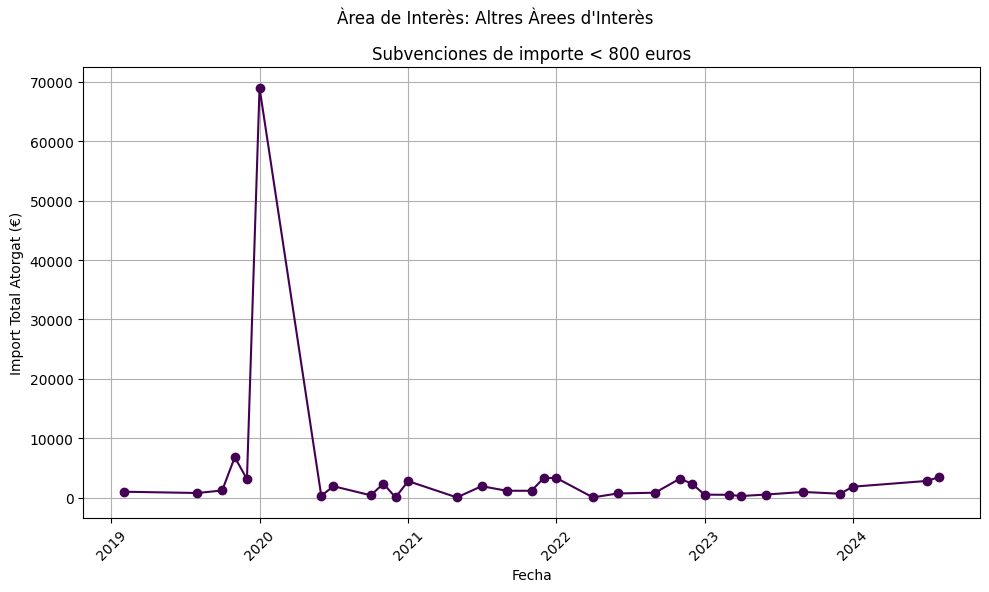

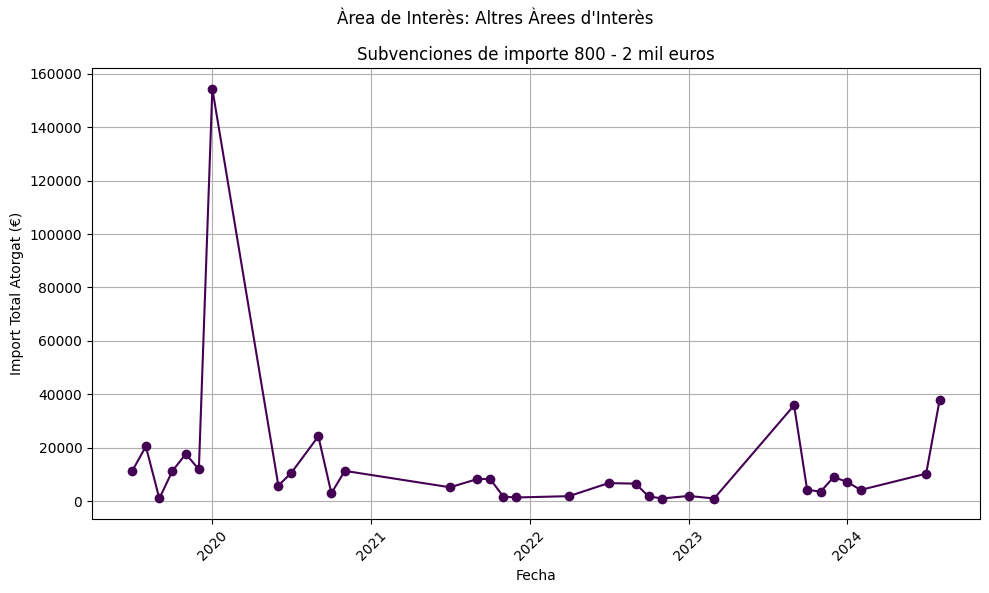

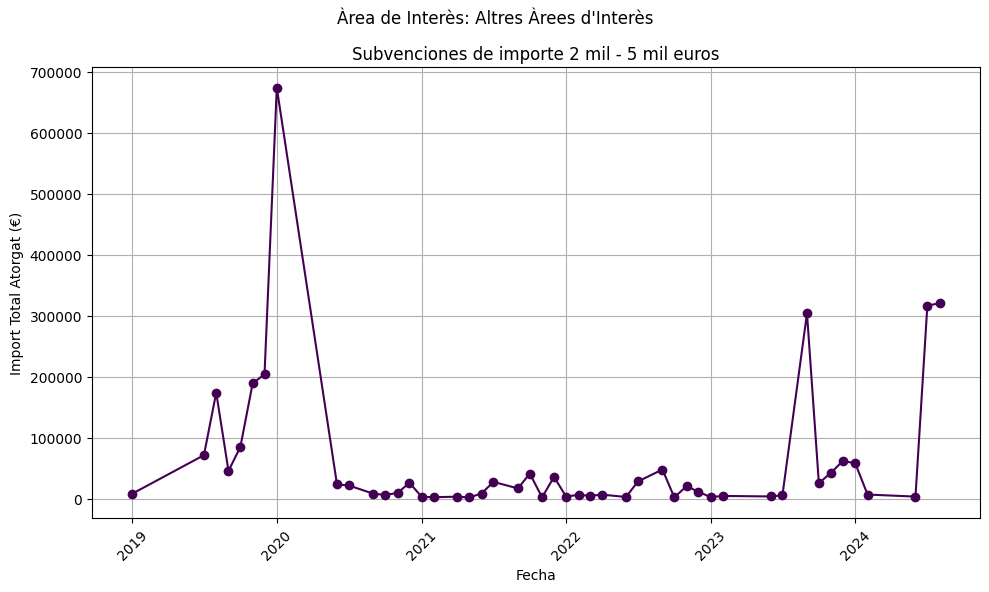

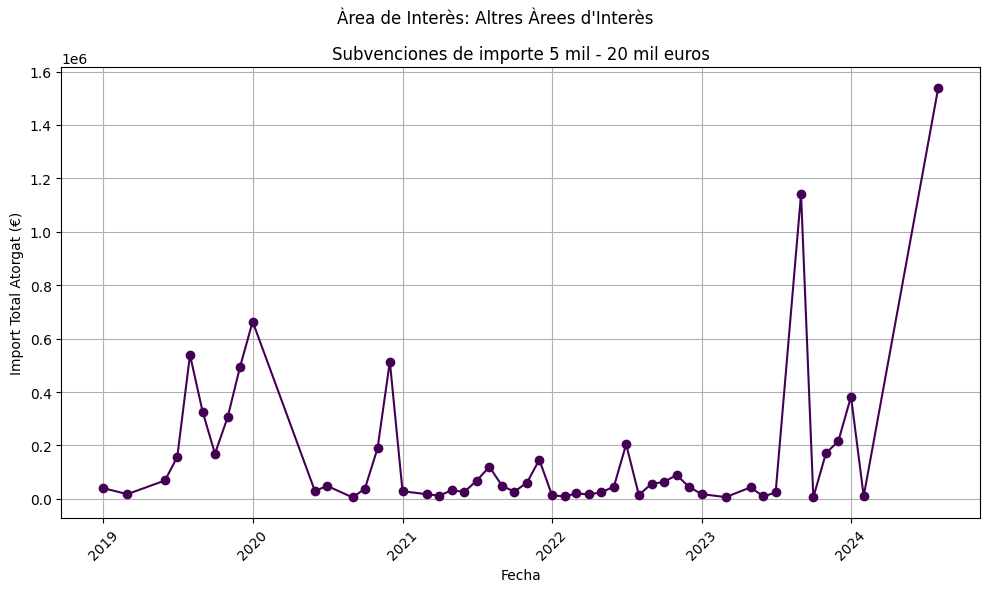

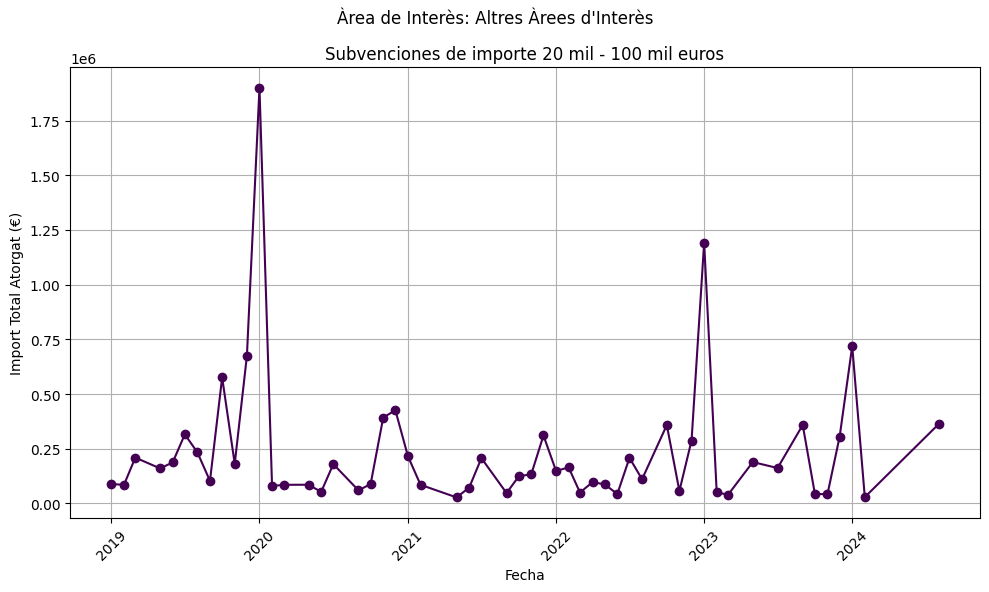

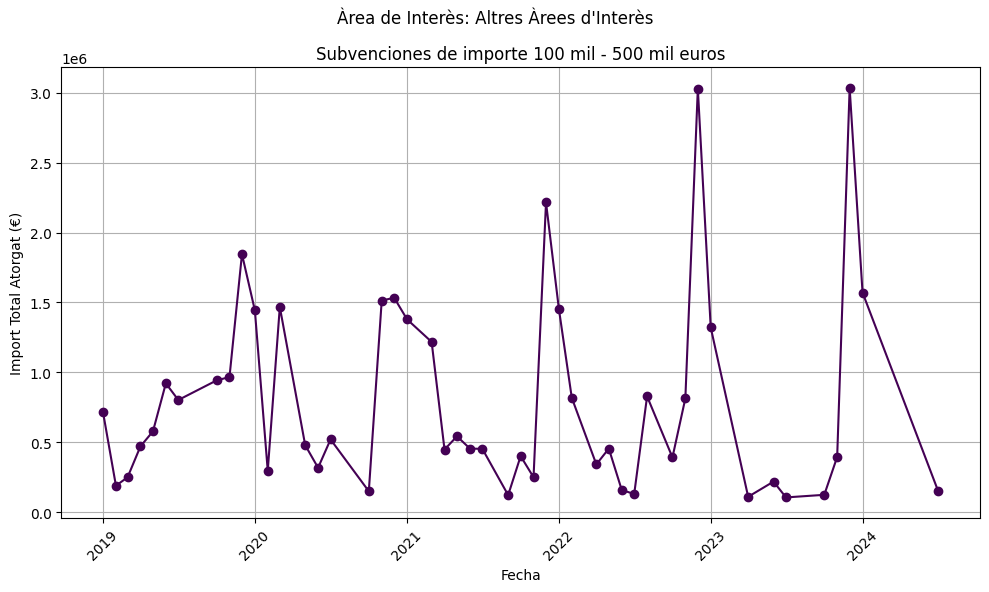

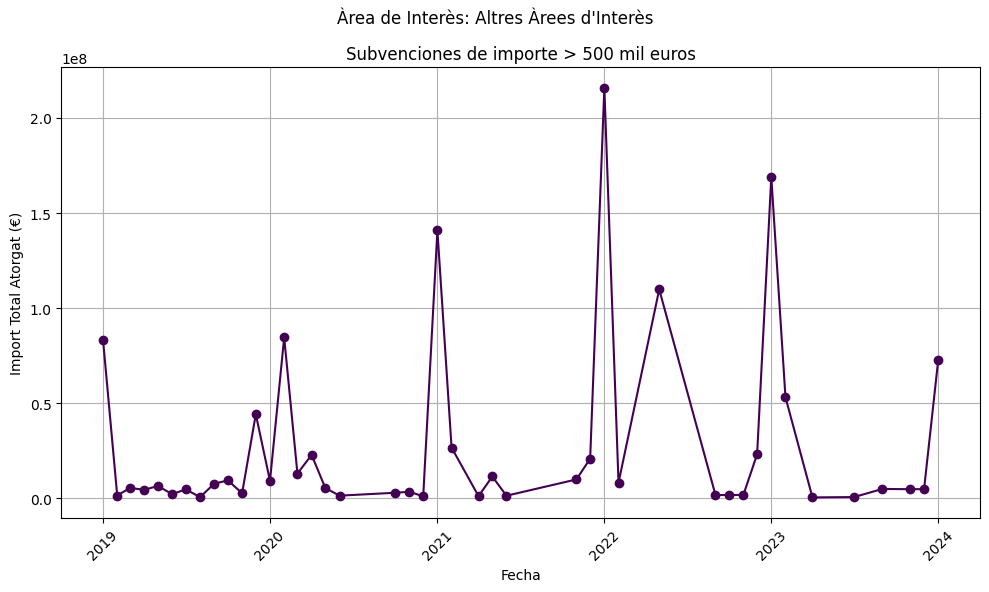

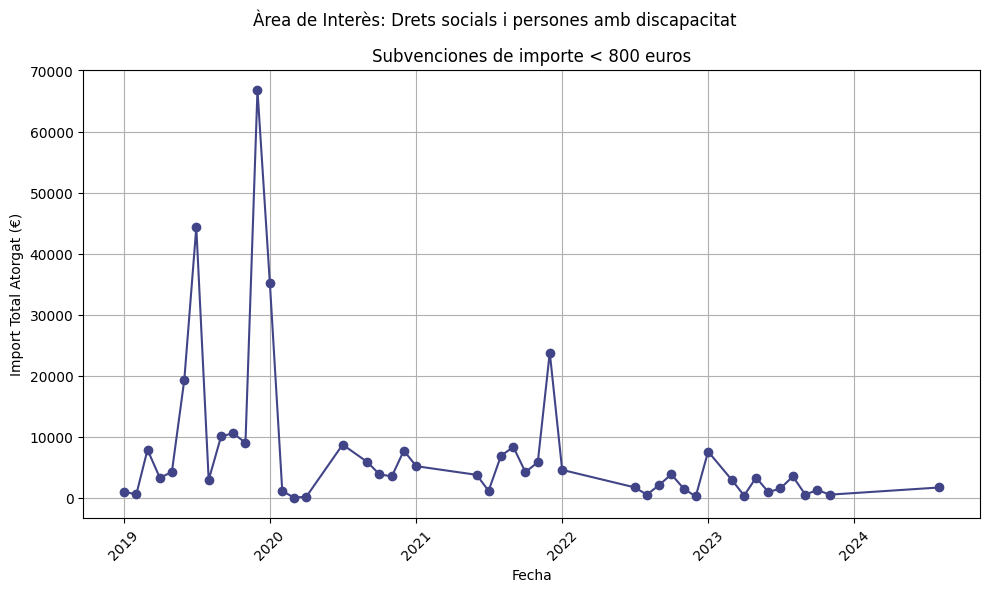

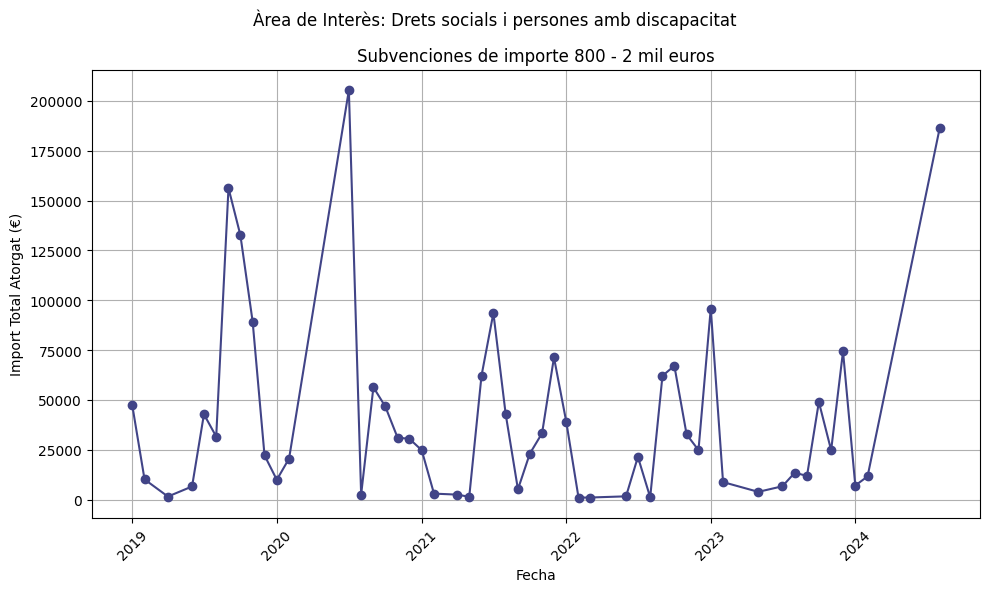

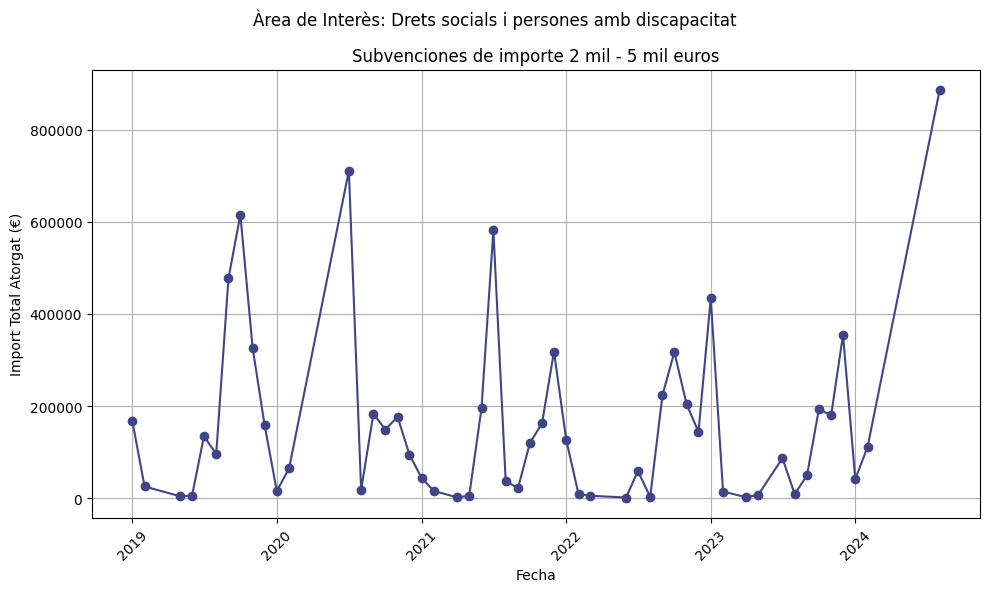

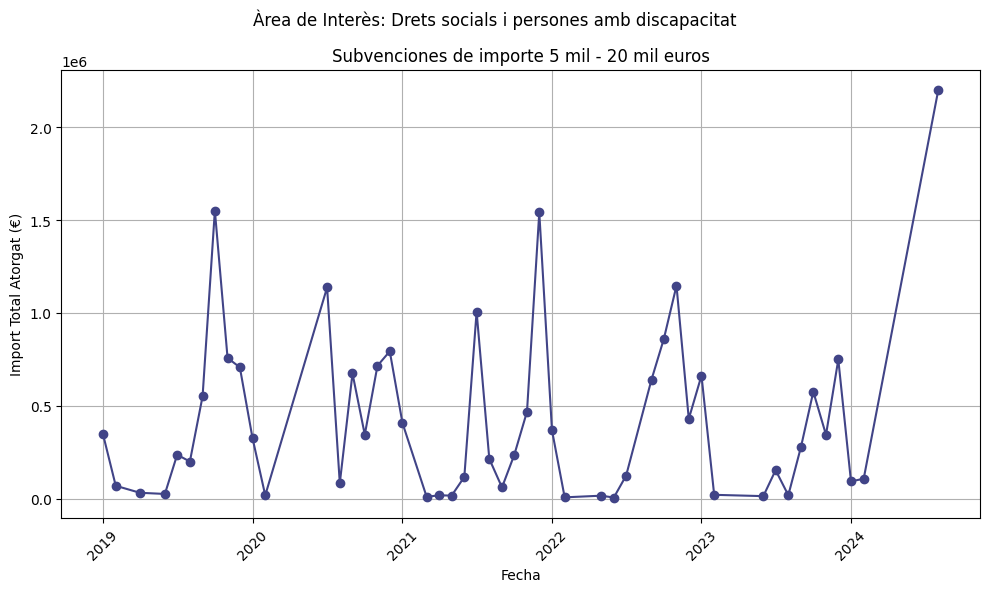

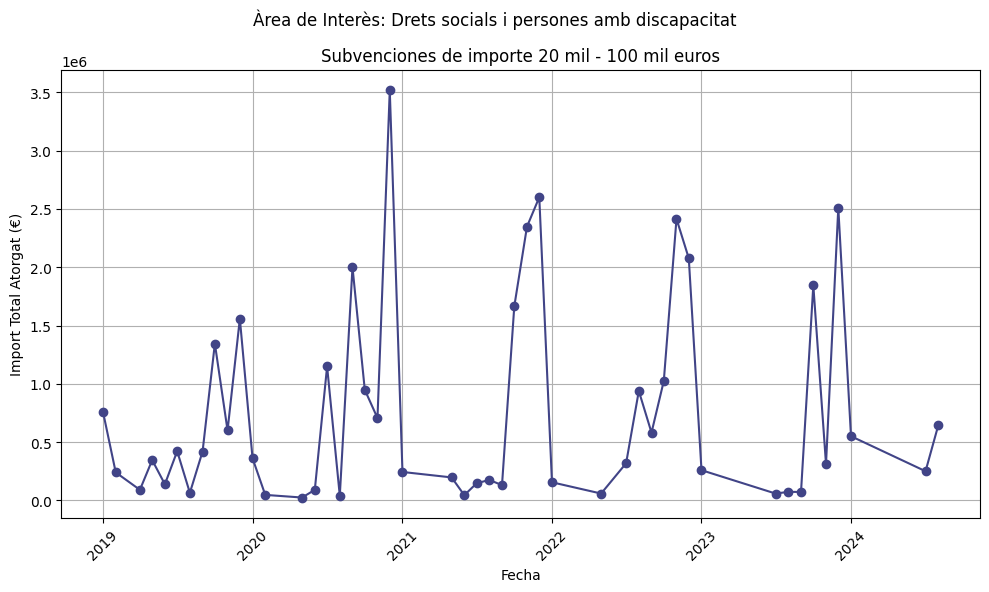

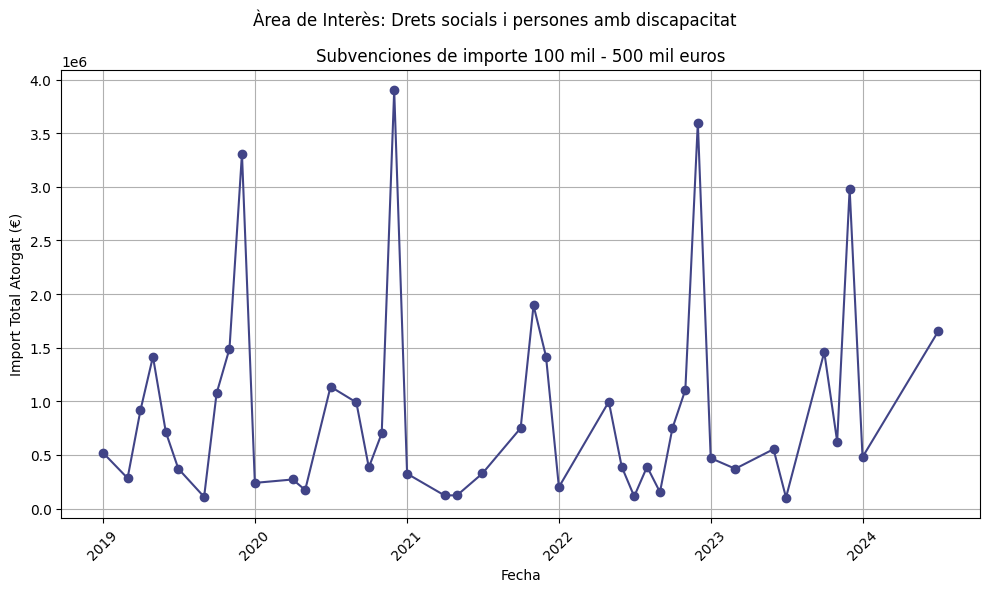

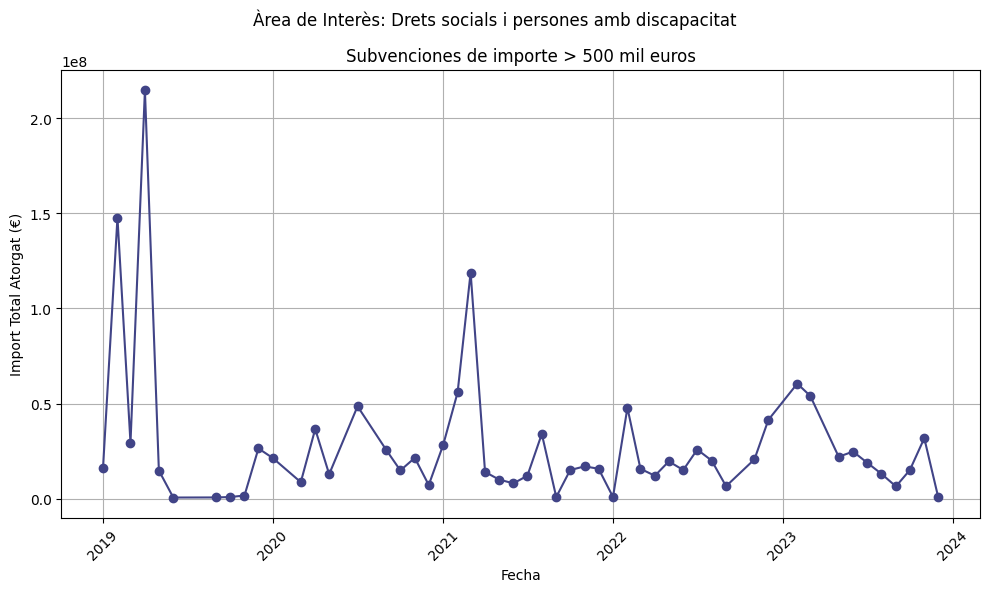

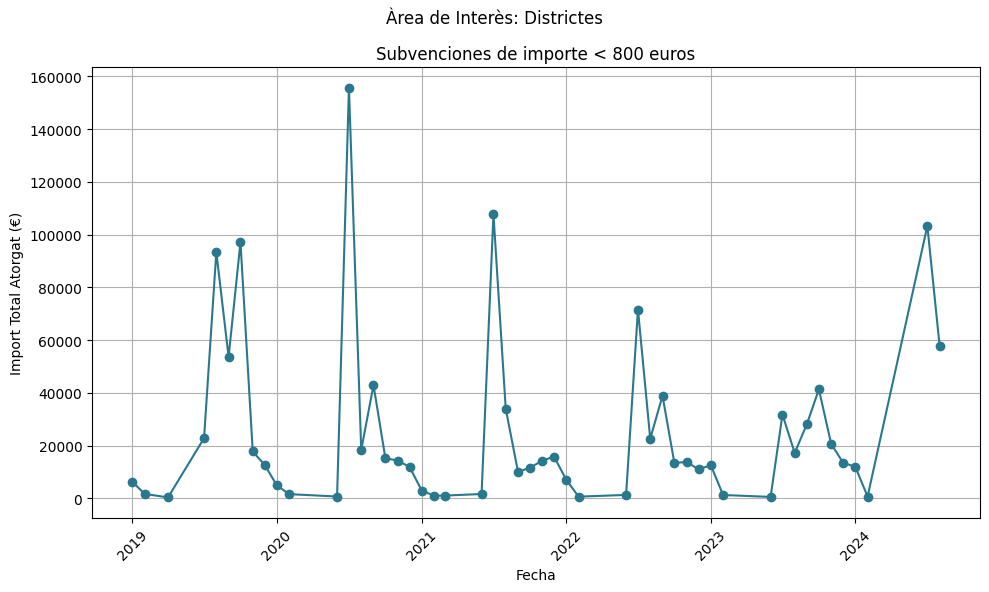

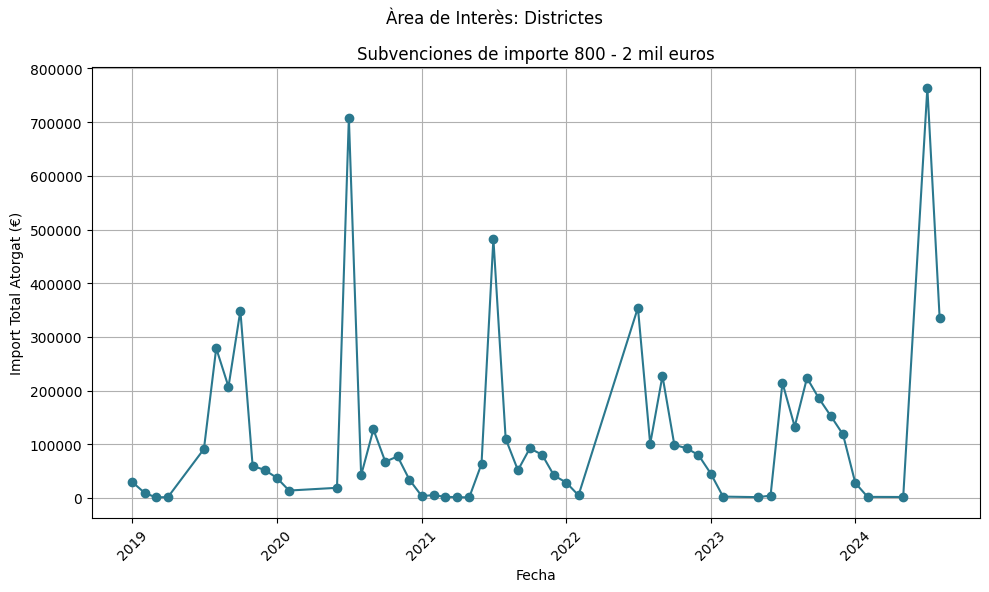

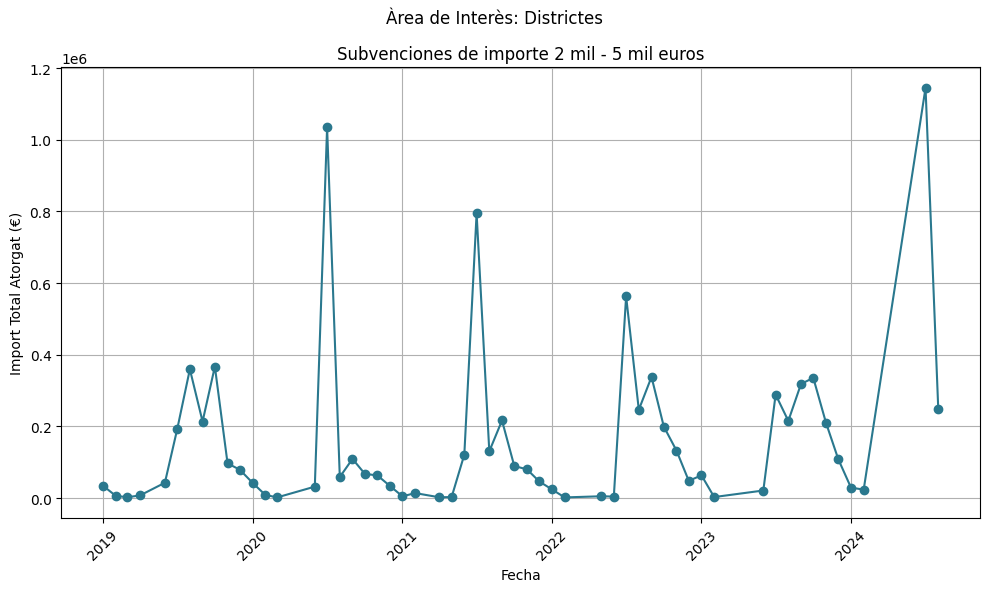

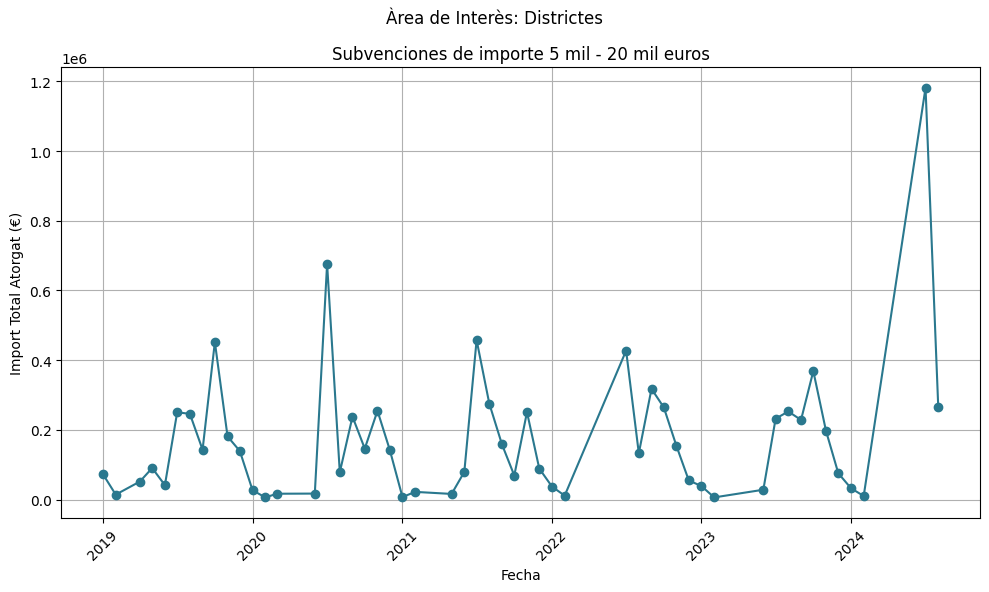

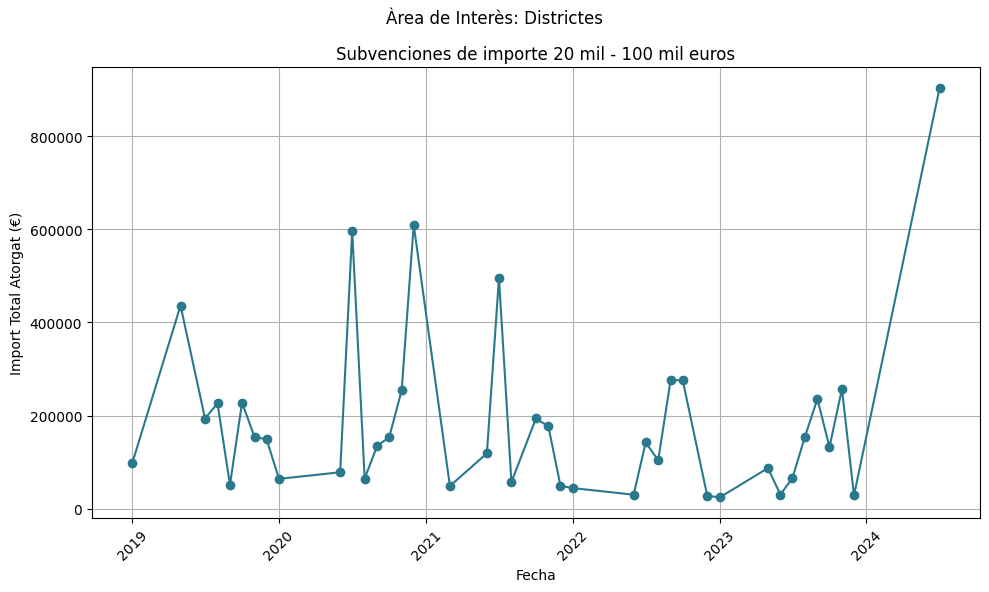

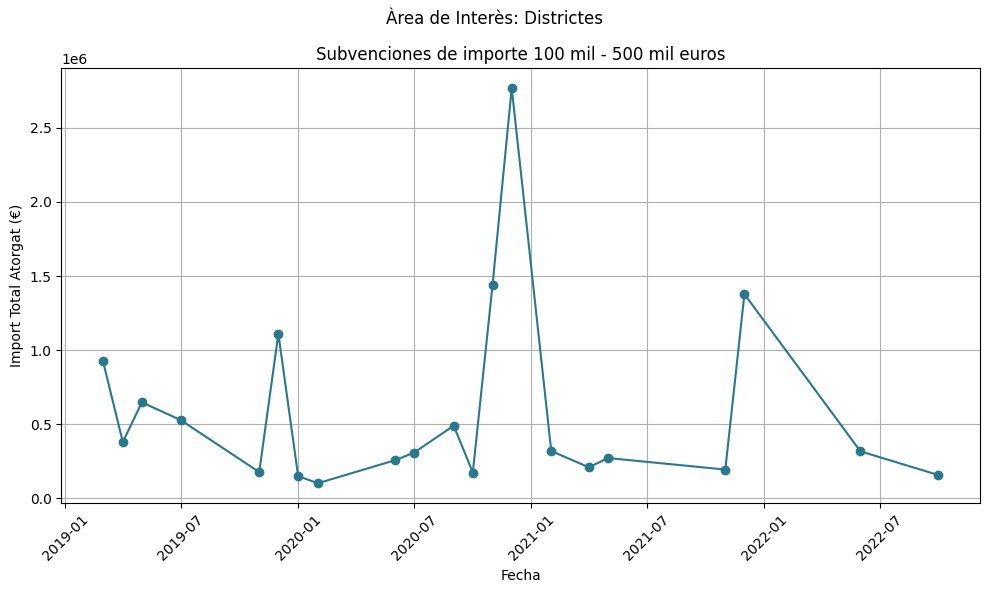

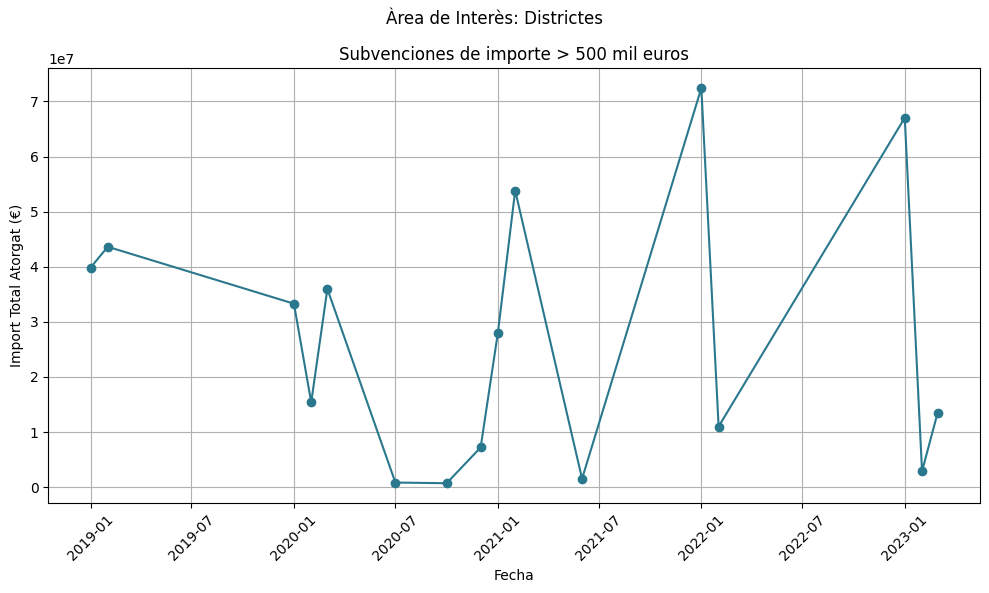

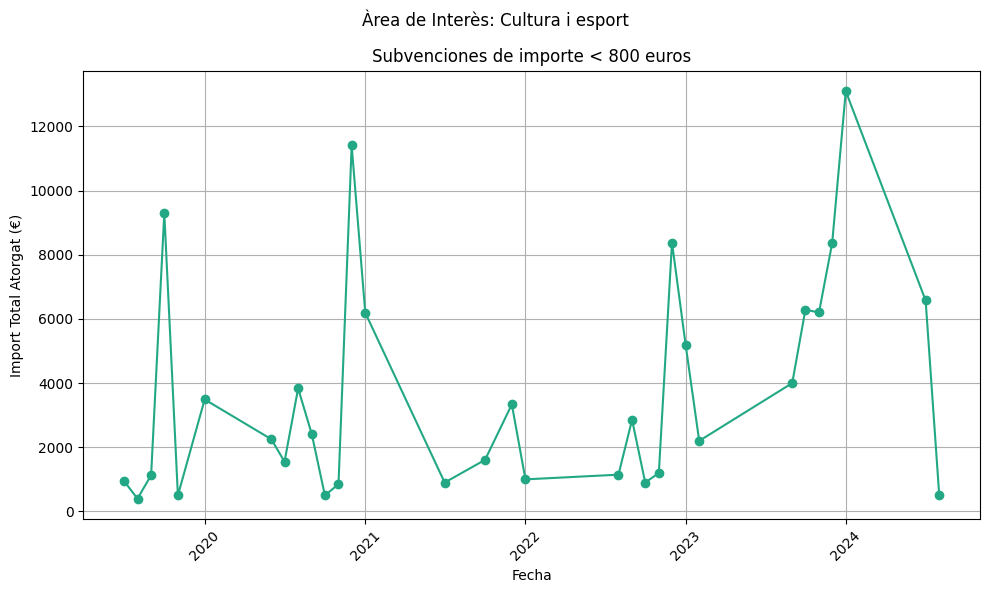

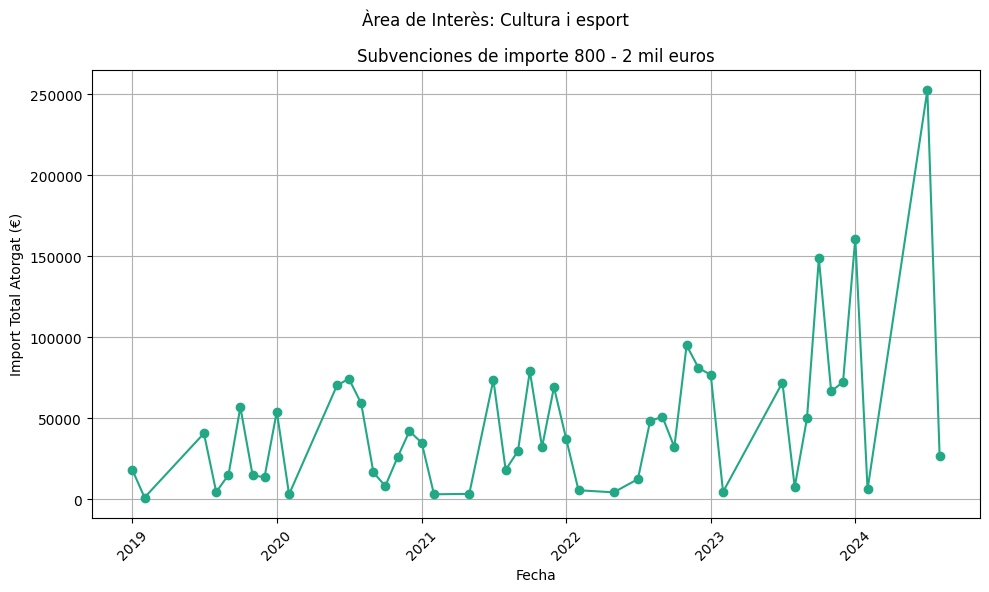

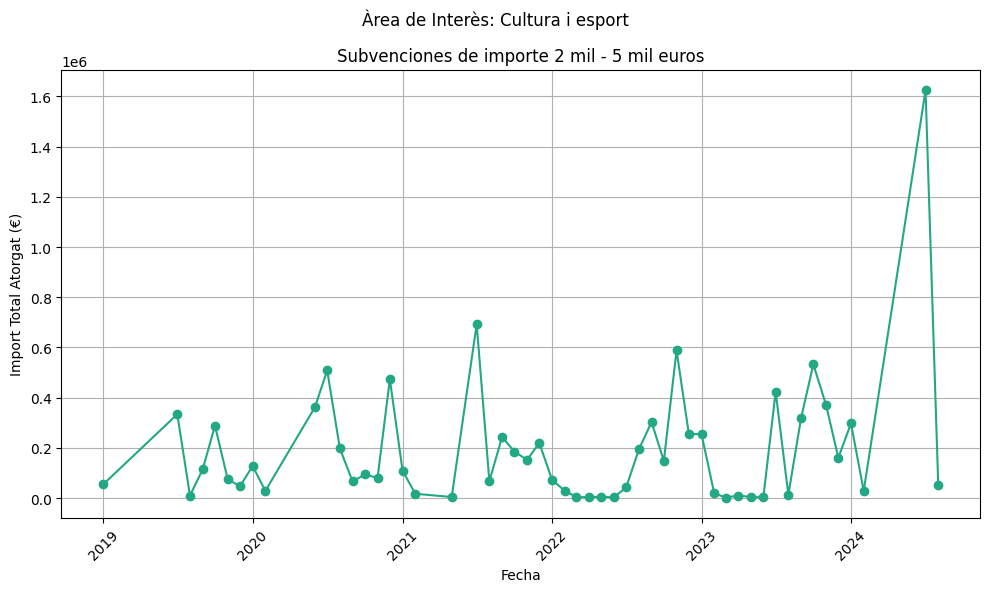

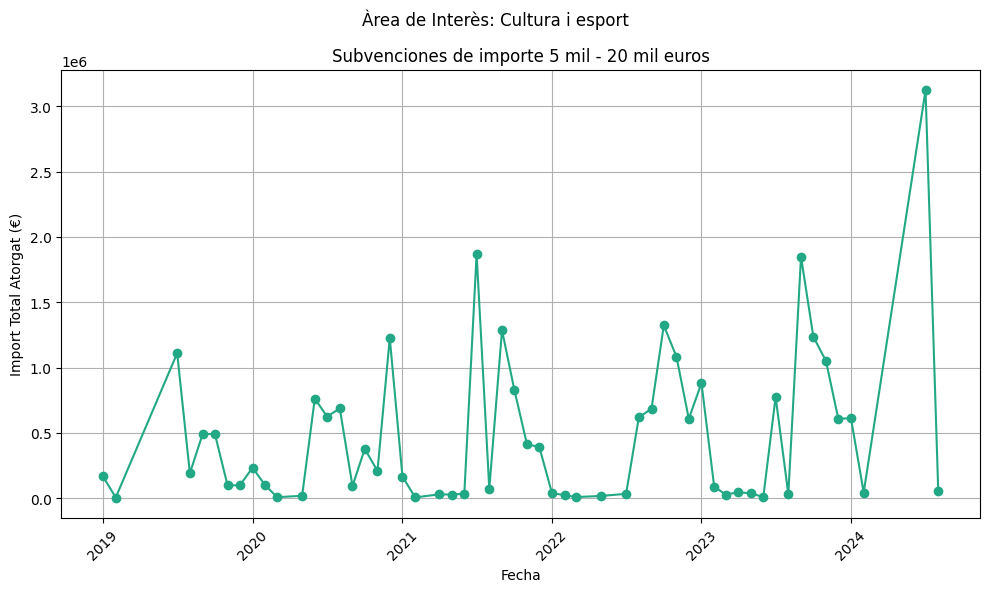

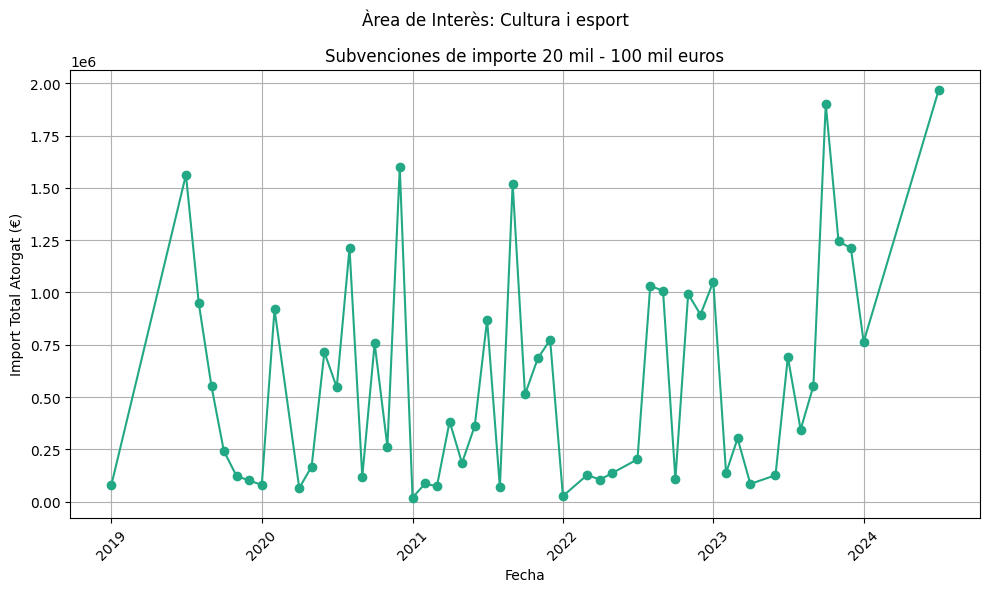

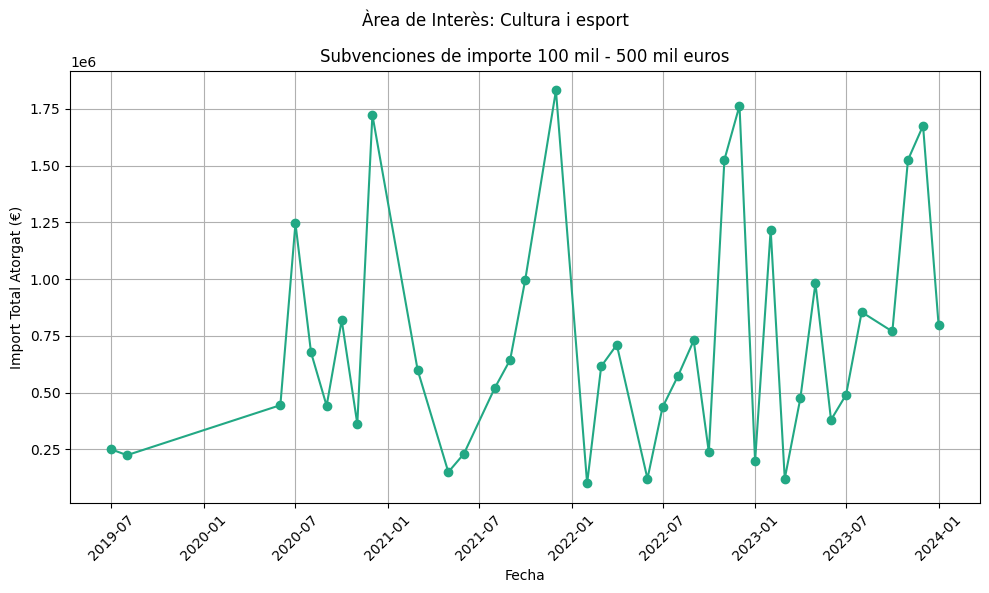

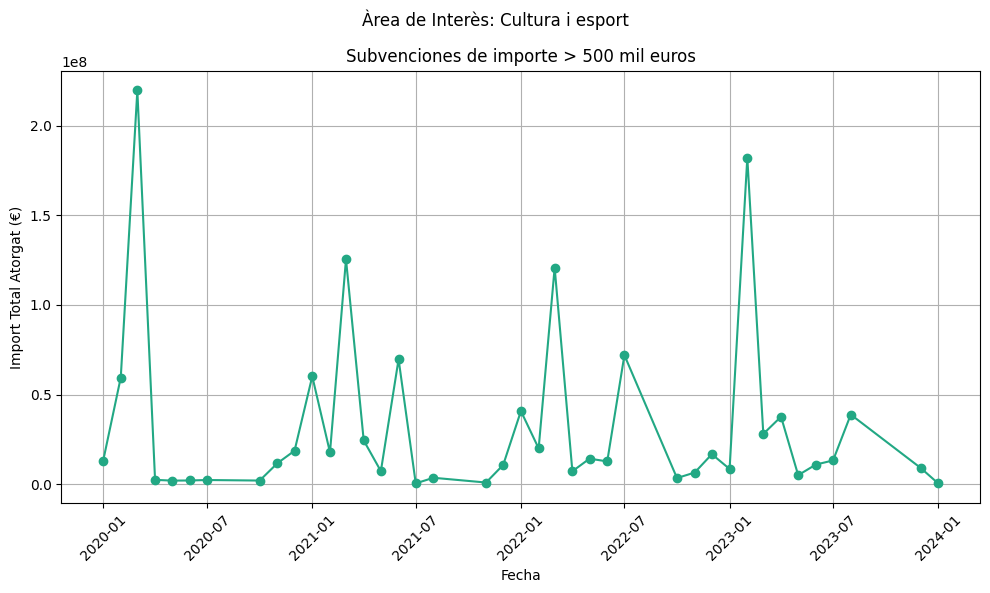

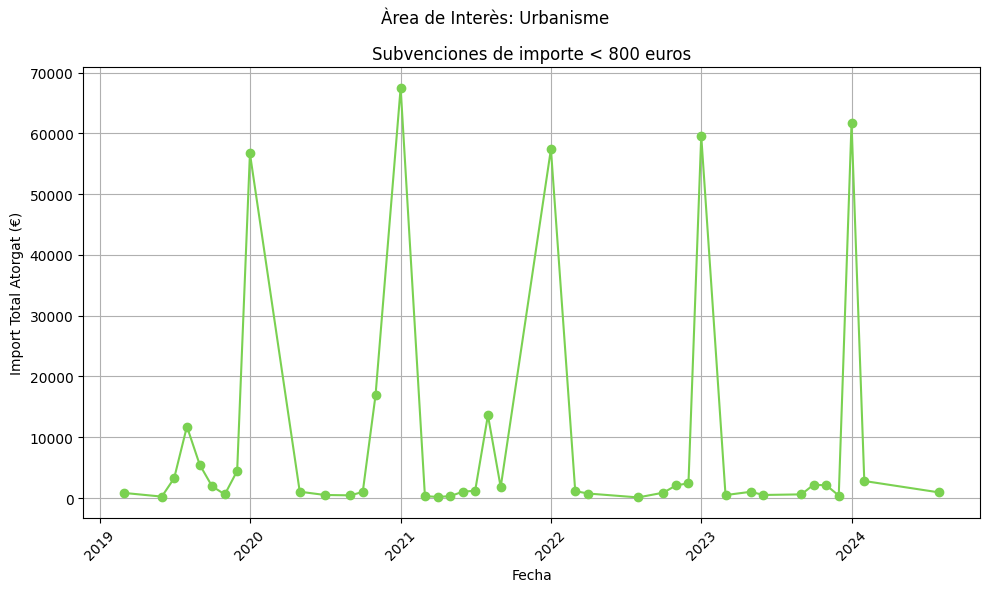

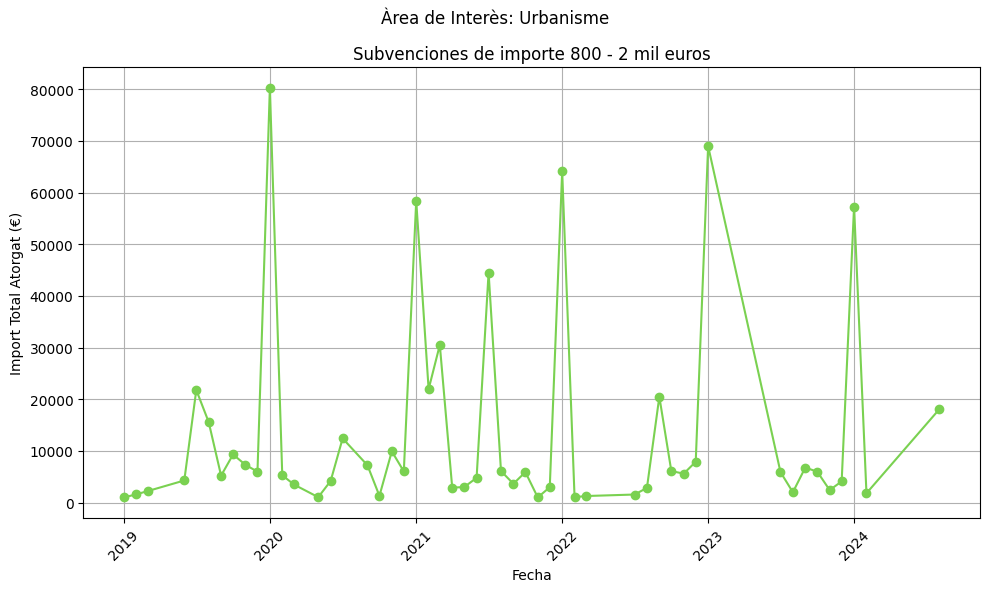

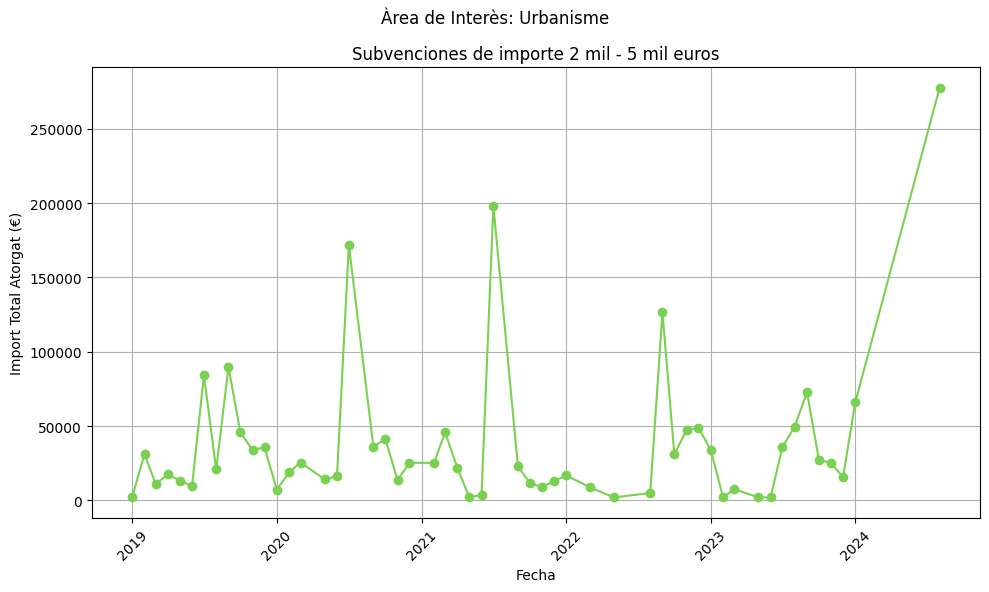

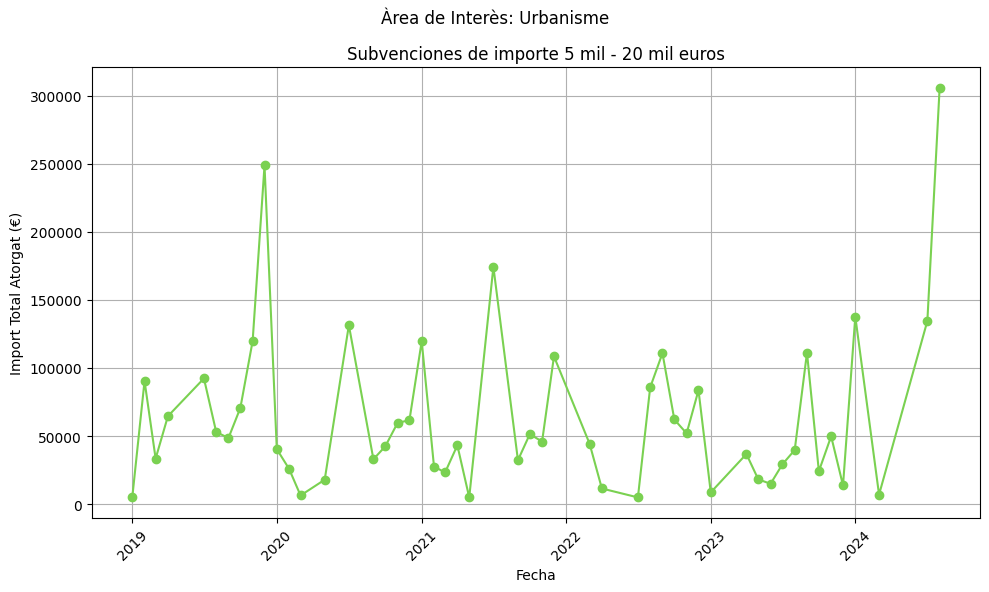

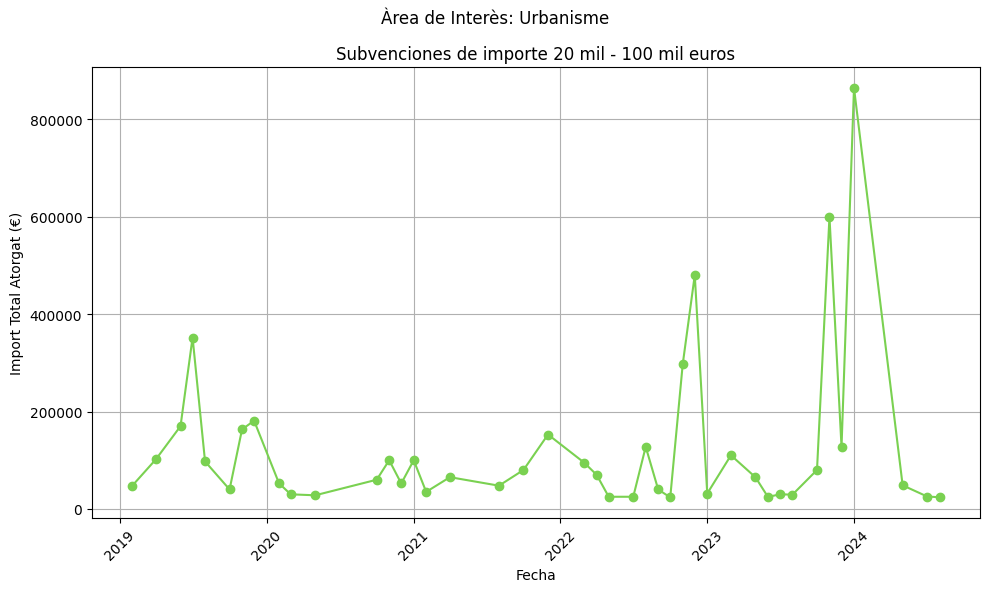

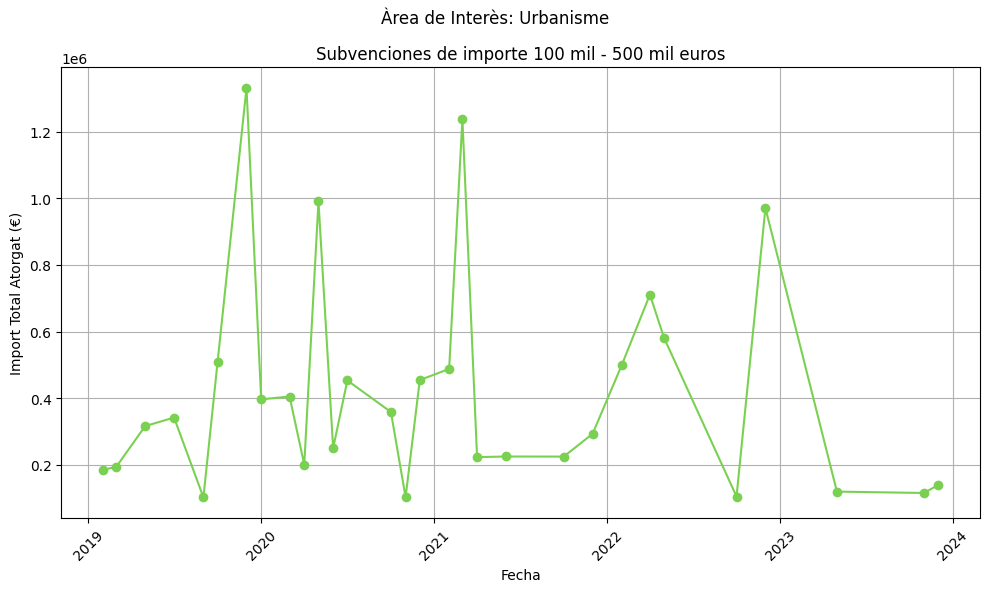

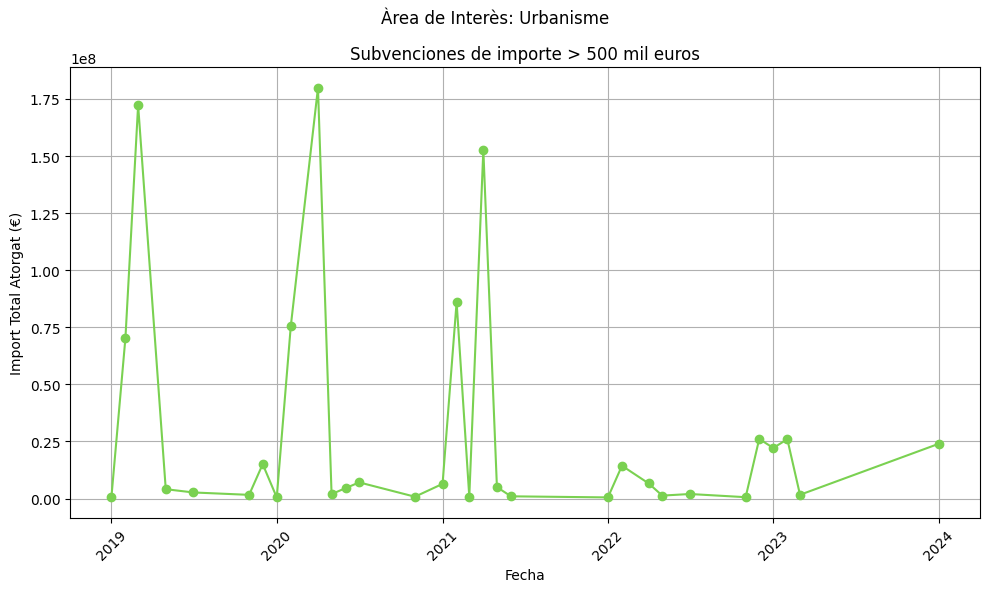

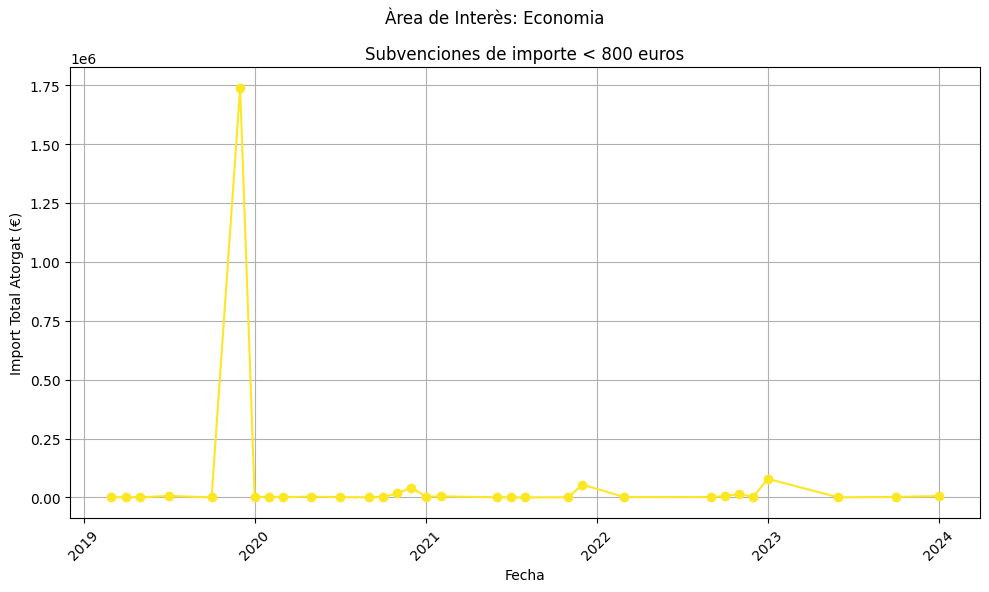

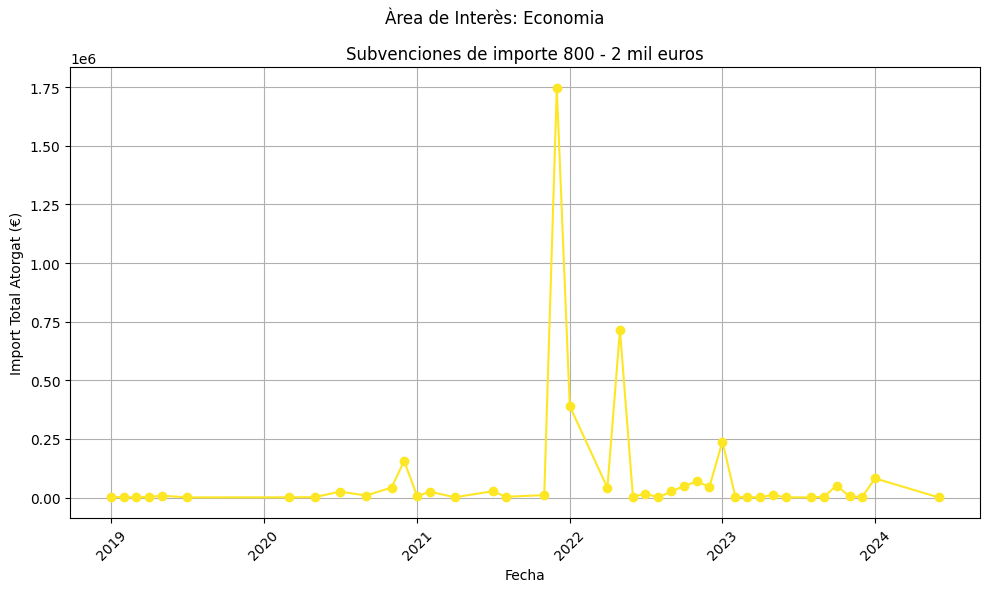

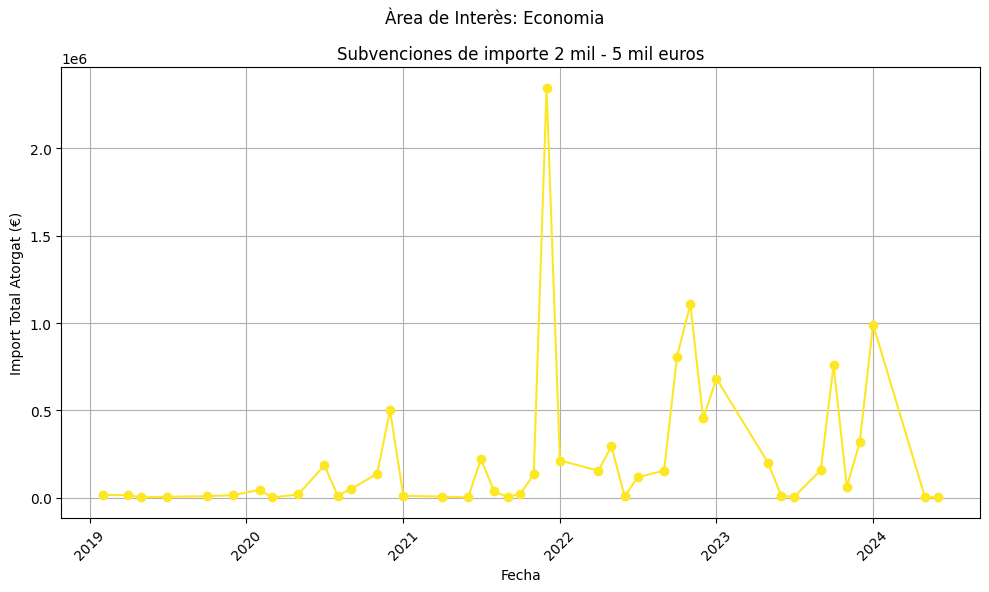

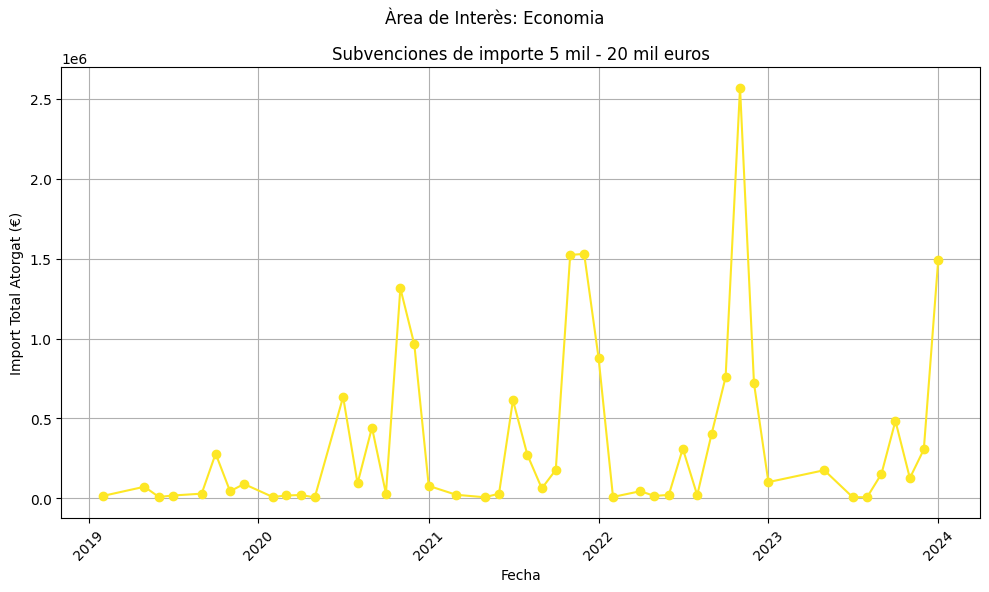

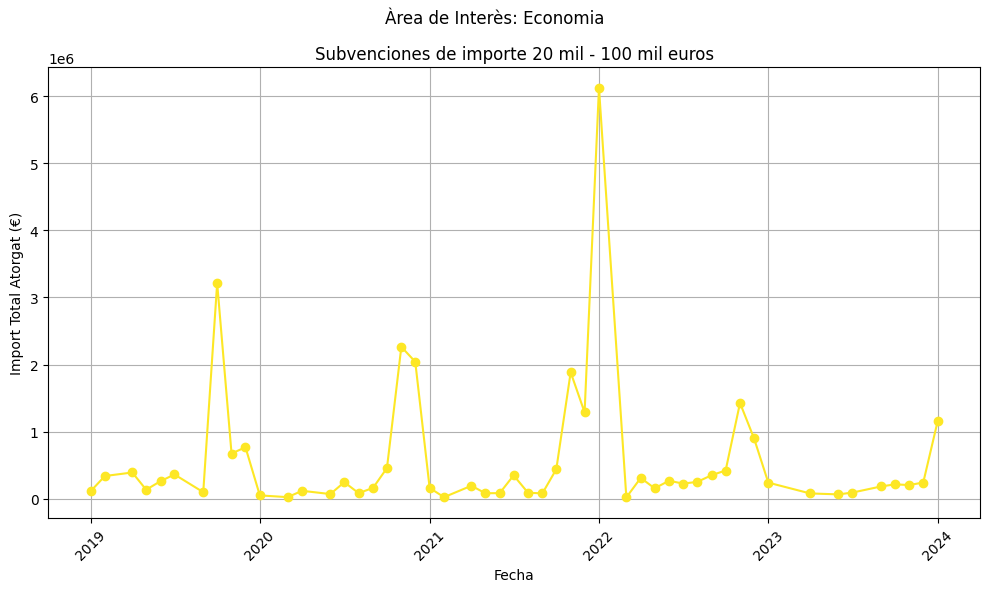

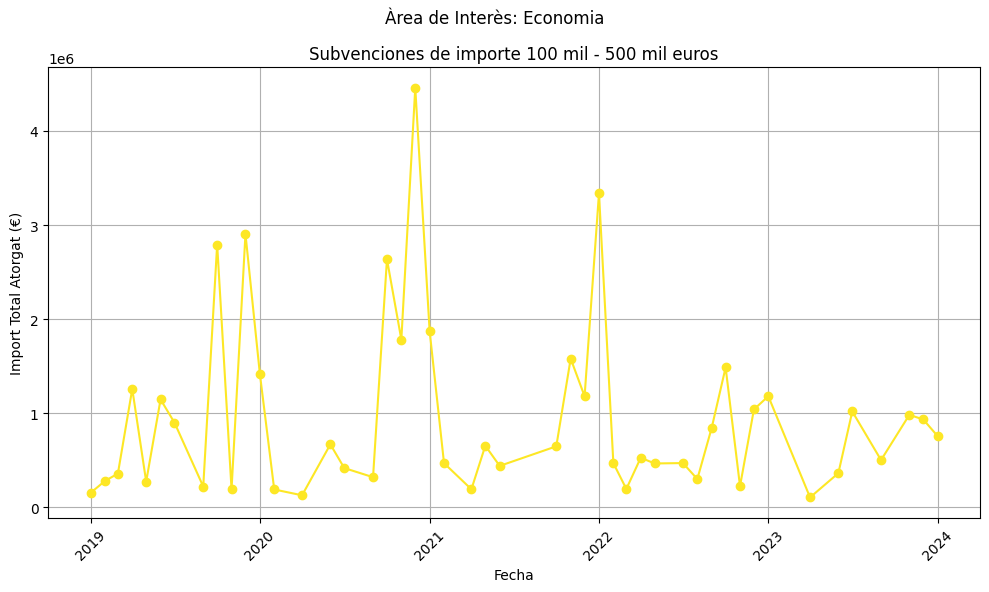

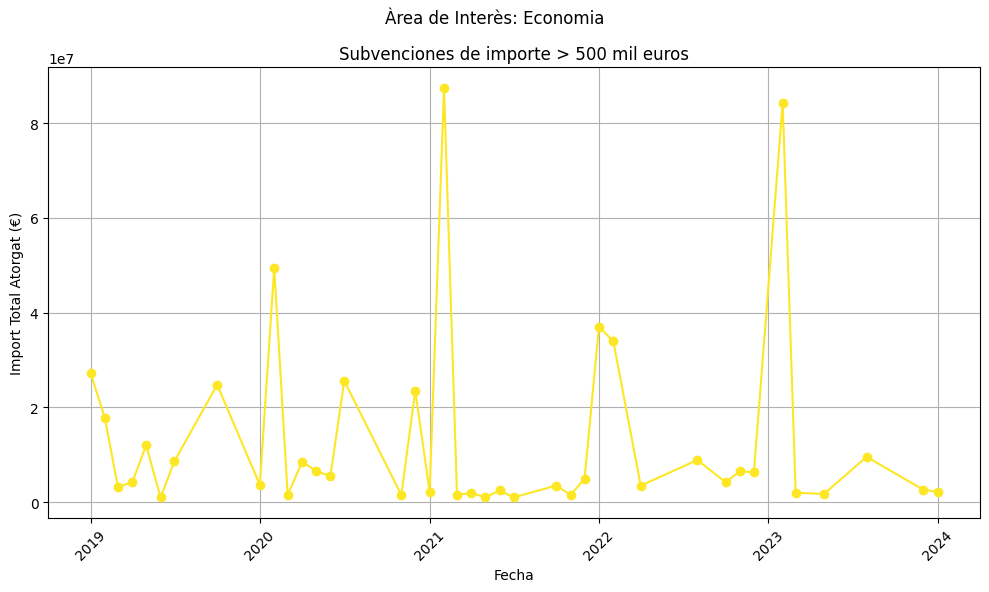

In [2247]:
# Función para visualizar la tendencia de 'Import_Total_Atorgat' para cada 'Unique_ID'
def plot_time_series(df, unique_id):
    # Filtra el dataframe para el Unique_ID específico
    df_filtered = df[df['Unique_ID'] == unique_id]

    # Comprueba si hay datos para el Unique_ID
    if df_filtered.empty:
        print(f"No se encontraron datos para Unique_ID: {unique_id}")
        return

    # Ordena el dataframe por año y mes para asegurar que la serie temporal esté ordenada
    df_filtered = df_filtered.sort_values(['Any_Atorgament', 'Mes_Atorgament'])

    # Crea un índice temporal combinando año y mes
    df_filtered['Date'] = pd.to_datetime(df_filtered['Any_Atorgament'].astype(str) + '-' + df_filtered['Mes_Atorgament'].astype(str))

    # Extraer información de Àrea_de_Interès y Bucket_Import_Atorgat
    area_interes = df_filtered['Àrea_de_Interès'].iloc[0]  # Suponiendo que es el mismo para todas las filas filtradas
    bucket_import = df_filtered['Bucket_Import_Atorgat'].iloc[0]  # Lo mismo aquí

    # Obtener el color correspondiente al área de interés usando la colormap 'viridis'
    unique_areas = df['Àrea_de_Interès'].unique()
    colormap = plt.get_cmap('viridis', len(unique_areas))  # Crea una colormap con la cantidad de áreas únicas
    area_index = np.where(unique_areas == area_interes)[0][0]  # Obtiene el índice del área de interés
    color = colormap(area_index)  # Obtiene el color correspondiente

    # Traza el gráfico
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtered['Date'], df_filtered['Import_Total_Atorgat'], marker='o', color=color)
    plt.title(f"Subvenciones de importe {bucket_import} euros")
    plt.suptitle(f"Àrea de Interès: {area_interes}")

    plt.xlabel("Fecha")
    plt.ylabel("Import Total Atorgat (€)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Llamar a la función para cada Unique_ID
for unique_id in df_month['Unique_ID'].unique():
    plot_time_series(df_month, unique_id)


**Observaciones**
Las series temporales en su mayoria no presentan tendencia y presentan estacionalidad. Después de una trasformación logaritmica para regularizar la varianza serán unas buenas candidatas para utilizar modelos tipo ARIMA ya que su comportamiento será estacionario.

In [2248]:
df_month

Unique_ID  Any_Atorgament  Mes_Atorgament  Trimestre_Atorgament  \
0     Area_01_Import_01            2019               2                     1   
1     Area_01_Import_01            2019               8                     3   
2     Area_01_Import_01            2019              10                     4   
3     Area_01_Import_01            2019              11                     4   
4     Area_01_Import_01            2019              12                     4   
...                 ...             ...             ...                   ...   
1851  Area_06_Import_07            2023               3                     1   
1852  Area_06_Import_07            2023               5                     2   
1853  Area_06_Import_07            2023               8                     3   
1854  Area_06_Import_07            2023              12                     4   
1855  Area_06_Import_07            2024               1                     1   

             Àrea_de_Interès Bucket_Import_Atorgat ID_Àrea_de_Interès  \
0     Altres Àrees d'Interès                 < 800            Area_01   
1     Altres Àrees d'Interès                 < 800            Area_01   
2     Altres Àrees d'Interès                 < 800            Area_01   
3     Altres Àrees d'Interès                 < 800            Area_01   
4     Altres Àrees d'Interès                 < 800            Area_01   
...                      ...                   ...                ...   
1851                Economia             > 500 mil            Area_06   
1852                Economia             > 500 mil            Area_06   
1853                Economia             > 500 mil            Area_06   
1854                Economia             > 500 mil            Area_06   
1855                Economia             > 500 mil            Area_06   

     ID_Bucket_Import_Atorgat  Import_Total_Projectes  \
0                   Import_01                 1040.00   
1                   Import_01                 1650.00   
2                   Import_01                 2800.00   
3                   Import_01                10857.80   
4                   Import_01                 3150.00   
...                       ...                     ...   
1851                Import_07              2000000.00   
1852                Import_07              1733889.00   
1853                Import_07              9562500.00   
1854                Import_07              2683906.07   
1855                Import_07              2175884.43   

      Import_Total_Sollicitat  Import_Total_Atorgat  
0                     1040.00               1040.00  
1                      825.00                825.00  
2                     1250.00               1250.00  
3                     7568.90               6848.90  
4                     3150.00               3150.00  
...                       ...                   ...  
1851               2000000.00            2000000.00  
1852               1733889.00            1733889.00  
1853               9562500.00            9562500.00  
1854               2627406.07            2627406.07  
1855               2175884.43            2175884.43  

[1856 rows x 11 columns]

# FORECASTING

## Creación dataset completo para train, test y predicción

El objetivo es hacer las predicciones del importe total de las subvenciones que serán ortogadas en Septiembre 2024 por cada Area de Intéres y por cada range de importe de las subvenciones. (Bucket_Import_Atorgat).

In [2249]:
df_month

Unique_ID  Any_Atorgament  Mes_Atorgament  Trimestre_Atorgament  \
0     Area_01_Import_01            2019               2                     1   
1     Area_01_Import_01            2019               8                     3   
2     Area_01_Import_01            2019              10                     4   
3     Area_01_Import_01            2019              11                     4   
4     Area_01_Import_01            2019              12                     4   
...                 ...             ...             ...                   ...   
1851  Area_06_Import_07            2023               3                     1   
1852  Area_06_Import_07            2023               5                     2   
1853  Area_06_Import_07            2023               8                     3   
1854  Area_06_Import_07            2023              12                     4   
1855  Area_06_Import_07            2024               1                     1   

             Àrea_de_Interès Bucket_Import_Atorgat ID_Àrea_de_Interès  \
0     Altres Àrees d'Interès                 < 800            Area_01   
1     Altres Àrees d'Interès                 < 800            Area_01   
2     Altres Àrees d'Interès                 < 800            Area_01   
3     Altres Àrees d'Interès                 < 800            Area_01   
4     Altres Àrees d'Interès                 < 800            Area_01   
...                      ...                   ...                ...   
1851                Economia             > 500 mil            Area_06   
1852                Economia             > 500 mil            Area_06   
1853                Economia             > 500 mil            Area_06   
1854                Economia             > 500 mil            Area_06   
1855                Economia             > 500 mil            Area_06   

     ID_Bucket_Import_Atorgat  Import_Total_Projectes  \
0                   Import_01                 1040.00   
1                   Import_01                 1650.00   
2                   Import_01                 2800.00   
3                   Import_01                10857.80   
4                   Import_01                 3150.00   
...                       ...                     ...   
1851                Import_07              2000000.00   
1852                Import_07              1733889.00   
1853                Import_07              9562500.00   
1854                Import_07              2683906.07   
1855                Import_07              2175884.43   

      Import_Total_Sollicitat  Import_Total_Atorgat  
0                     1040.00               1040.00  
1                      825.00                825.00  
2                     1250.00               1250.00  
3                     7568.90               6848.90  
4                     3150.00               3150.00  
...                       ...                   ...  
1851               2000000.00            2000000.00  
1852               1733889.00            1733889.00  
1853               9562500.00            9562500.00  
1854               2627406.07            2627406.07  
1855               2175884.43            2175884.43  

[1856 rows x 11 columns]

Necesito crear un dataset con todos los meses de cada año hasta septiembre 2024. Actualmente en df_month por cada serie temporal solo hay los meses donde se ha ortogado dinero. Crearé un nuevo dataframe llamado df_full.

In [2250]:
# Veo cual es la data más reciente disponible en el dataset de partida
df['Data_Atorgament'].max()

Timestamp('2024-08-29 00:00:00')

In [2251]:
df_month.groupby(['Any_Atorgament'])['Mes_Atorgament'].agg(['min','max'])

min  max
Any_Atorgament          
2019              1   12
2020              1   12
2021              1   12
2022              1   12
2023              1   12
2024              1    8

In [2252]:
# Instancio el nuevo dataframe que va a contener todos los meses desde 2019-01-01 hasta 2024-09-30
df_full = pd.DataFrame(columns=['Data','Unique_ID'])

for i, unique_id in enumerate(df_month['Unique_ID'].unique()):
  df_temp = pd.DataFrame(columns=['Data'])
  df_temp['Data'] = pd.date_range('2019-01-01','2024-09-30',freq='ME')
  df_temp['Unique_ID'] = unique_id
  df_full = pd.concat([df_full,df_temp])


In [2253]:
df_full

Data          Unique_ID
0  2019-01-31  Area_01_Import_01
1  2019-02-28  Area_01_Import_01
2  2019-03-31  Area_01_Import_01
3  2019-04-30  Area_01_Import_01
4  2019-05-31  Area_01_Import_01
..        ...                ...
64 2024-05-31  Area_06_Import_07
65 2024-06-30  Area_06_Import_07
66 2024-07-31  Area_06_Import_07
67 2024-08-31  Area_06_Import_07
68 2024-09-30  Area_06_Import_07

[2898 rows x 2 columns]

In [2254]:
# añado features de tiempo
df_full['Any'] = df_full['Data'].dt.year # año
df_full['Mes'] = df_full['Data'].dt.month # Mes
df_full['Trimestre'] = df_full['Data'].dt.quarter # trimestre

In [2255]:
df_full

Data          Unique_ID   Any  Mes  Trimestre
0  2019-01-31  Area_01_Import_01  2019    1          1
1  2019-02-28  Area_01_Import_01  2019    2          1
2  2019-03-31  Area_01_Import_01  2019    3          1
3  2019-04-30  Area_01_Import_01  2019    4          2
4  2019-05-31  Area_01_Import_01  2019    5          2
..        ...                ...   ...  ...        ...
64 2024-05-31  Area_06_Import_07  2024    5          2
65 2024-06-30  Area_06_Import_07  2024    6          2
66 2024-07-31  Area_06_Import_07  2024    7          3
67 2024-08-31  Area_06_Import_07  2024    8          3
68 2024-09-30  Area_06_Import_07  2024    9          3

[2898 rows x 5 columns]

In [2256]:
df_month.head(2)

Unique_ID  Any_Atorgament  Mes_Atorgament  Trimestre_Atorgament  \
0  Area_01_Import_01            2019               2                     1   
1  Area_01_Import_01            2019               8                     3   

          Àrea_de_Interès Bucket_Import_Atorgat ID_Àrea_de_Interès  \
0  Altres Àrees d'Interès                 < 800            Area_01   
1  Altres Àrees d'Interès                 < 800            Area_01   

  ID_Bucket_Import_Atorgat  Import_Total_Projectes  Import_Total_Sollicitat  \
0                Import_01                  1040.0                   1040.0   
1                Import_01                  1650.0                    825.0   

   Import_Total_Atorgat  
0                1040.0  
1                 825.0

In [2257]:
# Merge con df_month
df_full = df_full.merge(

    df_month,
    how='left',
    left_on=['Unique_ID','Any','Mes','Trimestre'],
    right_on=['Unique_ID','Any_Atorgament','Mes_Atorgament','Trimestre_Atorgament']

).sort_values(by=['Unique_ID','Data'])

In [2258]:
df_full

Data          Unique_ID   Any  Mes  Trimestre  Any_Atorgament  \
0    2019-01-31  Area_01_Import_01  2019    1          1             NaN   
1    2019-02-28  Area_01_Import_01  2019    2          1          2019.0   
2    2019-03-31  Area_01_Import_01  2019    3          1             NaN   
3    2019-04-30  Area_01_Import_01  2019    4          2             NaN   
4    2019-05-31  Area_01_Import_01  2019    5          2             NaN   
...         ...                ...   ...  ...        ...             ...   
2893 2024-05-31  Area_06_Import_07  2024    5          2             NaN   
2894 2024-06-30  Area_06_Import_07  2024    6          2             NaN   
2895 2024-07-31  Area_06_Import_07  2024    7          3             NaN   
2896 2024-08-31  Area_06_Import_07  2024    8          3             NaN   
2897 2024-09-30  Area_06_Import_07  2024    9          3             NaN   

      Mes_Atorgament  Trimestre_Atorgament         Àrea_de_Interès  \
0                NaN                   NaN                     NaN   
1                2.0                   1.0  Altres Àrees d'Interès   
2                NaN                   NaN                     NaN   
3                NaN                   NaN                     NaN   
4                NaN                   NaN                     NaN   
...              ...                   ...                     ...   
2893             NaN                   NaN                     NaN   
2894             NaN                   NaN                     NaN   
2895             NaN                   NaN                     NaN   
2896             NaN                   NaN                     NaN   
2897             NaN                   NaN                     NaN   

     Bucket_Import_Atorgat ID_Àrea_de_Interès ID_Bucket_Import_Atorgat  \
0                      NaN                NaN                      NaN   
1                    < 800            Area_01                Import_01   
2                      NaN                NaN                      NaN   
3                      NaN                NaN                      NaN   
4                      NaN                NaN                      NaN   
...                    ...                ...                      ...   
2893                   NaN                NaN                      NaN   
2894                   NaN                NaN                      NaN   
2895                   NaN                NaN                      NaN   
2896                   NaN                NaN                      NaN   
2897                   NaN                NaN                      NaN   

      Import_Total_Projectes  Import_Total_Sollicitat  Import_Total_Atorgat  
0                        NaN                      NaN                   NaN  
1                     1040.0                   1040.0                1040.0  
2                        NaN                      NaN                   NaN  
3                        NaN                      NaN                   NaN  
4                        NaN                      NaN                   NaN  
...                      ...                      ...                   ...  
2893                     NaN                      NaN                   NaN  
2894                     NaN                      NaN                   NaN  
2895                     NaN                      NaN                   NaN  
2896                     NaN                      NaN                   NaN  
2897                     NaN                      NaN                   NaN  

[2898 rows x 15 columns]

Limpio los nulos

In [2259]:
df_full = df_full.drop(['Any_Atorgament','Mes_Atorgament','Trimestre_Atorgament'],axis=1)

In [2260]:
for col in ["Àrea_de_Interès","Bucket_Import_Atorgat","ID_Àrea_de_Interès","ID_Bucket_Import_Atorgat"]:
  df_full[col] = df_full.groupby(['Unique_ID'])[col].bfill().ffill()

In [2261]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898 entries, 0 to 2897
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data                      2898 non-null   datetime64[ns]
 1   Unique_ID                 2898 non-null   object        
 2   Any                       2898 non-null   int32         
 3   Mes                       2898 non-null   int32         
 4   Trimestre                 2898 non-null   int32         
 5   Àrea_de_Interès           2898 non-null   object        
 6   Bucket_Import_Atorgat     2898 non-null   category      
 7   ID_Àrea_de_Interès        2898 non-null   object        
 8   ID_Bucket_Import_Atorgat  2898 non-null   category      
 9   Import_Total_Projectes    1856 non-null   float64       
 10  Import_Total_Sollicitat   1856 non-null   float64       
 11  Import_Total_Atorgat      1856 non-null   float64       
dtypes: category(2), date

Los importes nulos corresponden a meses en los cuales no fueron ortogadas subvenciones con ese Unique_ID, así que los nulos en realidad son ceros.

In [2262]:
for col in ['Import_Total_Projectes','Import_Total_Sollicitat','Import_Total_Atorgat']:
  df_full[col] = df_full[col].fillna(0)

In [2263]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898 entries, 0 to 2897
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data                      2898 non-null   datetime64[ns]
 1   Unique_ID                 2898 non-null   object        
 2   Any                       2898 non-null   int32         
 3   Mes                       2898 non-null   int32         
 4   Trimestre                 2898 non-null   int32         
 5   Àrea_de_Interès           2898 non-null   object        
 6   Bucket_Import_Atorgat     2898 non-null   category      
 7   ID_Àrea_de_Interès        2898 non-null   object        
 8   ID_Bucket_Import_Atorgat  2898 non-null   category      
 9   Import_Total_Projectes    2898 non-null   float64       
 10  Import_Total_Sollicitat   2898 non-null   float64       
 11  Import_Total_Atorgat      2898 non-null   float64       
dtypes: category(2), date

In [2264]:
df_full

Data          Unique_ID   Any  Mes  Trimestre  \
0    2019-01-31  Area_01_Import_01  2019    1          1   
1    2019-02-28  Area_01_Import_01  2019    2          1   
2    2019-03-31  Area_01_Import_01  2019    3          1   
3    2019-04-30  Area_01_Import_01  2019    4          2   
4    2019-05-31  Area_01_Import_01  2019    5          2   
...         ...                ...   ...  ...        ...   
2893 2024-05-31  Area_06_Import_07  2024    5          2   
2894 2024-06-30  Area_06_Import_07  2024    6          2   
2895 2024-07-31  Area_06_Import_07  2024    7          3   
2896 2024-08-31  Area_06_Import_07  2024    8          3   
2897 2024-09-30  Area_06_Import_07  2024    9          3   

             Àrea_de_Interès Bucket_Import_Atorgat ID_Àrea_de_Interès  \
0     Altres Àrees d'Interès                 < 800            Area_01   
1     Altres Àrees d'Interès                 < 800            Area_01   
2     Altres Àrees d'Interès                 < 800            Area_01   
3     Altres Àrees d'Interès                 < 800            Area_01   
4     Altres Àrees d'Interès                 < 800            Area_01   
...                      ...                   ...                ...   
2893                Economia             > 500 mil            Area_06   
2894                Economia             > 500 mil            Area_06   
2895                Economia             > 500 mil            Area_06   
2896                Economia             > 500 mil            Area_06   
2897                Economia             > 500 mil            Area_06   

     ID_Bucket_Import_Atorgat  Import_Total_Projectes  \
0                   Import_01                     0.0   
1                   Import_01                  1040.0   
2                   Import_01                     0.0   
3                   Import_01                     0.0   
4                   Import_01                     0.0   
...                       ...                     ...   
2893                Import_07                     0.0   
2894                Import_07                     0.0   
2895                Import_07                     0.0   
2896                Import_07                     0.0   
2897                Import_07                     0.0   

      Import_Total_Sollicitat  Import_Total_Atorgat  
0                         0.0                   0.0  
1                      1040.0                1040.0  
2                         0.0                   0.0  
3                         0.0                   0.0  
4                         0.0                   0.0  
...                       ...                   ...  
2893                      0.0                   0.0  
2894                      0.0                   0.0  
2895                      0.0                   0.0  
2896                      0.0                   0.0  
2897                      0.0                   0.0  

[2898 rows x 12 columns]

## Model selction

Compararé diferentes modelos: Usaré como datos de entrenamiento todos, los registros hasta Julio 2024, y usaré el mes de Agosto 2024 como dataset de test para evaluar el rendimiento de los modelos y decidir cual utilizar.

### ARIMA

#### Split train test

In [2265]:
df_train_arima = df_full[df_full['Data'] <= '2024-07-31']
df_train_arima

Data          Unique_ID   Any  Mes  Trimestre  \
0    2019-01-31  Area_01_Import_01  2019    1          1   
1    2019-02-28  Area_01_Import_01  2019    2          1   
2    2019-03-31  Area_01_Import_01  2019    3          1   
3    2019-04-30  Area_01_Import_01  2019    4          2   
4    2019-05-31  Area_01_Import_01  2019    5          2   
...         ...                ...   ...  ...        ...   
2891 2024-03-31  Area_06_Import_07  2024    3          1   
2892 2024-04-30  Area_06_Import_07  2024    4          2   
2893 2024-05-31  Area_06_Import_07  2024    5          2   
2894 2024-06-30  Area_06_Import_07  2024    6          2   
2895 2024-07-31  Area_06_Import_07  2024    7          3   

             Àrea_de_Interès Bucket_Import_Atorgat ID_Àrea_de_Interès  \
0     Altres Àrees d'Interès                 < 800            Area_01   
1     Altres Àrees d'Interès                 < 800            Area_01   
2     Altres Àrees d'Interès                 < 800            Area_01   
3     Altres Àrees d'Interès                 < 800            Area_01   
4     Altres Àrees d'Interès                 < 800            Area_01   
...                      ...                   ...                ...   
2891                Economia             > 500 mil            Area_06   
2892                Economia             > 500 mil            Area_06   
2893                Economia             > 500 mil            Area_06   
2894                Economia             > 500 mil            Area_06   
2895                Economia             > 500 mil            Area_06   

     ID_Bucket_Import_Atorgat  Import_Total_Projectes  \
0                   Import_01                     0.0   
1                   Import_01                  1040.0   
2                   Import_01                     0.0   
3                   Import_01                     0.0   
4                   Import_01                     0.0   
...                       ...                     ...   
2891                Import_07                     0.0   
2892                Import_07                     0.0   
2893                Import_07                     0.0   
2894                Import_07                     0.0   
2895                Import_07                     0.0   

      Import_Total_Sollicitat  Import_Total_Atorgat  
0                         0.0                   0.0  
1                      1040.0                1040.0  
2                         0.0                   0.0  
3                         0.0                   0.0  
4                         0.0                   0.0  
...                       ...                   ...  
2891                      0.0                   0.0  
2892                      0.0                   0.0  
2893                      0.0                   0.0  
2894                      0.0                   0.0  
2895                      0.0                   0.0  

[2814 rows x 12 columns]

In [2266]:
df_train_arima.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2814 entries, 0 to 2895
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data                      2814 non-null   datetime64[ns]
 1   Unique_ID                 2814 non-null   object        
 2   Any                       2814 non-null   int32         
 3   Mes                       2814 non-null   int32         
 4   Trimestre                 2814 non-null   int32         
 5   Àrea_de_Interès           2814 non-null   object        
 6   Bucket_Import_Atorgat     2814 non-null   category      
 7   ID_Àrea_de_Interès        2814 non-null   object        
 8   ID_Bucket_Import_Atorgat  2814 non-null   category      
 9   Import_Total_Projectes    2814 non-null   float64       
 10  Import_Total_Sollicitat   2814 non-null   float64       
 11  Import_Total_Atorgat      2814 non-null   float64       
dtypes: category(2), datetime6

In [2267]:
df_test_arima = df_full[
    (df_full['Data']>='2024-08-01') &
    (df_full['Data']<='2024-08-31')
]

df_test_arima

Data          Unique_ID   Any  Mes  Trimestre  \
67   2024-08-31  Area_01_Import_01  2024    8          3   
136  2024-08-31  Area_01_Import_02  2024    8          3   
205  2024-08-31  Area_01_Import_03  2024    8          3   
274  2024-08-31  Area_01_Import_04  2024    8          3   
343  2024-08-31  Area_01_Import_05  2024    8          3   
412  2024-08-31  Area_01_Import_06  2024    8          3   
481  2024-08-31  Area_01_Import_07  2024    8          3   
550  2024-08-31  Area_02_Import_01  2024    8          3   
619  2024-08-31  Area_02_Import_02  2024    8          3   
688  2024-08-31  Area_02_Import_03  2024    8          3   
757  2024-08-31  Area_02_Import_04  2024    8          3   
826  2024-08-31  Area_02_Import_05  2024    8          3   
895  2024-08-31  Area_02_Import_06  2024    8          3   
964  2024-08-31  Area_02_Import_07  2024    8          3   
1033 2024-08-31  Area_03_Import_01  2024    8          3   
1102 2024-08-31  Area_03_Import_02  2024    8          3   
1171 2024-08-31  Area_03_Import_03  2024    8          3   
1240 2024-08-31  Area_03_Import_04  2024    8          3   
1309 2024-08-31  Area_03_Import_05  2024    8          3   
1378 2024-08-31  Area_03_Import_06  2024    8          3   
1447 2024-08-31  Area_03_Import_07  2024    8          3   
1516 2024-08-31  Area_04_Import_01  2024    8          3   
1585 2024-08-31  Area_04_Import_02  2024    8          3   
1654 2024-08-31  Area_04_Import_03  2024    8          3   
1723 2024-08-31  Area_04_Import_04  2024    8          3   
1792 2024-08-31  Area_04_Import_05  2024    8          3   
1861 2024-08-31  Area_04_Import_06  2024    8          3   
1930 2024-08-31  Area_04_Import_07  2024    8          3   
1999 2024-08-31  Area_05_Import_01  2024    8          3   
2068 2024-08-31  Area_05_Import_02  2024    8          3   
2137 2024-08-31  Area_05_Import_03  2024    8          3   
2206 2024-08-31  Area_05_Import_04  2024    8          3   
2275 2024-08-31  Area_05_Import_05  2024    8          3   
2344 2024-08-31  Area_05_Import_06  2024    8          3   
2413 2024-08-31  Area_05_Import_07  2024    8          3   
2482 2024-08-31  Area_06_Import_01  2024    8          3   
2551 2024-08-31  Area_06_Import_02  2024    8          3   
2620 2024-08-31  Area_06_Import_03  2024    8          3   
2689 2024-08-31  Area_06_Import_04  2024    8          3   
2758 2024-08-31  Area_06_Import_05  2024    8          3   
2827 2024-08-31  Area_06_Import_06  2024    8          3   
2896 2024-08-31  Area_06_Import_07  2024    8          3   

                                Àrea_de_Interès Bucket_Import_Atorgat  \
67                       Altres Àrees d'Interès                 < 800   
136                      Altres Àrees d'Interès           800 - 2 mil   
205                      Altres Àrees d'Interès         2 mil - 5 mil   
274                      Altres Àrees d'Interès        5 mil - 20 mil   
343                      Altres Àrees d'Interès      20 mil - 100 mil   
412                      Altres Àrees d'Interès     100 mil - 500 mil   
481                      Altres Àrees d'Interès             > 500 mil   
550   Drets socials i persones amb discapacitat                 < 800   
619   Drets socials i persones amb discapacitat           800 - 2 mil   
688   Drets socials i persones amb discapacitat         2 mil - 5 mil   
757   Drets socials i persones amb discapacitat        5 mil - 20 mil   
826   Drets socials i persones amb discapacitat      20 mil - 100 mil   
895   Drets socials i persones amb discapacitat     100 mil - 500 mil   
964   Drets socials i persones amb discapacitat             > 500 mil   
1033                                 Districtes                 < 800   
1102                                 Districtes           800 - 2 mil   
1171                                 Districtes         2 mil - 5 mil   
1240                                 Districtes        5 mil - 20 mil   
1309                                 Distri

In [2268]:
df_test_arima.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 67 to 2896
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data                      42 non-null     datetime64[ns]
 1   Unique_ID                 42 non-null     object        
 2   Any                       42 non-null     int32         
 3   Mes                       42 non-null     int32         
 4   Trimestre                 42 non-null     int32         
 5   Àrea_de_Interès           42 non-null     object        
 6   Bucket_Import_Atorgat     42 non-null     category      
 7   ID_Àrea_de_Interès        42 non-null     object        
 8   ID_Bucket_Import_Atorgat  42 non-null     category      
 9   Import_Total_Projectes    42 non-null     float64       
 10  Import_Total_Sollicitat   42 non-null     float64       
 11  Import_Total_Atorgat      42 non-null     float64       
dtypes: category(2), datetime64

#### arima_pipeline

step de preprocessing

In [2269]:
# Función de preprocesamiento para ARIMA
def arima_preprocessing(X):
    # Aplicamos la transformación logarítmica
    X['Log_Import_Total_Atorgat'] = np.log1p(X['Import_Total_Atorgat'])

    # Devolvemos una Serie con la fecha como índice y Log_Import_Total_Atorgat como valores
    return pd.Series(data=X['Log_Import_Total_Atorgat'].values, index=X['Data'],name='Log_Import_Total_Atorgat')

# Creamos un FunctionTransformer
arima_preprocessing_transformer = FunctionTransformer(arima_preprocessing, validate=False)


step del modelo

In [2270]:
from sklearn.base import BaseEstimator, RegressorMixin
import pmdarima as pm

# Wrapper para integrar ARIMA en una pipeline de sklearn
class ARIMAWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, seasonal=False):
        self.seasonal = seasonal
        self.model_arima = None

    def fit(self, X, y=None):
        # Fit
        self.model_arima = pm.auto_arima(X, seasonal=self.seasonal, stepwise=True, suppress_warnings=True)
        return self

    def predict(self, X):
        # Predict
        return self.model_arima.predict(n_periods=len(X))



In [2271]:
# Creamos la pipeline combinando el preprocesamiento y ARIMA
arima_pipeline = Pipeline([
    ('preprocessing', arima_preprocessing_transformer),  # Preprocesamiento logarítmico
    ('arima', ARIMAWrapper(seasonal=False))   # Modelo ARIMA
    ])

#### Evaluation

In [2272]:
# Función para calcular RMSE y MAPE, excluyendo los valores reales igual a cero para el MAPE
def evaluate_arima_model(df_train, df_test):
    results = []

    # Iteramos sobre cada Unique_ID
    for unique_id in df_train['Unique_ID'].unique():
        # Filtramos el train y test para cada Unique_ID
        df_train_id = df_train[df_train['Unique_ID'] == unique_id]
        df_test_id = df_test[df_test['Unique_ID'] == unique_id]

        # Entrenamos la pipeline con los datos de entrenamiento
        arima_pipeline.fit(df_train_id)

        # Predicciones para df_test_id
        predictions = arima_pipeline.predict(df_test_id)

        # Devolvemos los valores a la escala original
        predictions_original_scale = np.expm1(predictions)

        # Cálculo del RMSE
        rmse = mean_squared_error(df_test_id['Import_Total_Atorgat'], predictions_original_scale, squared=False)

        # Cálculo del MAPE (excluimos los valores reales igual a cero)
        actual_values = df_test_id['Import_Total_Atorgat'].values
        non_zero_mask = actual_values != 0  # Creamos una máscara para los valores reales distintos de 0

        if non_zero_mask.any():
            mape = mean_absolute_percentage_error(actual_values[non_zero_mask], predictions_original_scale[non_zero_mask])
        else:
            mape = np.nan  # Si todos los valores son cero, no se puede calcular el MAPE

        # Guardamos los resultados
        results.append({
            'Unique_ID': unique_id,
            'RMSE_ARIMA': rmse,
            'MAPE_ARIMA': mape
        })

    # Convertimos los resultados en un DataFrame
    results_df = pd.DataFrame(results)

    # Calculamos el RMSE y MAPE promedio, excluyendo los NaN para el MAPE
    mean_rmse = results_df['RMSE_ARIMA'].mean()
    mean_mape = results_df['MAPE_ARIMA'].mean(skipna=True)  # Excluimos los NaN al calcular la media del MAPE

    print(f"RMSE medio: {mean_rmse:.2f}")
    print(f"MAPE medio: {mean_mape:.2f}%")

    return results_df

In [2273]:
# Ejecutamos la evaluación del modelo ARIMA
arima_results = evaluate_arima_model(df_train_arima, df_test_arima)

RMSE medio: 651207.72
MAPE medio: 7.11%


In [2274]:
arima_results

Unique_ID    RMSE_ARIMA  MAPE_ARIMA
0   Area_01_Import_01  3.474979e+03    0.992851
1   Area_01_Import_02  3.766701e+04    0.992543
2   Area_01_Import_03  3.147392e+05    0.982632
3   Area_01_Import_04  1.538900e+06    0.999903
4   Area_01_Import_05  3.624247e+05    0.999241
5   Area_01_Import_06  1.601614e+04         NaN
6   Area_01_Import_07  5.917744e+01         NaN
7   Area_02_Import_01  1.664363e+03    0.993650
8   Area_02_Import_02  1.862072e+05    0.999824
9   Area_02_Import_03  8.852362e+05    0.999956
10  Area_02_Import_04  2.198957e+06    0.999971
11  Area_02_Import_05  1.444368e+06    2.245248
12  Area_02_Import_06  2.313985e+04         NaN
13  Area_02_Import_07  1.034763e+02         NaN
14  Area_03_Import_01  5.128355e+06   88.710525
15  Area_03_Import_02  6.820403e+05    2.033665
16  Area_03_Import_03  9.669951e+05    3.865661
17  Area_03_Import_04  1.239621e+07   46.619818
18  Area_03_Import_05  1.554224e+04         NaN
19  Area_03_Import_06  6.901158e-01         NaN
20  Area_03_Import_07  9.665283e+00         NaN
21  Area_04_Import_01  2.635450e+01    0.052709
22  Area_04_Import_02  6.960679e+03    0.263662
23  Area_04_Import_03  9.291147e+04    1.803231
24  Area_04_Import_04  2.261563e+05    4.038506
25  Area_04_Import_05  1.980188e+05         NaN
26  Area_04_Import_06  1.701358e+00         NaN
27  Area_04_Import_07  2.114942e+01         NaN
28  Area_05_Import_01  8.952958e+02    0.973148
29  Area_05_Import_02  1.804261e+04    0.999590
30  Area_05_Import_03  2.774076e+05    0.999419
31  Area_05_Import_04  3.029342e+05    0.991078
32  Area_05_Import_05  2.302957e+04    0.959565
33  Area_05_Import_06  8.726977e+00         NaN
34  Area_05_Import_07  1.188412e+01         NaN
35  Area_06_Import_01  1.879827e+01         NaN
36  Area_06_Import_02  5.899961e+01         NaN
37  Area_06_Import_03  1.046444e+03         NaN
38  Area_06_Import_04  6.152854e+01         NaN
39  Area_06_Import_05  8.949303e+02         NaN
40  Area_06_Import_06  5.517917e+01         NaN
41  Area_06_Import_07  5.115208e+01         NaN

### Multivariant approach: Xgboost and Catboost

In [2275]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898 entries, 0 to 2897
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data                      2898 non-null   datetime64[ns]
 1   Unique_ID                 2898 non-null   object        
 2   Any                       2898 non-null   int32         
 3   Mes                       2898 non-null   int32         
 4   Trimestre                 2898 non-null   int32         
 5   Àrea_de_Interès           2898 non-null   object        
 6   Bucket_Import_Atorgat     2898 non-null   category      
 7   ID_Àrea_de_Interès        2898 non-null   object        
 8   ID_Bucket_Import_Atorgat  2898 non-null   category      
 9   Import_Total_Projectes    2898 non-null   float64       
 10  Import_Total_Sollicitat   2898 non-null   float64       
 11  Import_Total_Atorgat      2898 non-null   float64       
dtypes: category(2), date

### Log and Diff transformations

Aplicaré tranformación logaritmica y diferenciación a los 3 importes de las subvenciones para mejorar el rendimiento del modelo y reducir el efecto de la distribución skewed.

In [2276]:
# Dataframe que contendrá las features generadas apositamente para Xgboost y Catboost
df_featured = df_full.copy()

In [2277]:
del df_featured['Àrea_de_Interès']
del df_featured['Bucket_Import_Atorgat']

In [2278]:
# tranformación logaritmica y diferenciación

for col in ['Import_Total_Atorgat','Import_Total_Sollicitat','Import_Total_Projectes']:
  df_featured[col] = np.log1p(df_featured[col])
  df_featured[col] = df_featured.groupby('Unique_ID')[col].transform(lambda x:x.diff())
  df_featured[col] = df_featured[col].fillna(0)

Para facilitar la interpretabilidad renombro la variable target Import_Total_Atorgat como "y".

In [2279]:
df_featured = df_featured.rename(columns={'Import_Total_Atorgat':'y'})

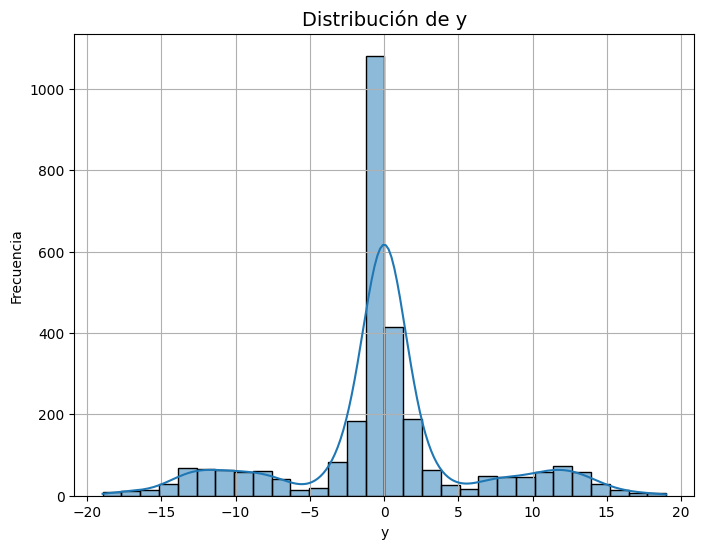

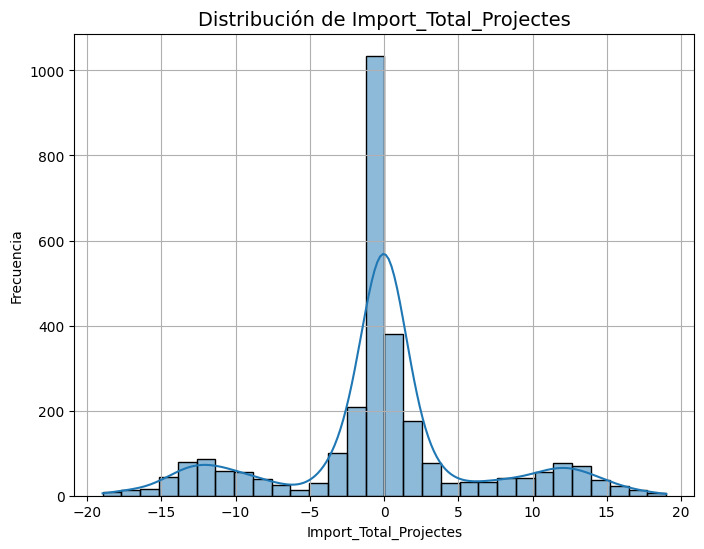

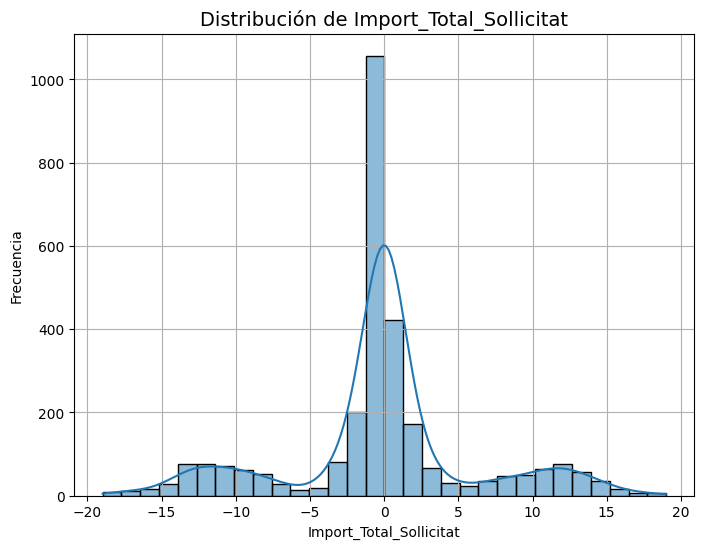

In [2280]:
for col in ['y','Import_Total_Projectes','Import_Total_Sollicitat']:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_featured[col], bins=30, kde=True)
    plt.title(f'Distribución de {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

### Feature Engineering

#### Representación trigonométrica de mes y trimestre.

In [2281]:
# Transformar 'Mes' en sus representaciones seno y coseno
df_featured['Mes_sin'] = np.sin(2 * np.pi * df_featured['Mes'] / 12)
df_featured['Mes_cos'] = np.cos(2 * np.pi * df_featured['Mes'] / 12)

In [2282]:
# Transformar 'Trimestre' en sus representaciones seno y coseno
df_featured['Trimestre_sin'] = np.sin(2 * np.pi * df_featured['Trimestre'] / 4)
df_featured['Trimestre_cos'] = np.cos(2 * np.pi * df_featured['Trimestre'] / 4)

In [2283]:
for col in ['Mes_sin','Mes_cos','Trimestre_sin','Trimestre_cos']:
  df_featured[col] = np.where(abs(df_featured[col])<0.0001,0,df_featured[col])

In [2284]:
df_featured[df_featured['Mes']==6].head(2)

Data          Unique_ID   Any  Mes  Trimestre ID_Àrea_de_Interès  \
5  2019-06-30  Area_01_Import_01  2019    6          2            Area_01   
17 2020-06-30  Area_01_Import_01  2020    6          2            Area_01   

   ID_Bucket_Import_Atorgat  Import_Total_Projectes  Import_Total_Sollicitat  \
5                 Import_01                0.000000                 0.000000   
17                Import_01                5.888878                 5.888878   

           y  Mes_sin  Mes_cos  Trimestre_sin  Trimestre_cos  
5   0.000000      0.0     -1.0            0.0           -1.0  
17  5.888878      0.0     -1.0            0.0           -1.0

#### Simple target related features and transformations

In [2285]:
# Gap entre importe solicitado y atorgado
df_featured['Gap_SA'] = df_featured['Import_Total_Sollicitat'] - df_featured['y']
del df_featured['Import_Total_Sollicitat'] # Elimino la variable correlacionada

In [2286]:
# Cumulative sum: year to date and quarter to date features
df_featured['ytd_y'] = df_featured.groupby(['Unique_ID', 'Any'])['y'].cumsum()
df_featured['qtd_y'] = df_featured.groupby(['Unique_ID', 'Trimestre'])['y'].cumsum()

df_featured['ytd_Gap_SA'] = df_featured.groupby(['Unique_ID', 'Any'])['Gap_SA'].cumsum()
df_featured['qtd_Gap_SA'] = df_featured.groupby(['Unique_ID', 'Trimestre'])['Gap_SA'].cumsum()
# Importe total proyectos
df_featured['ytd_ITP'] = df_featured.groupby(['Unique_ID', 'Any'])['Import_Total_Projectes'].cumsum()
df_featured['qtd_ITP'] = df_featured.groupby(['Unique_ID', 'Trimestre'])['Import_Total_Projectes'].cumsum()

#### Grouping features and interactions:

In [2287]:
def build_ts_features(df, cols_to_group, target_column, aggfunc):

    assert "Data" in df.columns.tolist(), "Date must be in df columns"


    # Create a new name for columns based on the grouping list
    new_name = "_".join(cols_to_group + [target_column] + [aggfunc.__name__])

    # Set the index and perform grouping, resampling, and aggregation in one step
    grouped_df = (
        df.set_index("Data")
        .groupby(cols_to_group)
        .resample("ME")[target_column]
        .agg(aggfunc)
        .reset_index()
        .rename(
            columns = {
                target_column : new_name
            }
        )
    )


    # Merge the generated features back into the original DataFrame
    merge_cols = ['Data'] + cols_to_group
    df = pd.merge(df, grouped_df, on=merge_cols, how='left')

    return df

In [2288]:
df_featured.head(2)

Data          Unique_ID   Any  Mes  Trimestre ID_Àrea_de_Interès  \
0 2019-01-31  Area_01_Import_01  2019    1          1            Area_01   
1 2019-02-28  Area_01_Import_01  2019    2          1            Area_01   

  ID_Bucket_Import_Atorgat  Import_Total_Projectes         y   Mes_sin  \
0                Import_01                0.000000  0.000000  0.500000   
1                Import_01                6.947937  6.947937  0.866025   

    Mes_cos  Trimestre_sin  Trimestre_cos  Gap_SA     ytd_y     qtd_y  \
0  0.866025            1.0            0.0     0.0  0.000000  0.000000   
1  0.500000            1.0            0.0     0.0  6.947937  6.947937   

   ytd_Gap_SA  qtd_Gap_SA   ytd_ITP   qtd_ITP  
0         0.0         0.0  0.000000  0.000000  
1         0.0         0.0  6.947937  6.947937

In [2289]:
df_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898 entries, 0 to 2897
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data                      2898 non-null   datetime64[ns]
 1   Unique_ID                 2898 non-null   object        
 2   Any                       2898 non-null   int32         
 3   Mes                       2898 non-null   int32         
 4   Trimestre                 2898 non-null   int32         
 5   ID_Àrea_de_Interès        2898 non-null   object        
 6   ID_Bucket_Import_Atorgat  2898 non-null   category      
 7   Import_Total_Projectes    2898 non-null   float64       
 8   y                         2898 non-null   float64       
 9   Mes_sin                   2898 non-null   float64       
 10  Mes_cos                   2898 non-null   float64       
 11  Trimestre_sin             2898 non-null   float64       
 12  Trimestre_cos       

In [2290]:
print(f"Initial DataFrame shape: {df_featured.shape}")

targets = ['y', 'Gap_SA', 'Import_Total_Projectes']
groups = [
    ['ID_Àrea_de_Interès'],
    ['ID_Bucket_Import_Atorgat'],
]
agg_functions = [np.sum, np.max, np.min]

for target in targets:
    for group in groups:
        for agg_func in agg_functions:
            df_featured = build_ts_features(
                                    df=df_featured,
                                    cols_to_group=group,
                                    target_column=target,
                                    aggfunc=agg_func,
                                )

print(f"Final DataFrame shape: {df_featured.shape}")

Initial DataFrame shape: (2898, 20)
Final DataFrame shape: (2898, 38)


In [2291]:
df_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898 entries, 0 to 2897
Data columns (total 38 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Data                                                 2898 non-null   datetime64[ns]
 1   Unique_ID                                            2898 non-null   object        
 2   Any                                                  2898 non-null   int32         
 3   Mes                                                  2898 non-null   int32         
 4   Trimestre                                            2898 non-null   int32         
 5   ID_Àrea_de_Interès                                   2898 non-null   object        
 6   ID_Bucket_Import_Atorgat                             2898 non-null   category      
 7   Import_Total_Projectes                               2898 non-null   float64       
 8 

#### Rolling Averages and Lags

In [2292]:
def build_moving_avg(df,target_columns,window):
  df = df.copy()
  for col in target_columns:
    new_name = "_".join([col] + ['mov_avg'] + [str(window)])
    df[new_name] = df_featured.groupby('Unique_ID')[col].transform(lambda x: x.rolling(window=window).mean())

  return df

In [2293]:
def build_rolling_std(df,target_columns,window):
  df = df.copy()
  for col in target_columns:
    new_name = "_".join([col] + ['rolling_std'] + [str(window)])
    df[new_name] = df_featured.groupby('Unique_ID')[col].transform(lambda x: x.rolling(window=window).std())

  return df

In [2294]:
def build_expanding_mean(df,target_columns):
  df = df.copy()
  for col in target_columns:
    new_name = "_".join([col] + ['Expanding_Mean'])
    df[new_name] = df_featured.groupby('Unique_ID')[col].transform(lambda x: x.expanding().mean())

  return df

In [2295]:
def build_expanding_std(df,target_columns):
  df = df.copy()
  for col in target_columns:
    new_name = "_".join([col] + ['expanding_std'])
    df[new_name] = df_featured.groupby('Unique_ID')[col].transform(lambda x: x.expanding().std())

  return df

In [2296]:
def build_exponentially_weighted_mean(df,target_columns,alpha=0.5):
  df = df.copy()
  for col in target_columns:
    new_name = "_".join([col] + ['ewm'] + ['alpha'+str(alpha)])
    df[new_name] = df_featured.groupby('Unique_ID')[col].transform(lambda x: x.ewm(alpha=alpha).mean())

  return df

In [2297]:
def build_features_lags(df,target_columns,lags):
  df = df.copy()
  for col in target_columns:
    for lag in lags:
          df[f"{col}_lag{lag}"] = df.groupby('Unique_ID')[col].shift(lag)

  return df

In [2298]:
df_featured = build_moving_avg(df_featured,['y'],window=3)

In [2299]:
df_featured = build_expanding_mean(df_featured,['y'])

In [2300]:
df_featured = build_exponentially_weighted_mean(df_featured,['y'],alpha=0.5)

In [2301]:
df_featured = build_rolling_std(df_featured,['y'],window=3)

In [2302]:
df_featured = build_expanding_std(df_featured,['y'])

In [2303]:
df_featured.columns.to_list()

['Data',
 'Unique_ID',
 'Any',
 'Mes',
 'Trimestre',
 'ID_Àrea_de_Interès',
 'ID_Bucket_Import_Atorgat',
 'Import_Total_Projectes',
 'y',
 'Mes_sin',
 'Mes_cos',
 'Trimestre_sin',
 'Trimestre_cos',
 'Gap_SA',
 'ytd_y',
 'qtd_y',
 'ytd_Gap_SA',
 'qtd_Gap_SA',
 'ytd_ITP',
 'qtd_ITP',
 'ID_Àrea_de_Interès_y_sum',
 'ID_Àrea_de_Interès_y_max',
 'ID_Àrea_de_Interès_y_min',
 'ID_Bucket_Import_Atorgat_y_sum',
 'ID_Bucket_Import_Atorgat_y_max',
 'ID_Bucket_Import_Atorgat_y_min',
 'ID_Àrea_de_Interès_Gap_SA_sum',
 'ID_Àrea_de_Interès_Gap_SA_max',
 'ID_Àrea_de_Interès_Gap_SA_min',
 'ID_Bucket_Import_Atorgat_Gap_SA_sum',
 'ID_Bucket_Import_Atorgat_Gap_SA_max',
 'ID_Bucket_Import_Atorgat_Gap_SA_min',
 'ID_Àrea_de_Interès_Import_Total_Projectes_sum',
 'ID_Àrea_de_Interès_Import_Total_Projectes_max',
 'ID_Àrea_de_Interès_Import_Total_Projectes_min',
 'ID_Bucket_Import_Atorgat_Import_Total_Projectes_sum',
 'ID_Bucket_Import_Atorgat_Import_Total_Projectes_max',
 'ID_Bucket_Import_Atorgat_Import_Total_P

In [2304]:
df_featured = build_features_lags(df_featured,['y'],[1,2,3,12,24,36])

In [2305]:
columns_to_lag_1 = [
 'Import_Total_Projectes',
 'Gap_SA',
 'ytd_y',
 'qtd_y',
 'ytd_Gap_SA',
 'qtd_Gap_SA',
 'ytd_ITP',
 'qtd_ITP',
 'ID_Àrea_de_Interès_y_sum',
 'ID_Àrea_de_Interès_y_max',
 'ID_Àrea_de_Interès_y_min',
 'ID_Bucket_Import_Atorgat_y_sum',
 'ID_Bucket_Import_Atorgat_y_max',
 'ID_Bucket_Import_Atorgat_y_min',
 'ID_Àrea_de_Interès_Gap_SA_sum',
 'ID_Àrea_de_Interès_Gap_SA_max',
 'ID_Àrea_de_Interès_Gap_SA_min',
 'ID_Bucket_Import_Atorgat_Gap_SA_sum',
 'ID_Bucket_Import_Atorgat_Gap_SA_max',
 'ID_Bucket_Import_Atorgat_Gap_SA_min',
 'ID_Àrea_de_Interès_Import_Total_Projectes_sum',
 'ID_Àrea_de_Interès_Import_Total_Projectes_max',
 'ID_Àrea_de_Interès_Import_Total_Projectes_min',
 'ID_Bucket_Import_Atorgat_Import_Total_Projectes_sum',
 'ID_Bucket_Import_Atorgat_Import_Total_Projectes_max',
 'ID_Bucket_Import_Atorgat_Import_Total_Projectes_min',
 'y_mov_avg_3',
 'y_Expanding_Mean',
 'y_ewm_alpha0.5',
 'y_rolling_std_3',
 'y_expanding_std'
]

In [2306]:
df_featured = build_features_lags(df_featured,columns_to_lag_1,[1])

In [2307]:
# imputo los nulos
for col in df_featured.columns:
  if df_featured[col].isnull().any():
    df_featured[col] = df_featured[col].fillna(0)

#### Eliminar columnas auto-explicativas o innecesarias

In [2308]:
df_featured = df_featured.drop(columns=columns_to_lag_1)

In [2309]:
df_featured = df_featured.drop(columns=['Any','Mes','Trimestre'])

In [2310]:
df_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898 entries, 0 to 2897
Data columns (total 46 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   Data                                                      2898 non-null   datetime64[ns]
 1   Unique_ID                                                 2898 non-null   object        
 2   ID_Àrea_de_Interès                                        2898 non-null   object        
 3   ID_Bucket_Import_Atorgat                                  2898 non-null   category      
 4   y                                                         2898 non-null   float64       
 5   Mes_sin                                                   2898 non-null   float64       
 6   Mes_cos                                                   2898 non-null   float64       
 7   Trimestre_sin                             

### Split Train, Test

In [2311]:
df_featured

Data          Unique_ID ID_Àrea_de_Interès  \
0    2019-01-31  Area_01_Import_01            Area_01   
1    2019-02-28  Area_01_Import_01            Area_01   
2    2019-03-31  Area_01_Import_01            Area_01   
3    2019-04-30  Area_01_Import_01            Area_01   
4    2019-05-31  Area_01_Import_01            Area_01   
...         ...                ...                ...   
2893 2024-05-31  Area_06_Import_07            Area_06   
2894 2024-06-30  Area_06_Import_07            Area_06   
2895 2024-07-31  Area_06_Import_07            Area_06   
2896 2024-08-31  Area_06_Import_07            Area_06   
2897 2024-09-30  Area_06_Import_07            Area_06   

     ID_Bucket_Import_Atorgat         y   Mes_sin   Mes_cos  Trimestre_sin  \
0                   Import_01  0.000000  0.500000  0.866025            1.0   
1                   Import_01  6.947937  0.866025  0.500000            1.0   
2                   Import_01 -6.947937  1.000000  0.000000            1.0   
3                   Import_01  0.000000  0.866025 -0.500000            0.0   
4                   Import_01  0.000000  0.500000 -0.866025            0.0   
...                       ...       ...       ...       ...            ...   
2893                Import_07  0.000000  0.500000 -0.866025            0.0   
2894                Import_07  0.000000  0.000000 -1.000000            0.0   
2895                Import_07  0.000000 -0.500000 -0.866025           -1.0   
2896                Import_07  0.000000 -0.866025 -0.500000           -1.0   
2897                Import_07  0.000000 -1.000000  0.000000           -1.0   

      Trimestre_cos    y_lag1  ...  \
0               0.0  0.000000  ...   
1               0.0  0.000000  ...   
2               0.0  6.947937  ...   
3              -1.0 -6.947937  ...   
4              -1.0  0.000000  ...   
...             ...       ...  ...   
2893           -1.0  0.000000  ...   
2894           -1.0  0.000000  ...   
2895            0.0  0.000000  ...   
2896            0.0  0.000000  ...   
2897            0.0  0.000000  ...   

      ID_Àrea_de_Interès_Import_Total_Projectes_max_lag1  \
0                                              0.000000    
1                                              0.000000    
2                                              6.947937    
3                                              9.775679    
4                                              0.634456    
...                                                 ...    
2893                                           0.000000    
2894                                           8.378161    
2895                                           6.855461    
2896                                           0.000000    
2897                                           0.000000    

      ID_Àrea_de_Interès_Import_Total_Projectes_min_lag1  \
0                                              0.000000    
1                                              0.000000    
2                                            -12.097267    
3                                             -6.947937    
4                                            -13.038822    
...                                                 ...    
2893                                           0.000000    
2894                                           0.000000    
2895                                          -0.083861    
2896                                          -8.294300    
2897                                           0.000000    

      ID_Bucket_Import_Atorgat_Import_Total_Projectes_sum_lag1  \
0                                              0.000000          
1                                              0.000000          
2                                              5.282787          
3                                             -2.680277          
4                                             -0.993169          
...                                                 ...          
2893                        

In [2312]:
# Dataset de train de los modelos tipo xgboost y catbost
df_train_boost = df_featured[df_featured['Data'] <= '2024-07-31']
df_train_boost = df_train_boost.set_index('Data')
unique_id_train = df_train_boost.pop('Unique_ID')
X_train_boost = df_train_boost.drop(columns=['y'])
y_train_boost = df_train_boost['y']

# Dataset de test de los modelos tipo xgboost y catboost
df_test_boost = df_featured[(df_featured['Data'] >= '2024-08-01') & (df_featured['Data'] <= '2024-08-31')]
df_test_boost = df_test_boost.set_index('Data')
unique_id_test = df_test_boost.pop('Unique_ID')
X_test_boost = df_test_boost.drop(columns=['y'])
y_test_boost = df_test_boost['y']

# Dataset a predecir
df_future = df_featured[df_featured['Data'] >= '2024-09-01']
df_future = df_future.set_index('Data')
unique_id_future = df_future.pop('Unique_ID')
X_future = df_future.drop(columns=['y'])


### Preprocessing

- Encoding:
  - ID_Bucket_Import_Atorgat ---> Ordinal Encoding
  - ID_Àrea_de_Interès -----> One Hot Encoding
- Scaler: Robust Scaler



In [2313]:
X_train_boost

ID_Àrea_de_Interès ID_Bucket_Import_Atorgat   Mes_sin   Mes_cos  \
Data                                                                         
2019-01-31            Area_01                Import_01  0.500000  0.866025   
2019-02-28            Area_01                Import_01  0.866025  0.500000   
2019-03-31            Area_01                Import_01  1.000000  0.000000   
2019-04-30            Area_01                Import_01  0.866025 -0.500000   
2019-05-31            Area_01                Import_01  0.500000 -0.866025   
...                       ...                      ...       ...       ...   
2024-03-31            Area_06                Import_07  1.000000  0.000000   
2024-04-30            Area_06                Import_07  0.866025 -0.500000   
2024-05-31            Area_06                Import_07  0.500000 -0.866025   
2024-06-30            Area_06                Import_07  0.000000 -1.000000   
2024-07-31            Area_06                Import_07 -0.500000 -0.866025   

            Trimestre_sin  Trimestre_cos     y_lag1     y_lag2     y_lag3  \
Data                                                                        
2019-01-31            1.0            0.0   0.000000   0.000000   0.000000   
2019-02-28            1.0            0.0   0.000000   0.000000   0.000000   
2019-03-31            1.0            0.0   6.947937   0.000000   0.000000   
2019-04-30            0.0           -1.0  -6.947937   6.947937   0.000000   
2019-05-31            0.0           -1.0   0.000000  -6.947937   6.947937   
...                   ...            ...        ...        ...        ...   
2024-03-31            1.0            0.0 -14.592946  -0.188562  14.781508   
2024-04-30            0.0           -1.0   0.000000 -14.592946  -0.188562   
2024-05-31            0.0           -1.0   0.000000   0.000000 -14.592946   
2024-06-30            0.0           -1.0   0.000000   0.000000   0.000000   
2024-07-31           -1.0            0.0   0.000000   0.000000   0.000000   

              y_lag12  ...  \
Data                   ...   
2019-01-31   0.000000  ...   
2019-02-28   0.000000  ...   
2019-03-31   0.000000  ...   
2019-04-30   0.000000  ...   
2019-05-31   0.000000  ...   
...               ...  ...   
2024-03-31  -3.741471  ...   
2024-04-30 -14.508658  ...   
2024-05-31  14.365878  ...   
2024-06-30 -14.365878  ...   
2024-07-31   0.000000  ...   

            ID_Àrea_de_Interès_Import_Total_Projectes_max_lag1  \
Data                                                             
2019-01-31                                           0.000000    
2019-02-28                                           0.000000    
2019-03-31                                           6.947937    
2019-04-30                                           9.775679    
2019-05-31                                           0.634456    
...                                                       ...    
2024-03-31                                         -10.029121    
2024-04-30                                           0.000000    
2024-05-31                                           0.000000    
2024-06-30                                           8.378161    
2024-07-31                                           6.855461    

            ID_Àrea_de_Interès_Import_Total_Projectes_min_lag1  \
Data                                                             
2019-01-31                                           0.000000    
2019-02-28                                           0.000000    
2019-03-31                                         -12.097267    
2019-04-30                                          -6.947937    
2019-05-31                                         -13.038822    
...                                                       ...    
2024-03-31                                         -14.952265    
2024-04-30                                           0.000000    
2024-05-31                                           0.000000    
2024-06-30        

In [2314]:
# Encoder transformer
encoder = ColumnTransformer([
    ('Ordinal', OrdinalEncoder(), ['ID_Bucket_Import_Atorgat']),
    ('OHE', OneHotEncoder(sparse_output = False), ['ID_Àrea_de_Interès']),
], remainder='passthrough'
)

In [2315]:
scaler = RobustScaler(quantile_range=(1,99))

In [2316]:
# Defino una pipeline de preprocessing
boost_preprocessing_pipe = Pipeline(steps=[
    ('Encoding', encoder),
    ('Scaling', scaler)
]
)

### Torneo de modelos

Defino una pipeline para cada modelo, que incluya tanto el preprocessing como el modelo.

In [2317]:
# xgboost pipeline
xgb_pipe = Pipeline(steps=[
    ('Preprocessing', boost_preprocessing_pipe),
    ('Model', XGBRegressor())
])

# catboost pipeline
cb_pipe = Pipeline(steps=[
    ('Preprocessing', boost_preprocessing_pipe),
    ('Model', CatBoostRegressor(verbose=False))
])

In [2318]:
# añadimos en una lista los modelos que queremos poner a competir
modelos = [('XGBoost', xgb_pipe), ('CatBoost', cb_pipe)]

In [2319]:
# Defino umbral para excluir valores próximos a 0 para el calculo del MAPE
umbral_cero = 1e-6

# Instancio el dataframe de resultados del torneo
torneo_results = pd.DataFrame(columns=['Modelo','RMSE','MAPE'])



# Entreno y evaluo cada modelo
for nombre, modelo in modelos:

    # Instancio el dataset temporal para calcular el RMSE del modelo
    temp_results = pd.DataFrame(index=unique_id_test).reset_index()

    # Agrego y_test
    temp_results['y_test'] = y_test_boost.values

    # Devolvemos los valores a la escala original
    temp_results['y_test'] = temp_results.groupby('Unique_ID')['y_test'].transform(lambda x:x.cumsum())
    temp_results['y_test'] = np.expm1(temp_results['y_test'])

    # Entrenamiento
    modelo.fit(X_train_boost, y_train_boost)

    # Realizo predicciones del dataset de test
    temp_results['y_test_pred']  = modelo.predict(X_test_boost)

    # cumulative sum
    temp_results['y_test_pred'] = temp_results.groupby('Unique_ID')['y_test_pred'].transform(lambda x:x.cumsum())

    # expm1
    temp_results['y_test_pred'] = np.expm1(temp_results['y_test_pred'])

    # Excluir valores de y_test cercanos a 0 para el cálculo del MAPE
    temp_results_filtrado = temp_results[temp_results['y_test'] > umbral_cero]

    # evalua la metrica
    rmse = mean_squared_error(temp_results['y_test'], temp_results['y_test_pred'], squared=False)
    mape = mean_absolute_percentage_error(temp_results_filtrado['y_test'], temp_results_filtrado['y_test_pred'])

    # añade la métrica al dataframe de métricas
    metrica = pd.DataFrame({'Modelo':[nombre], 'RMSE':[rmse], 'MAPE':[mape]})

    print(nombre, np.round(rmse,5))

    torneo_results = pd.concat([torneo_results, metrica], ignore_index=True)


XGBoost 441278.95386
CatBoost 442515.47125


In [2320]:
torneo_results.loc[len(torneo_results)] = {'Modelo':'ARIMA','RMSE':arima_results['RMSE_ARIMA'].mean(),'MAPE':arima_results['MAPE_ARIMA'].mean()}

In [2321]:
torneo_results

Modelo           RMSE      MAPE
0   XGBoost  441278.953862  7.278987
1  CatBoost  442515.471250  7.153011
2     ARIMA  651207.716163  7.109409

Elijo seleccionar el modelo con el menor RMSE, ya que el objetivo  minimizar las diferencias absolutas entre el valor predicho y el valor real.

### Observaciones


He decidido no realizar una hiperparametrización de los parámetros porque, en este contexto, el modelo actual sirve principalmente como una herramienta de orientación para ayudar al Ayuntamiento en la planificación financiera de las subvenciones. No existe una necesidad crítica de reducir al mínimo el error, ya que en la práctica, el Ayuntamiento siempre tomará un margen de seguridad respecto a las previsiones generadas. Esto significa que los resultados actuales son suficientemente precisos para el propósito de planificación, sin requerir una mejora adicional en las métricas a través de ajustes finos.



### Training final model

Entreno el modelo XGBoost que he elejido

In [2322]:
xgb_pipe.fit(X_train_boost, y_train_boost)

Pipeline(steps=[('Preprocessing',
                 Pipeline(steps=[('Encoding',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('Ordinal',
                                                                   OrdinalEncoder(),
                                                                   ['ID_Bucket_Import_Atorgat']),
                                                                  ('OHE',
                                                                   OneHotEncoder(sparse_output=False),
                                                                   ['ID_Àrea_de_Interès'])])),
                                 ('Scaling',
                                  RobustScaler(quantile_range=(1, 99)))])),
                ('Model',
                 XGBRegressor(base_score=None, booster=None, call...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

### Predicciones Septiembre 2024

In [2323]:
# Hago las predicciones
predictions = xgb_pipe.predict(X_future)

In [2324]:
predictions

array([-1.5004349 , -2.0281913 , -0.7522658 , -5.6805043 , -3.3157094 ,
        1.7201967 ,  4.2879205 , -2.5655036 , -4.767419  , -7.9438562 ,
       -9.141611  , -5.9444356 ,  3.9429352 ,  5.098493  ,  1.4610257 ,
       -1.0098426 , -1.8644543 , -1.2853819 ,  9.590106  , -0.57402873,
       -0.6130618 , -0.69749385, -0.95665014,  0.32208884,  0.36264786,
        6.6493087 ,  5.7700777 , -3.7477942 , -1.683569  , -4.2567997 ,
       -5.0770726 , -5.0536165 , -7.639538  ,  1.6744473 ,  2.3755782 ,
        2.1639693 ,  8.813421  ,  9.878429  ,  9.325009  , 11.24864   ,
        8.725351  ,  2.9353912 ], dtype=float32)

Voy a crear un dataframe que contiene los datos historicos y las predicciones.

In [2325]:
# añado la columna Unique_ID al dataframe que contendrá solamente las predicciones
df_future['Unique_ID'] = unique_id_future

In [2326]:
# Añado la columna con las predicciones
df_future['y'] = predictions

In [2327]:
# Selecciono solo las columnas que quiero en el dataset final
final_columns = [
 'Data',
 'Unique_ID',
 'ID_Àrea_de_Interès',
 'ID_Bucket_Import_Atorgat',
 'y',
]

In [2328]:
# Selecciono las columnas deseadas en el datset con las predicciones
df_future = df_future.reset_index()
df_future = df_future[final_columns]

In [2329]:
# Genero el dataset final
df_predicted = df_featured.copy()

In [2330]:
# Selecciono solo las columnas deseadas
df_predicted = df_predicted[final_columns]

In [2331]:
df_predicted

Data          Unique_ID ID_Àrea_de_Interès  \
0    2019-01-31  Area_01_Import_01            Area_01   
1    2019-02-28  Area_01_Import_01            Area_01   
2    2019-03-31  Area_01_Import_01            Area_01   
3    2019-04-30  Area_01_Import_01            Area_01   
4    2019-05-31  Area_01_Import_01            Area_01   
...         ...                ...                ...   
2893 2024-05-31  Area_06_Import_07            Area_06   
2894 2024-06-30  Area_06_Import_07            Area_06   
2895 2024-07-31  Area_06_Import_07            Area_06   
2896 2024-08-31  Area_06_Import_07            Area_06   
2897 2024-09-30  Area_06_Import_07            Area_06   

     ID_Bucket_Import_Atorgat         y  
0                   Import_01  0.000000  
1                   Import_01  6.947937  
2                   Import_01 -6.947937  
3                   Import_01  0.000000  
4                   Import_01  0.000000  
...                       ...       ...  
2893                Import_07  0.000000  
2894                Import_07  0.000000  
2895                Import_07  0.000000  
2896                Import_07  0.000000  
2897                Import_07  0.000000  

[2898 rows x 5 columns]

In [2332]:
# Elimino el més de septiembre que aquí solo tenía función de "Placeholder"
df_predicted = df_predicted[df_predicted['Data']<='2024-08-31']

In [2333]:
# Concateno  las predicciones
df_predicted = pd.concat([df_predicted,df_future],ignore_index=True)

In [2334]:
# Reordeno el dataset por fecha y Unique_ID
df_predicted = df_predicted.sort_values(by=['Unique_ID','Data'])
df_predicted = df_predicted.reset_index(drop=True)

In [2335]:
df_predicted

Data          Unique_ID ID_Àrea_de_Interès  \
0    2019-01-31  Area_01_Import_01            Area_01   
1    2019-02-28  Area_01_Import_01            Area_01   
2    2019-03-31  Area_01_Import_01            Area_01   
3    2019-04-30  Area_01_Import_01            Area_01   
4    2019-05-31  Area_01_Import_01            Area_01   
...         ...                ...                ...   
2893 2024-05-31  Area_06_Import_07            Area_06   
2894 2024-06-30  Area_06_Import_07            Area_06   
2895 2024-07-31  Area_06_Import_07            Area_06   
2896 2024-08-31  Area_06_Import_07            Area_06   
2897 2024-09-30  Area_06_Import_07            Area_06   

     ID_Bucket_Import_Atorgat         y  
0                   Import_01  0.000000  
1                   Import_01  6.947937  
2                   Import_01 -6.947937  
3                   Import_01  0.000000  
4                   Import_01  0.000000  
...                       ...       ...  
2893                Import_07  0.000000  
2894                Import_07  0.000000  
2895                Import_07  0.000000  
2896                Import_07  0.000000  
2897                Import_07  2.935391  

[2898 rows x 5 columns]

In [2336]:
# Aplico las transformaciones inversas a la variable y


# Cumsum para para revertir la diferenciación
df_predicted['y'] = df_predicted.groupby('Unique_ID')['y'].transform(lambda x:x.cumsum())

# expm1 para para revertir la logaritmización
df_predicted['y'] = np.expm1(df_predicted['y'])

In [2337]:
df_predicted = df_predicted.rename(columns={'y':'Import_Total_Atorgat'})

In [2338]:
df_predicted['Import_Total_Atorgat'] = np.where(df_predicted['Import_Total_Atorgat']<0,0,df_predicted['Import_Total_Atorgat'])

In [2339]:
unique_id_details_df = df_full.groupby(['Unique_ID']).agg(
    Àrea_de_Interès = ('Àrea_de_Interès','first'),
    Bucket_Import_Atorgat = ('Bucket_Import_Atorgat','first'),
    Any = ('Any','first'),
    Mes = ('Mes','first'),
    Trimestre = ('Trimestre','first')
).reset_index()

In [2340]:
df_predicted = df_predicted.merge(unique_id_details_df,'left',on=['Unique_ID'])

In [2341]:
df_clean

Data_Atorgament  Any_Atorgament  Mes_Atorgament  Trimestre_Atorgament  \
0          2019-01-08            2019               1                     1   
1          2019-01-10            2019               1                     1   
2          2019-01-10            2019               1                     1   
3          2019-01-10            2019               1                     1   
4          2019-01-10            2019               1                     1   
...               ...             ...             ...                   ...   
53952      2024-08-27            2024               8                     3   
53953      2024-08-27            2024               8                     3   
53954      2024-08-27            2024               8                     3   
53955      2024-08-29            2024               8                     3   
53956      2024-08-29            2024               8                     3   

                      Entitat_Municipal  \
0                   Altres Institucions   
1                   Altres Institucions   
2               Ajuntament de Barcelona   
3               Ajuntament de Barcelona   
4               Ajuntament de Barcelona   
...                                 ...   
53952  Institut de Cultura de Barcelona   
53953  Institut de Cultura de Barcelona   
53954  Institut de Cultura de Barcelona   
53955           Ajuntament de Barcelona   
53956           Ajuntament de Barcelona   

                                  Àrea_d'Interès Tipologia_De_Subvencio  \
0                         Altres Àrees d'Interès     ALTRES SUBVENCIONS   
1      Drets socials i persones amb discapacitat   CONVOCATÒRIA GENERAL   
2      Drets socials i persones amb discapacitat   CONVOCATÒRIA GENERAL   
3      Drets socials i persones amb discapacitat   CONVOCATÒRIA GENERAL   
4      Drets socials i persones amb discapacitat   CONVOCATÒRIA GENERAL   
...                                          ...                    ...   
53952                           Cultura i esport   CONVOCATÒRIA GENERAL   
53953                           Cultura i esport   CONVOCATÒRIA GENERAL   
53954                           Cultura i esport   CONVOCATÒRIA GENERAL   
53955                           Cultura i esport   CONVOCATÒRIA GENERAL   
53956                                 Districtes   CONVOCATÒRIA GENERAL   

         Tipologia_Beneficiari Bucket_Import_Atorgat  Import_Total_Projecte  \
0      Associacions i similars     100 mil - 500 mil              284837.00   
1      Associacions i similars        5 mil - 20 mil               27995.72   
2      Associacions i similars         2 mil - 5 mil               10670.00   
3      Associacions i similars           800 - 2 mil                5000.00   
4      Associacions i similars         2 mil - 5 mil                4532.70   
...                        ...                   ...                    ...   
53952  Associacions i similars           800 - 2 mil              131600.00   
53953        Persones físiques           800 - 2 mil               10080.00   
53954  Associacions i similars         2 mil - 5 mil               14562.00   
53955  Associacions i similars         2 mil - 5 mil               20724.09   
53956  Associacions i similars                 < 800                8840.00   

       Import_Sollicitat  Import_Atorgat_Inicial ID_Àrea_d'Interès  \
0              284837.00                284837.0           Area_01   
1               13997.86                  8000.0           Area_02   
2                3000.00                  3000.0           Area_02   
3                2500.00                  1500.0           Area_02   
4                2250.00                  2250.0           Area_02   
...                  ...                     ...               ...   
53952           30000.00                  1000.0           Area_04   
53953           10000.00                  1000.0           Area_04   
53954            7281.00                  2000.0           A

In [2342]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53957 entries, 0 to 53956
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Data_Atorgament           53957 non-null  datetime64[ns]
 1   Any_Atorgament            53957 non-null  int32         
 2   Mes_Atorgament            53957 non-null  int32         
 3   Trimestre_Atorgament      53957 non-null  int32         
 4   Entitat_Municipal         53957 non-null  object        
 5   Àrea_d'Interès            53957 non-null  object        
 6   Tipologia_De_Subvencio    53957 non-null  object        
 7   Tipologia_Beneficiari     53957 non-null  object        
 8   Bucket_Import_Atorgat     53957 non-null  category      
 9   Import_Total_Projecte     53957 non-null  float64       
 10  Import_Sollicitat         53957 non-null  float64       
 11  Import_Atorgat_Inicial    53957 non-null  float64       
 12  ID_Àrea_d'Interès 

In [2343]:
df_predicted

Data          Unique_ID ID_Àrea_de_Interès  \
0    2019-01-31  Area_01_Import_01            Area_01   
1    2019-02-28  Area_01_Import_01            Area_01   
2    2019-03-31  Area_01_Import_01            Area_01   
3    2019-04-30  Area_01_Import_01            Area_01   
4    2019-05-31  Area_01_Import_01            Area_01   
...         ...                ...                ...   
2893 2024-05-31  Area_06_Import_07            Area_06   
2894 2024-06-30  Area_06_Import_07            Area_06   
2895 2024-07-31  Area_06_Import_07            Area_06   
2896 2024-08-31  Area_06_Import_07            Area_06   
2897 2024-09-30  Area_06_Import_07            Area_06   

     ID_Bucket_Import_Atorgat  Import_Total_Atorgat         Àrea_de_Interès  \
0                   Import_01                   0.0  Altres Àrees d'Interès   
1                   Import_01                1040.0  Altres Àrees d'Interès   
2                   Import_01                   0.0  Altres Àrees d'Interès   
3                   Import_01                   0.0  Altres Àrees d'Interès   
4                   Import_01                   0.0  Altres Àrees d'Interès   
...                       ...                   ...                     ...   
2893                Import_07                   0.0                Economia   
2894                Import_07                   0.0                Economia   
2895                Import_07                   0.0                Economia   
2896                Import_07                   0.0                Economia   
2897                Import_07                   0.0                Economia   

     Bucket_Import_Atorgat   Any  Mes  Trimestre  
0                    < 800  2019    1          1  
1                    < 800  2019    1          1  
2                    < 800  2019    1          1  
3                    < 800  2019    1          1  
4                    < 800  2019    1          1  
...                    ...   ...  ...        ...  
2893             > 500 mil  2019    1          1  
2894             > 500 mil  2019    1          1  
2895             > 500 mil  2019    1          1  
2896             > 500 mil  2019    1          1  
2897             > 500 mil  2019    1          1  

[2898 rows x 10 columns]

#### Plot predictions

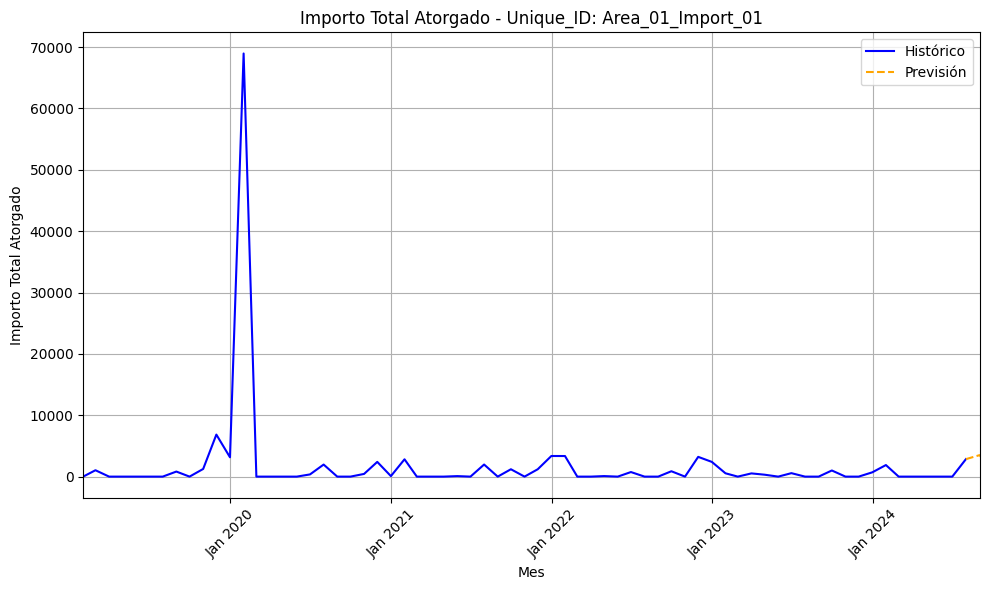

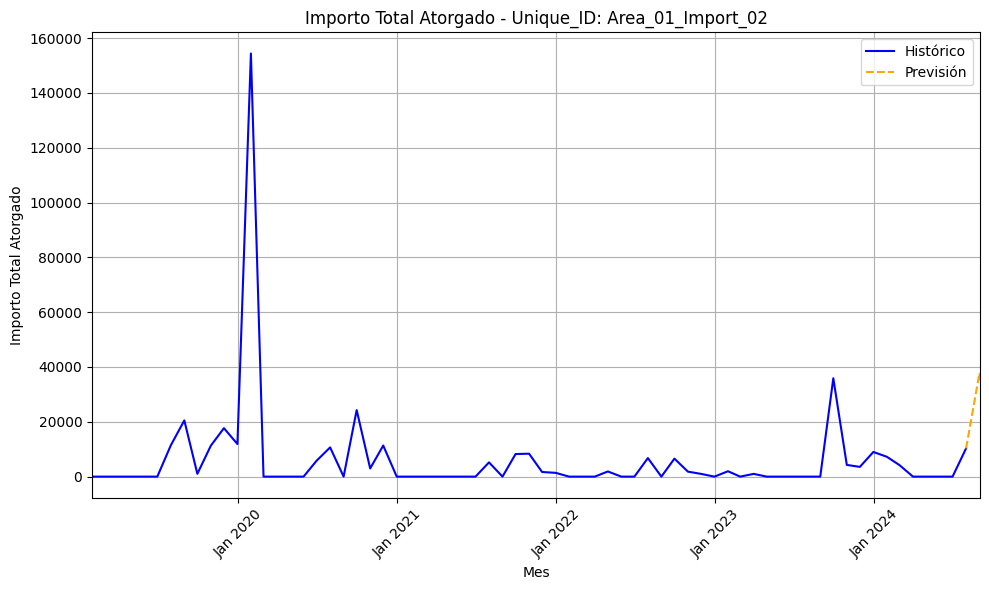

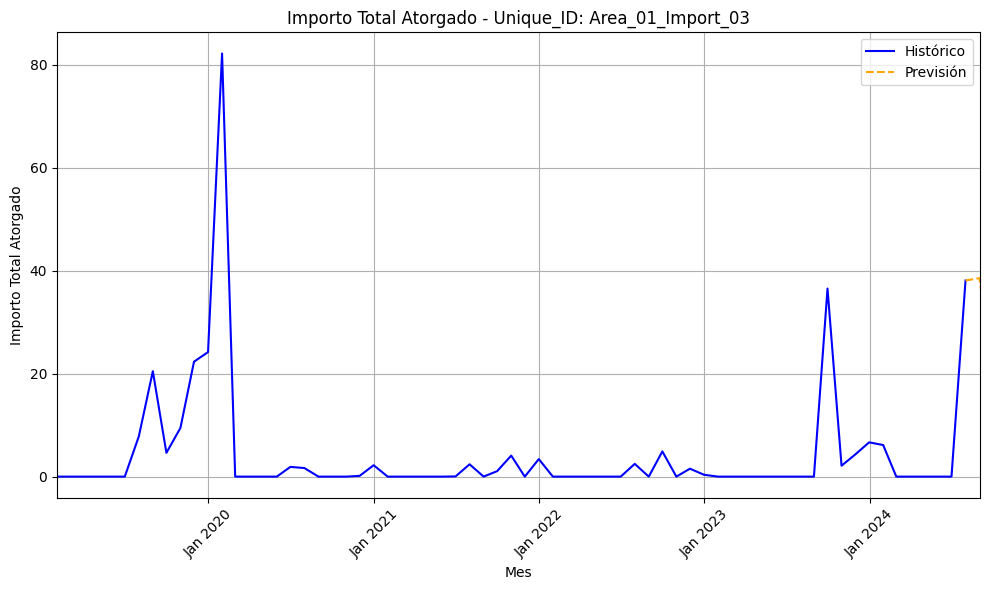

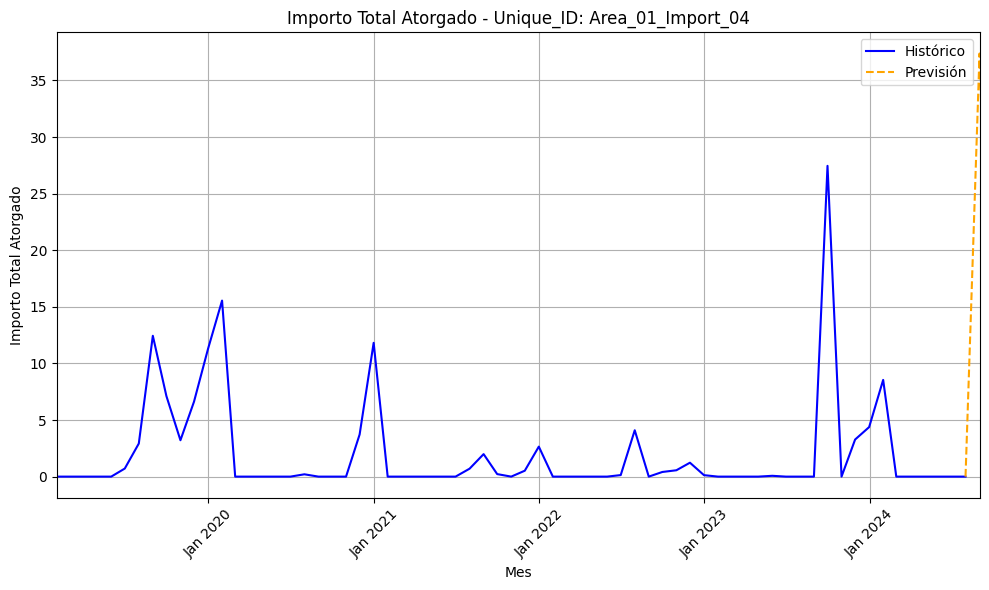

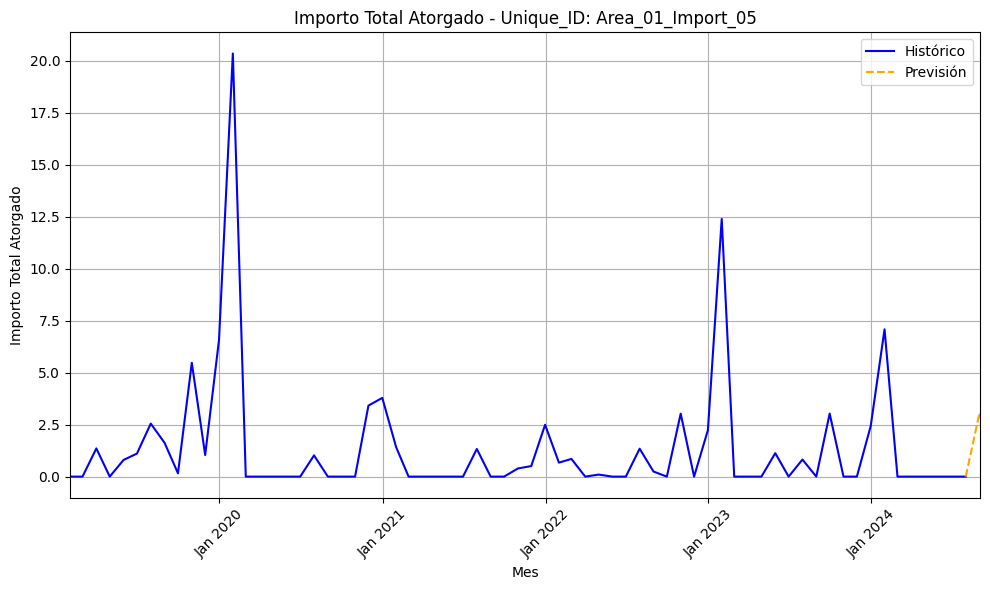

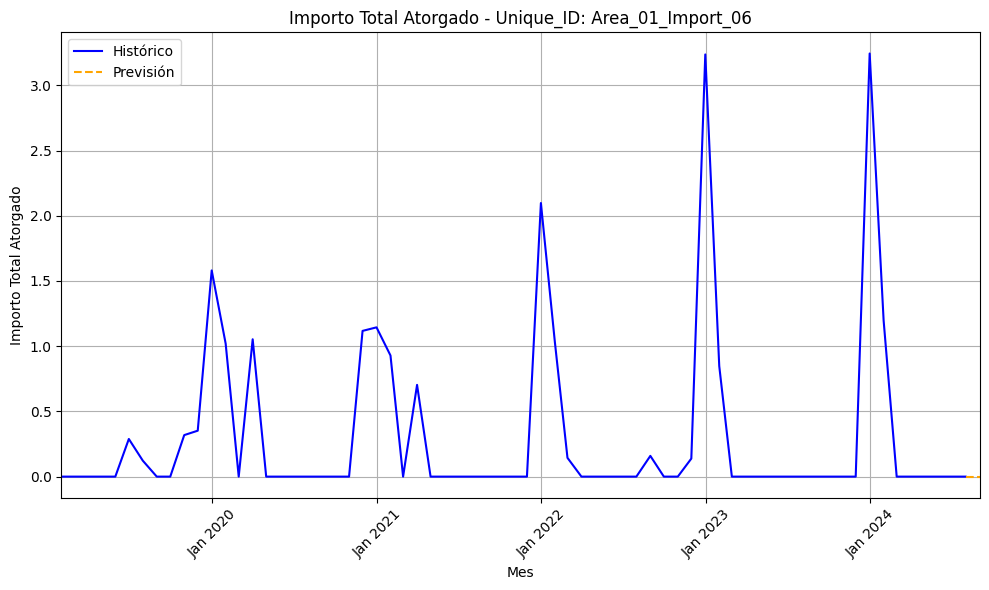

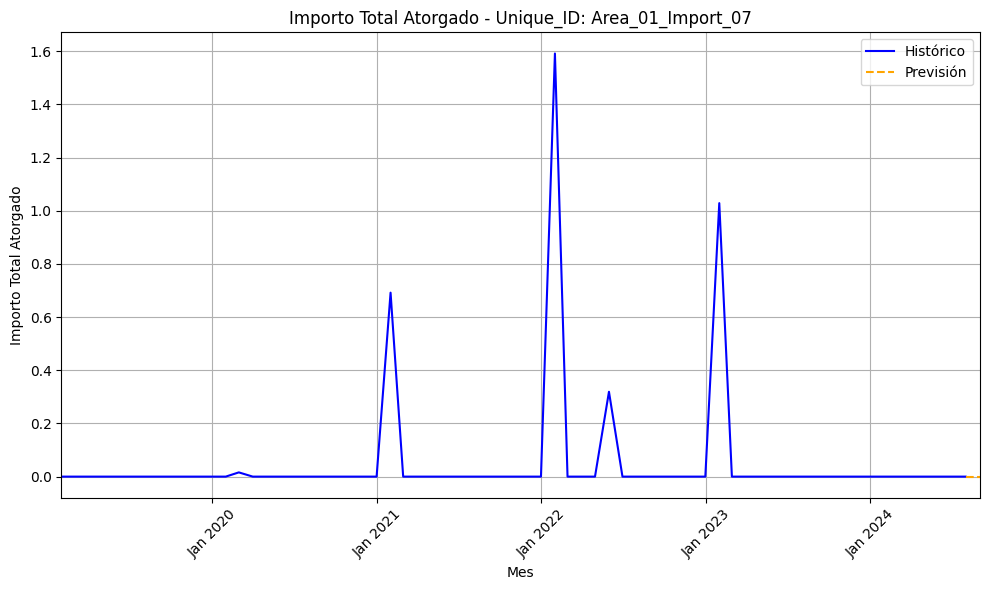

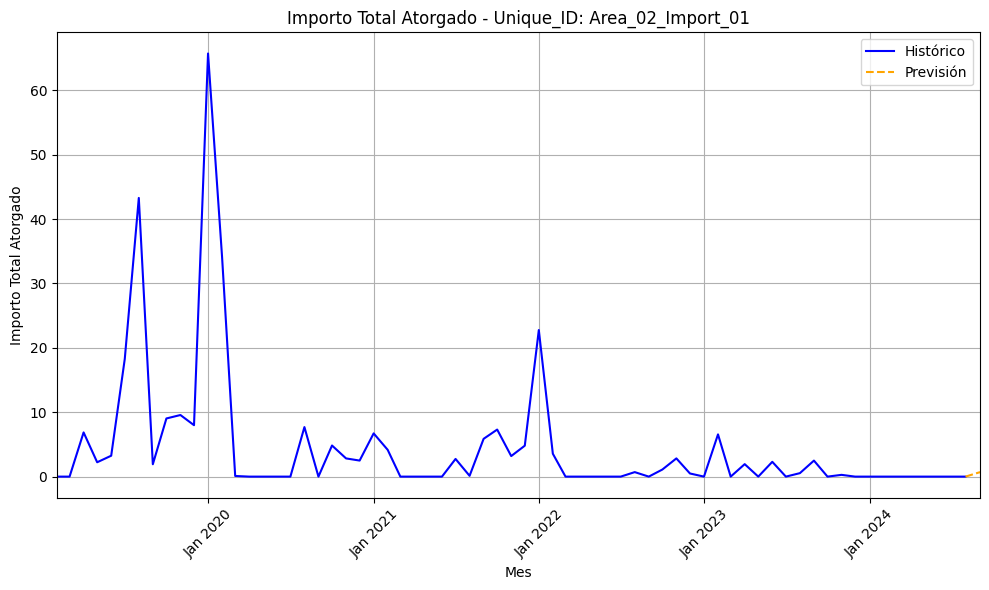

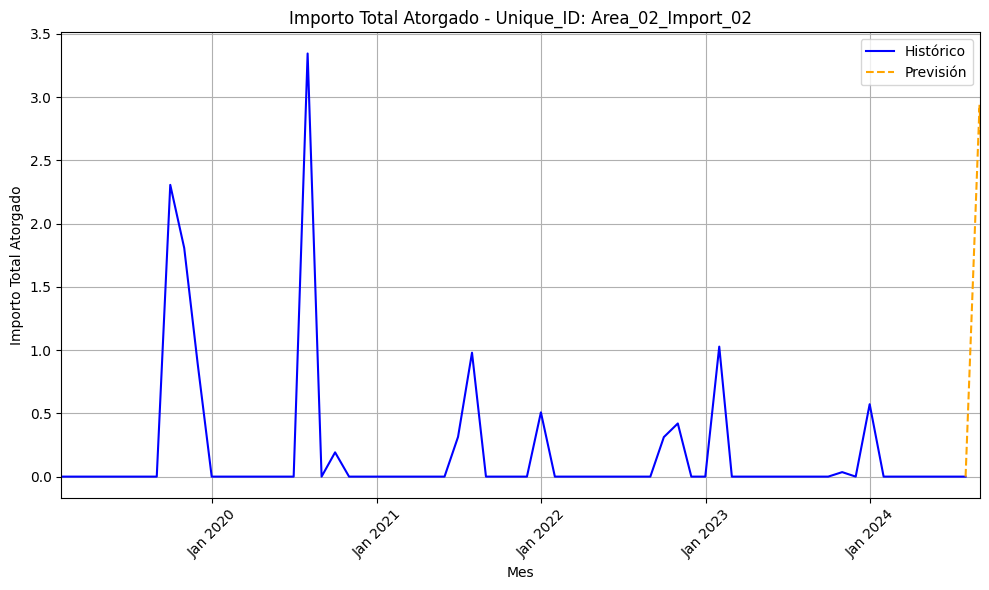

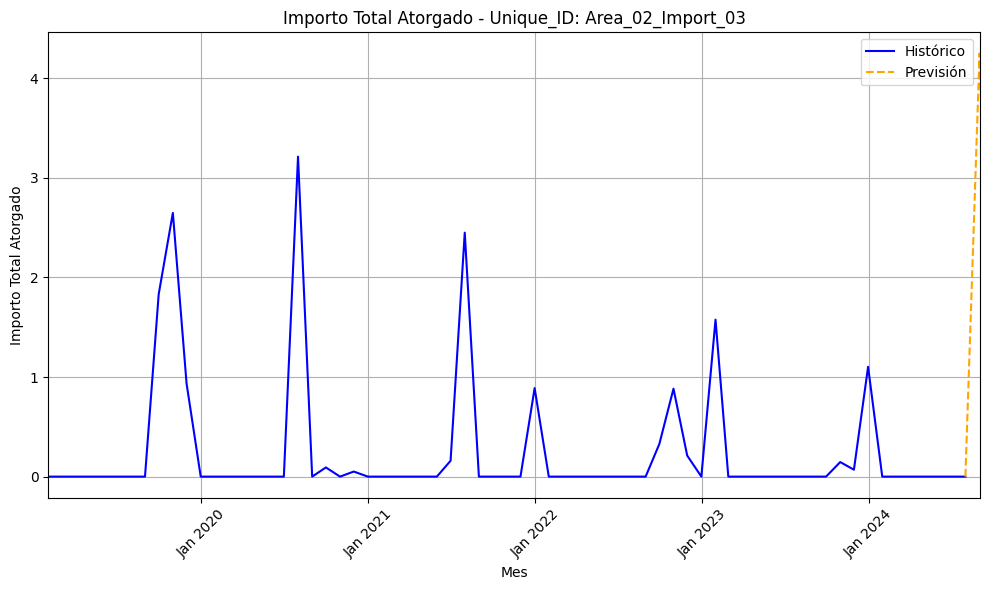

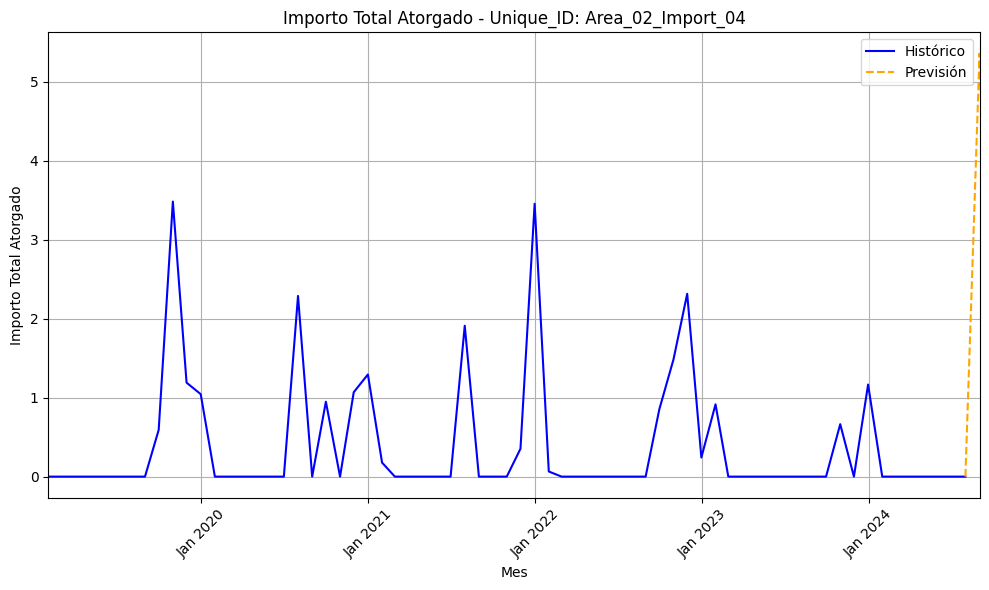

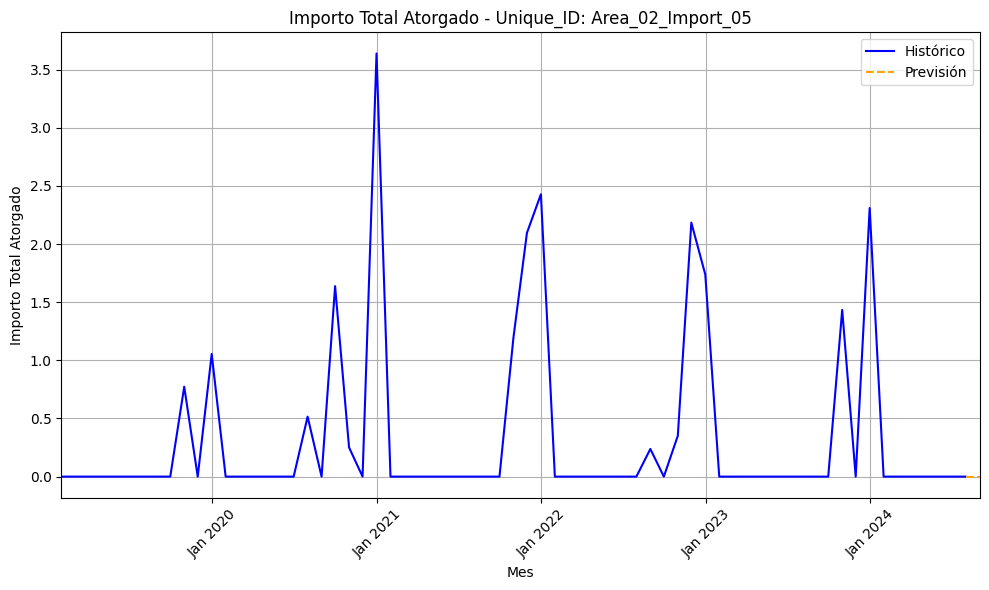

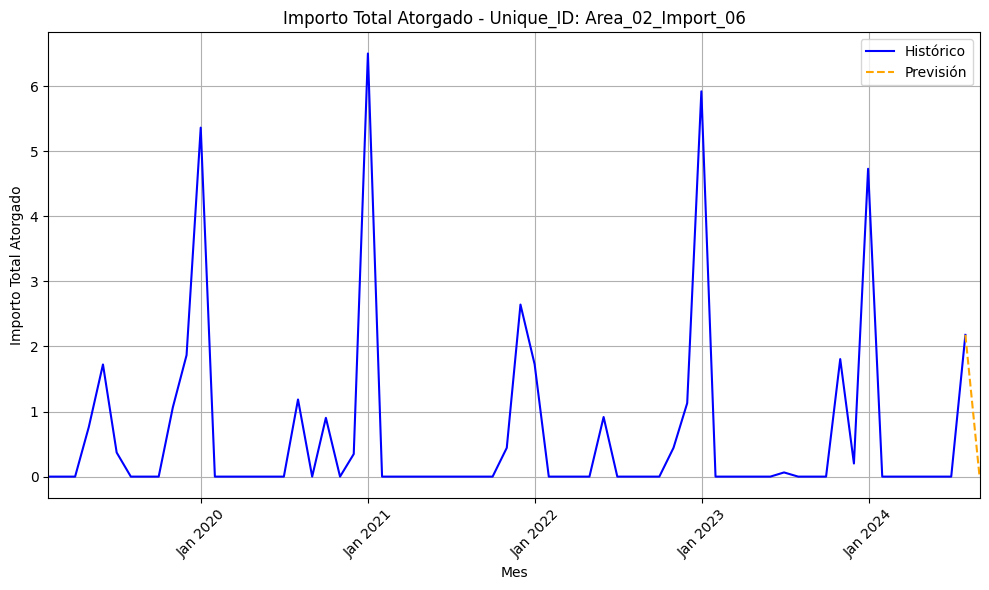

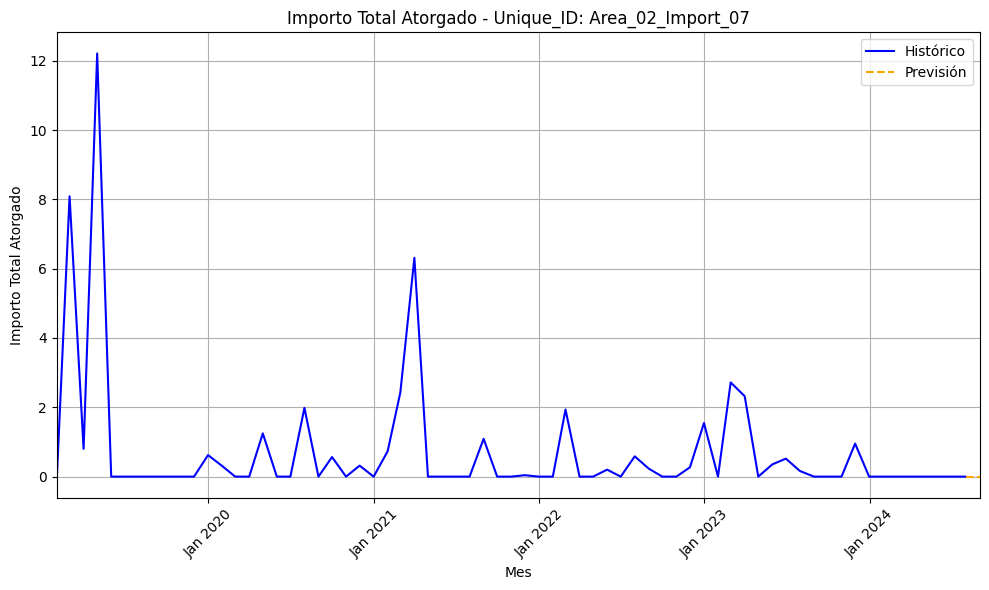

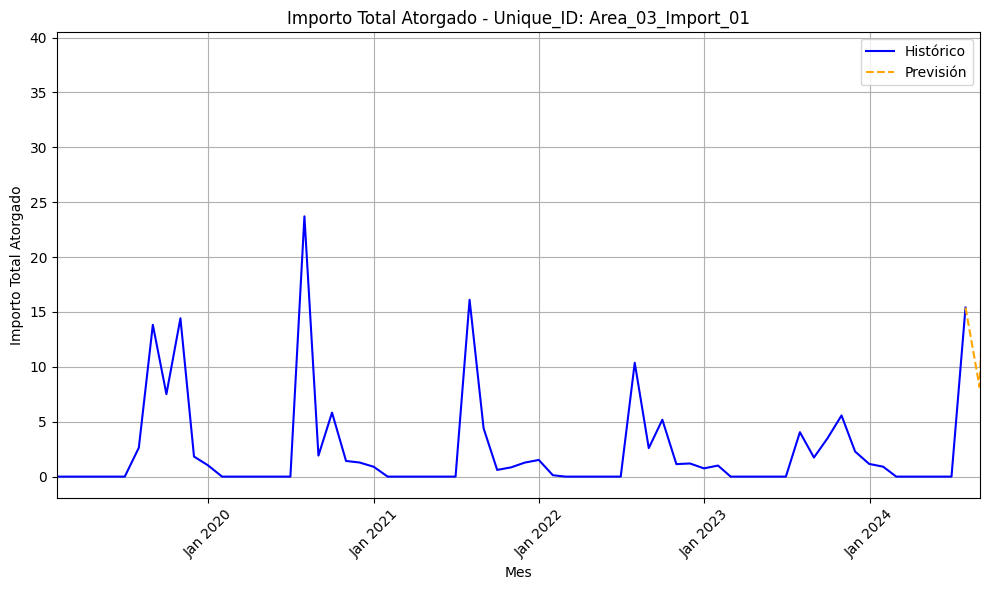

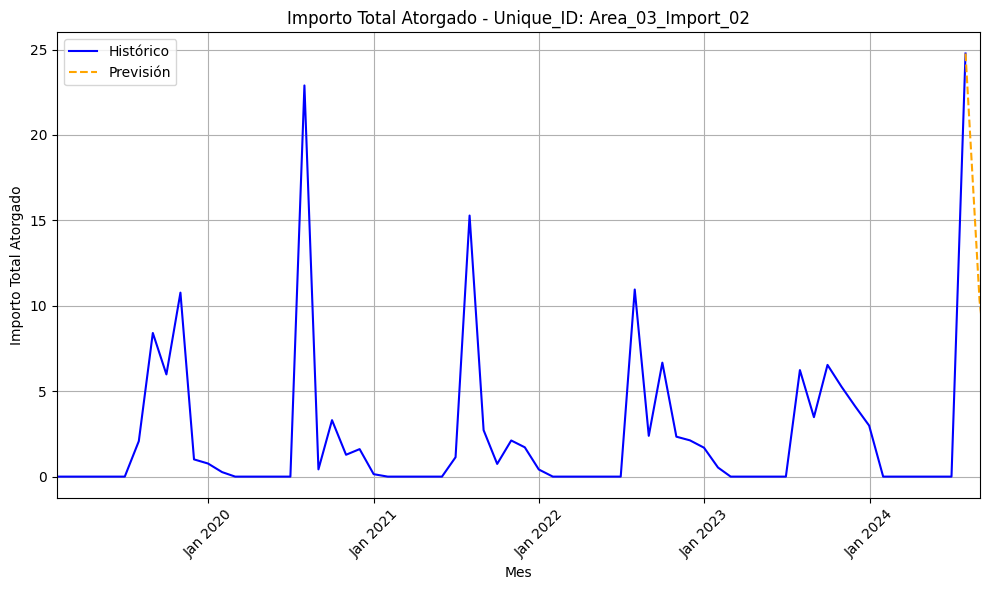

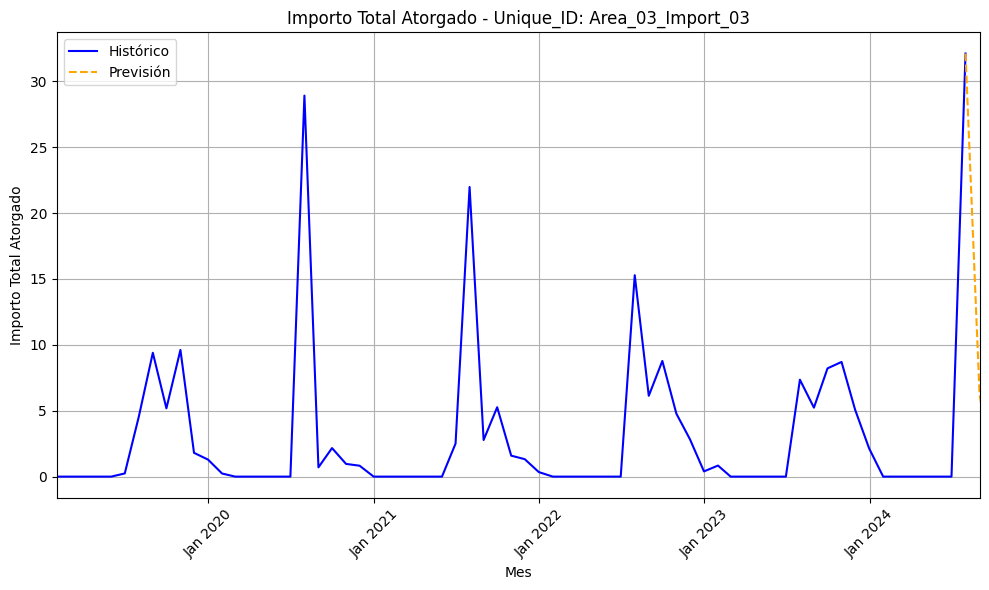

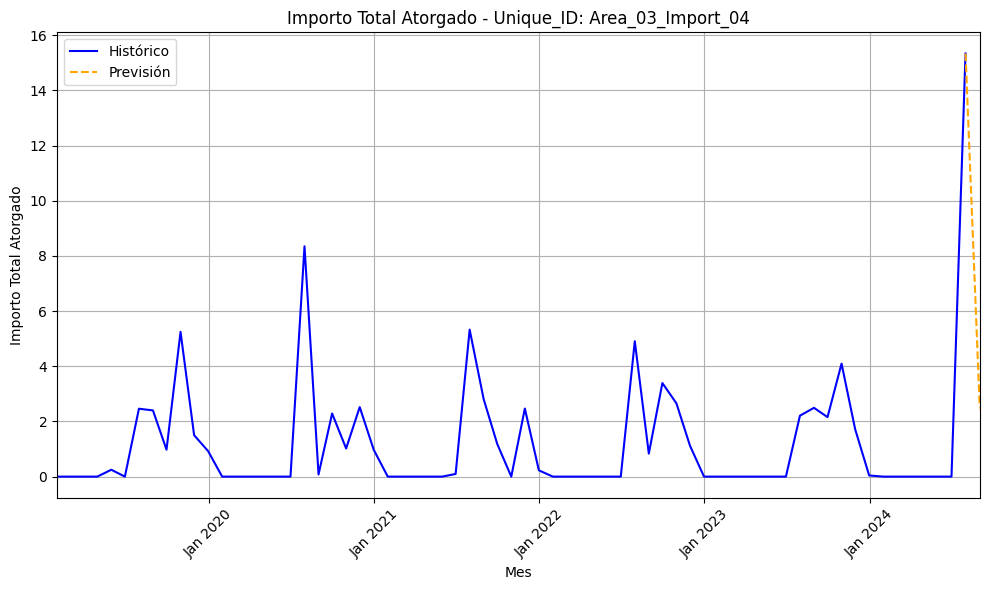

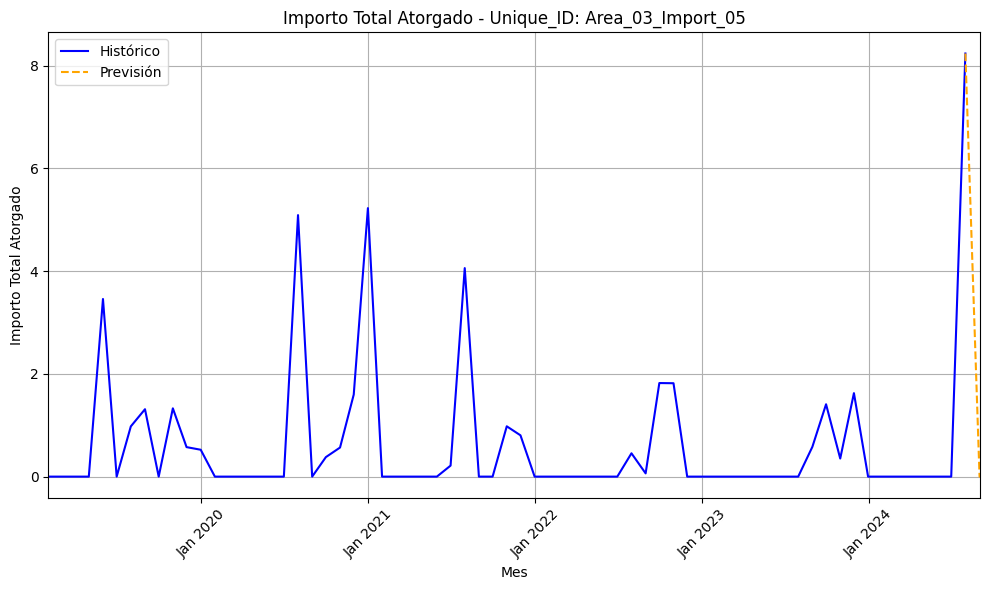

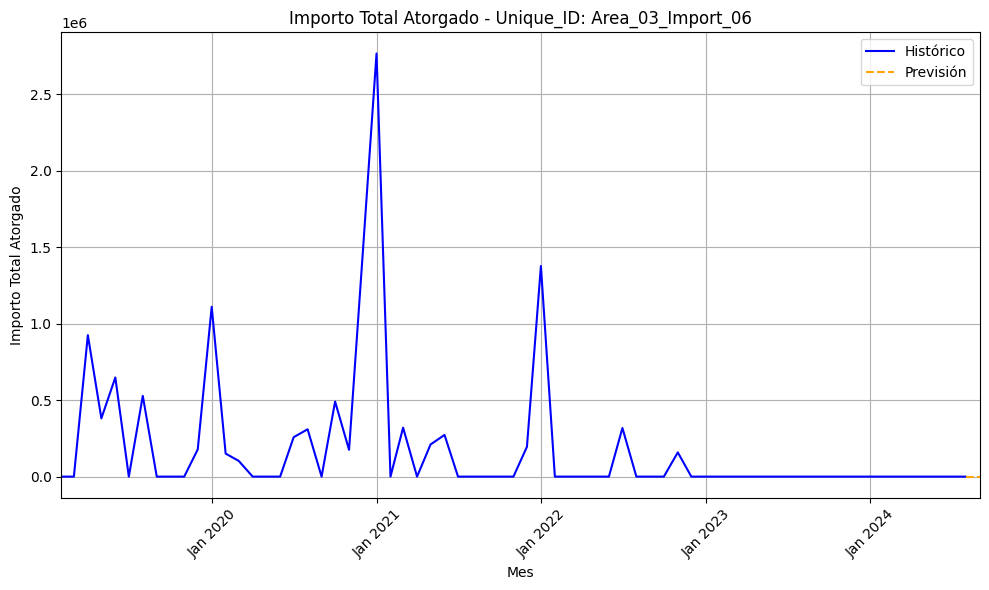

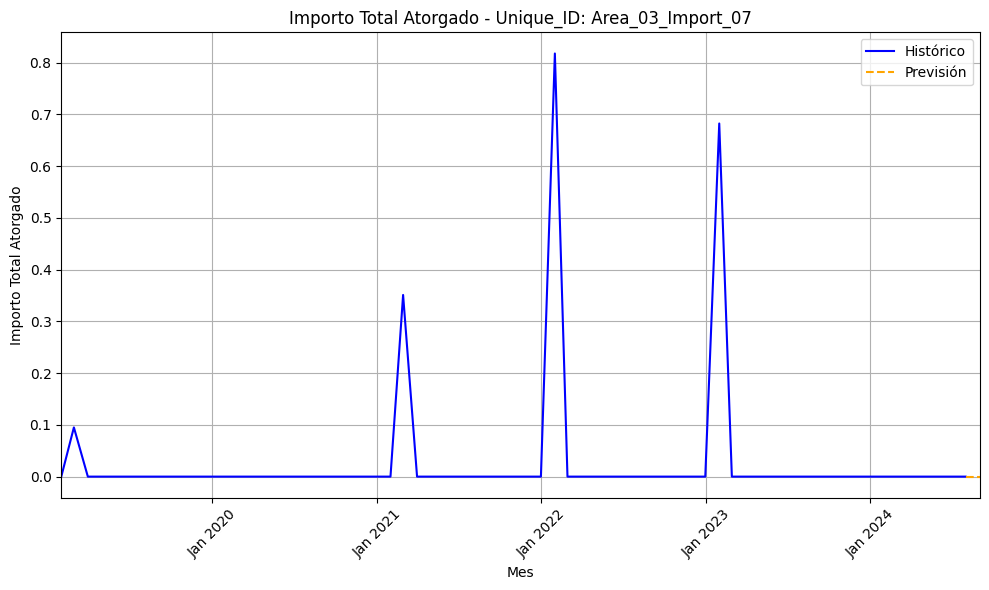

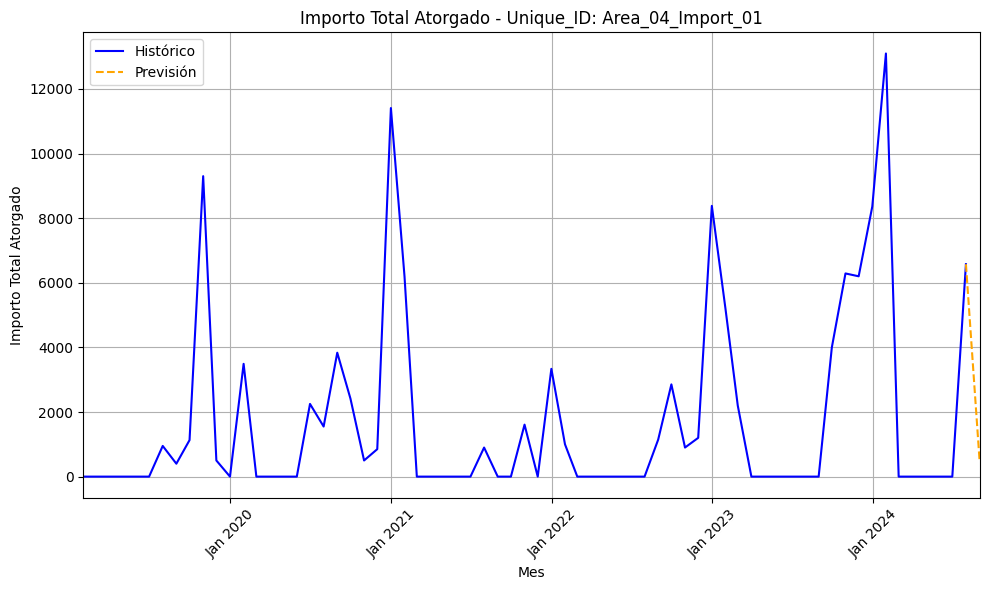

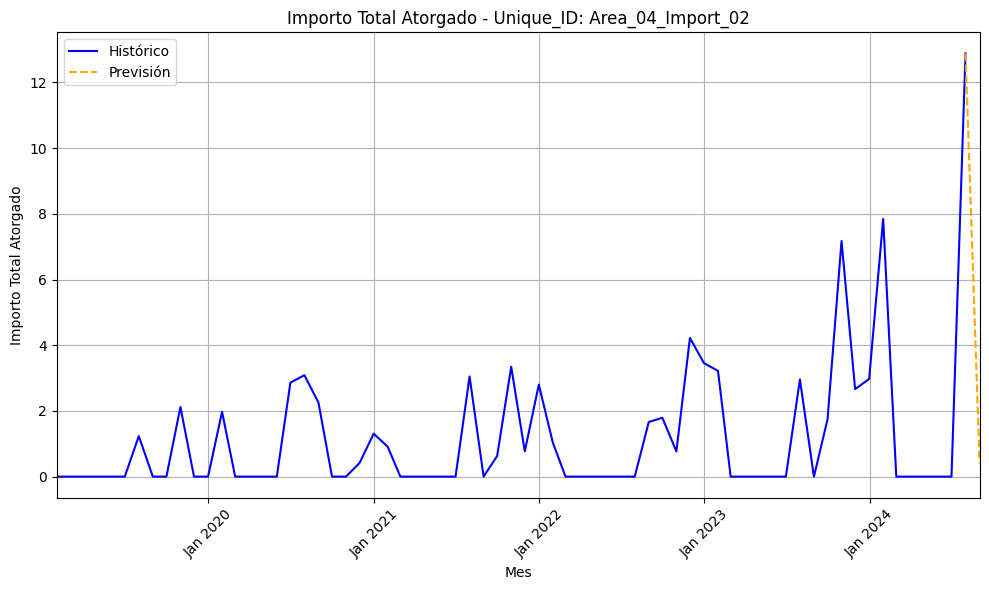

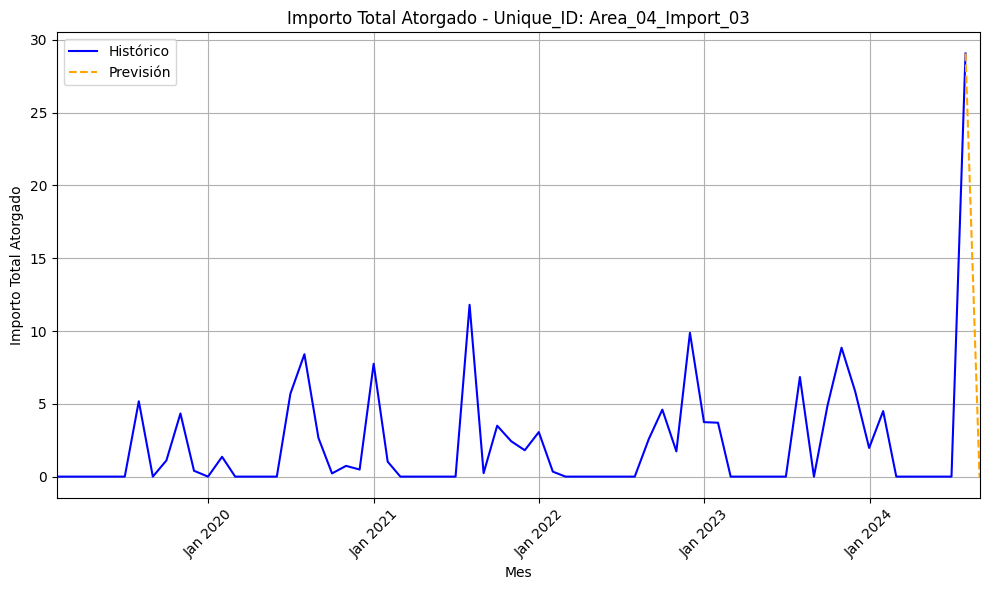

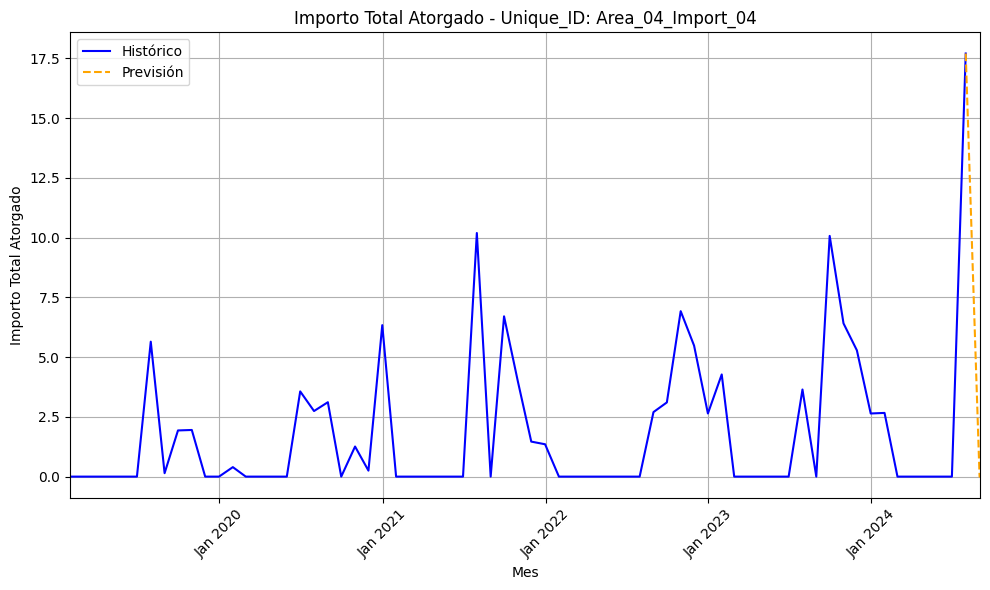

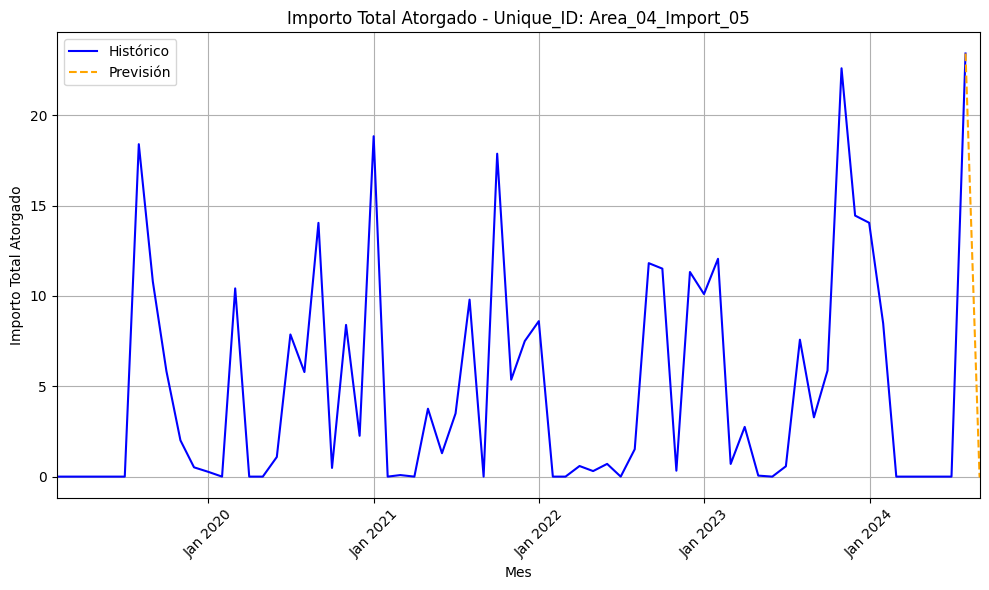

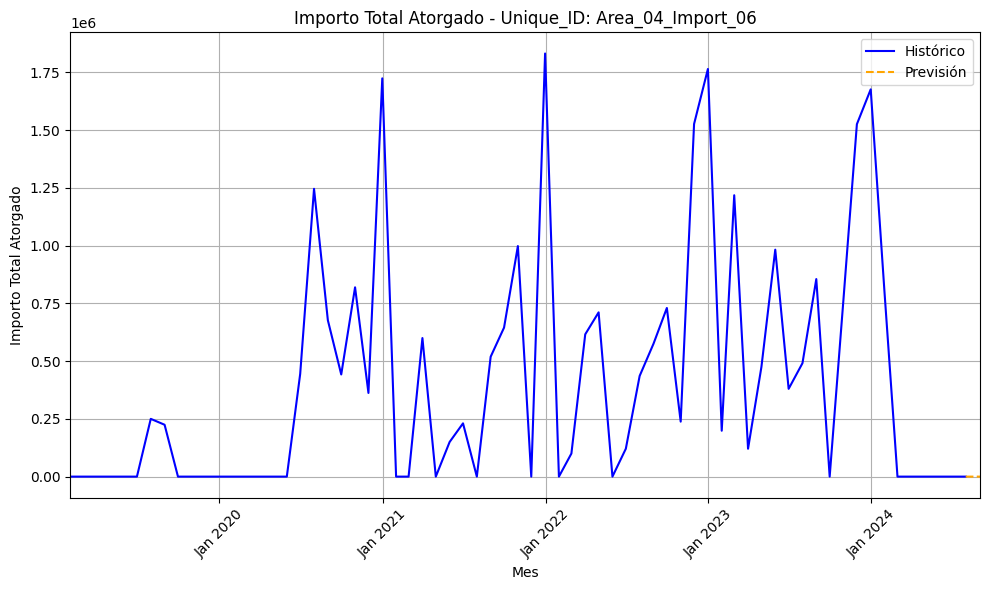

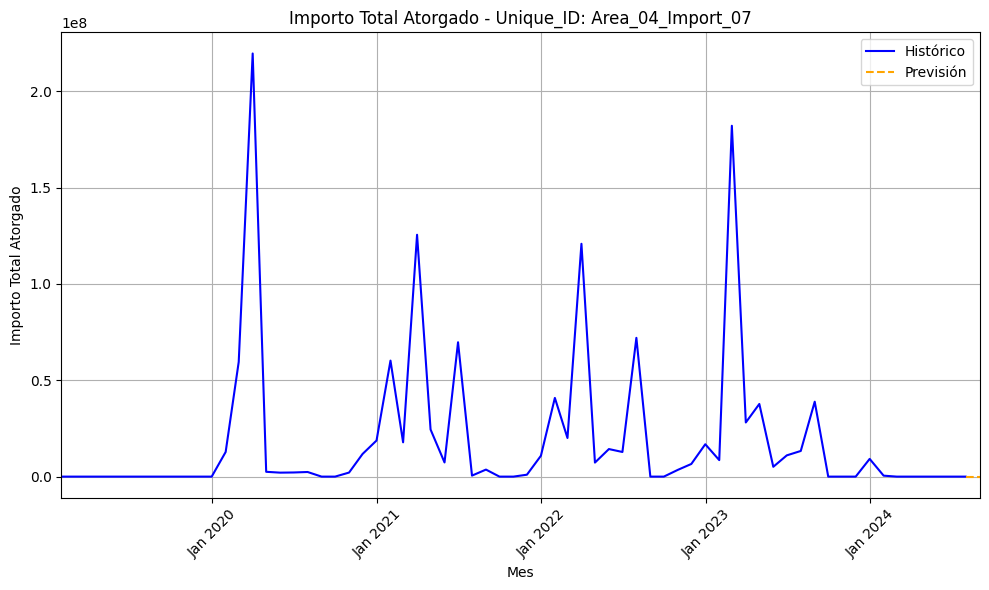

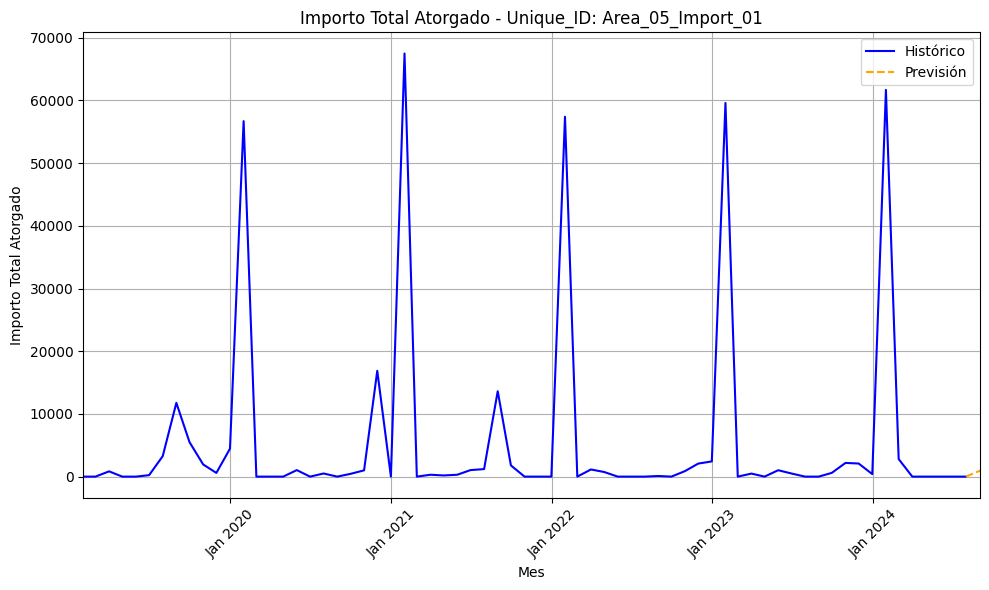

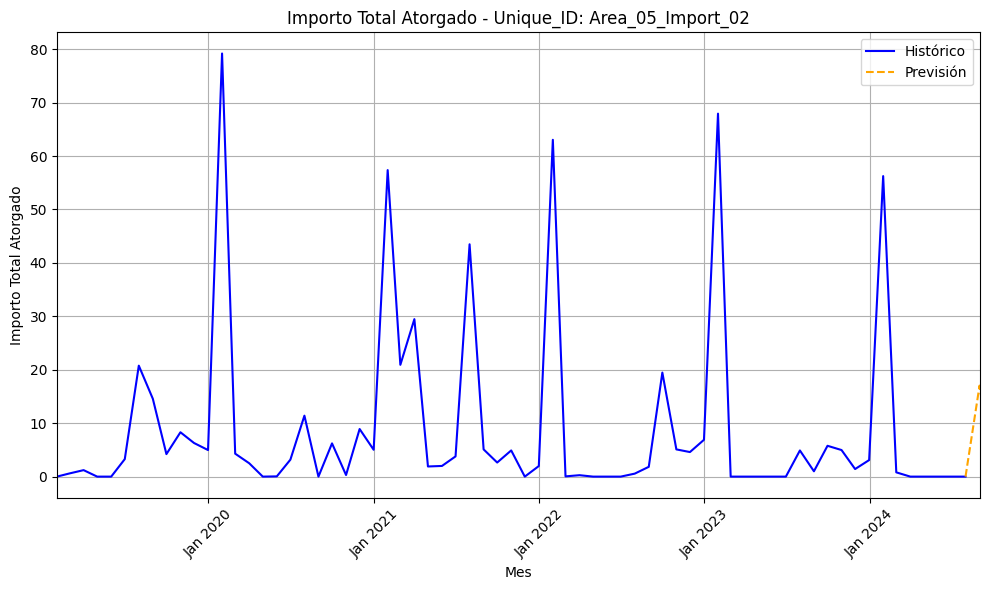

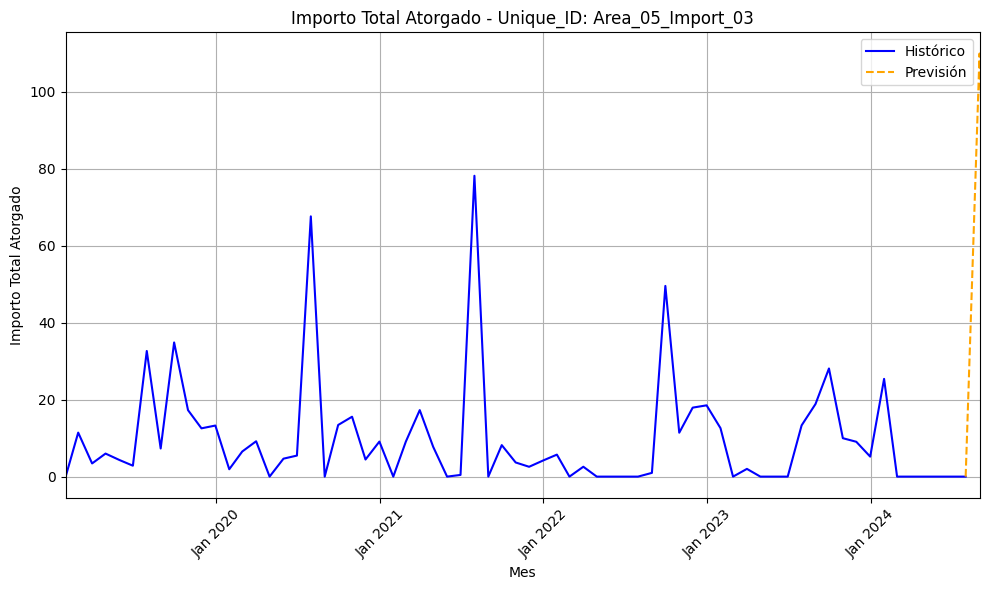

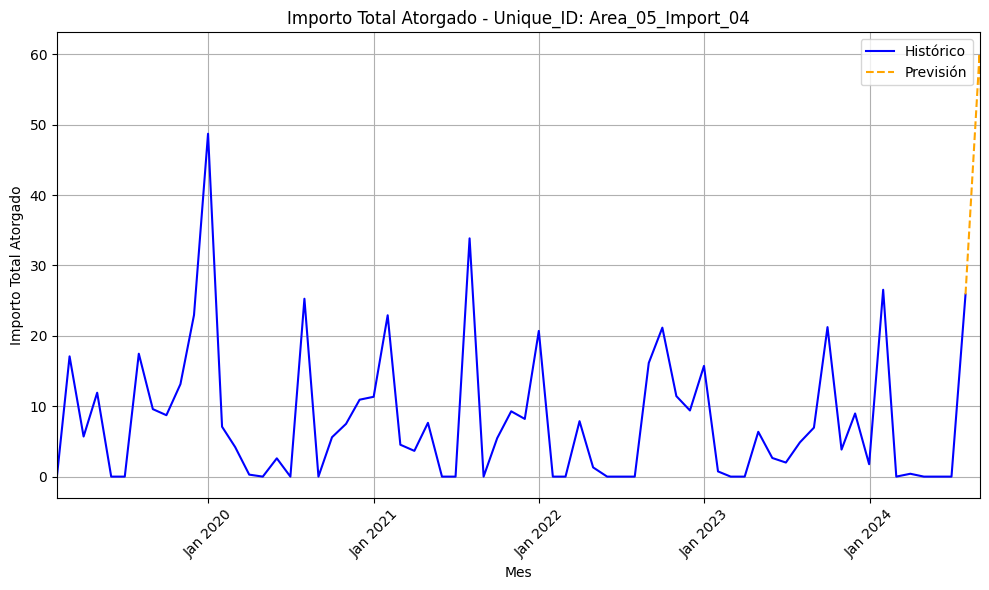

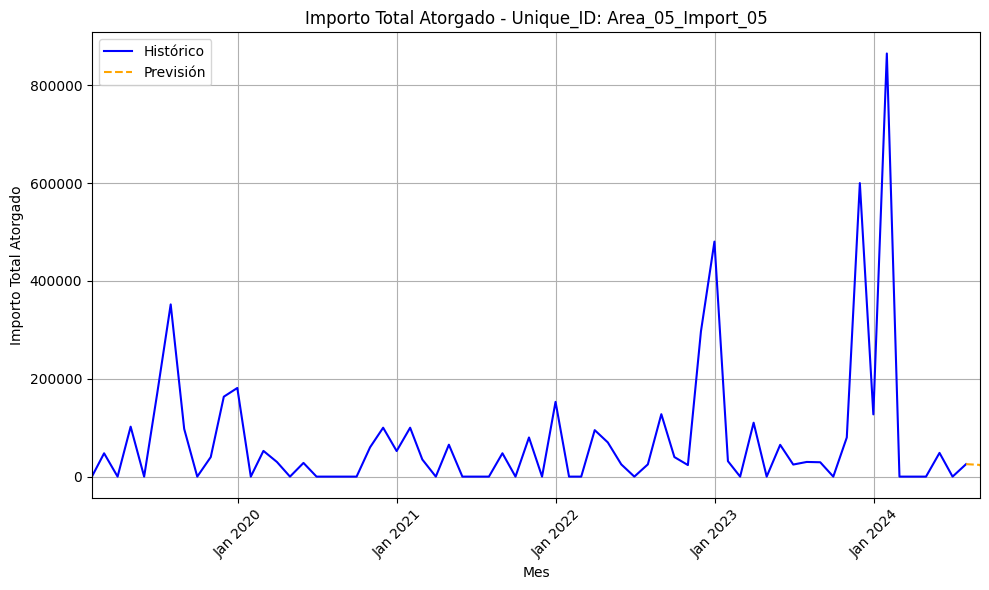

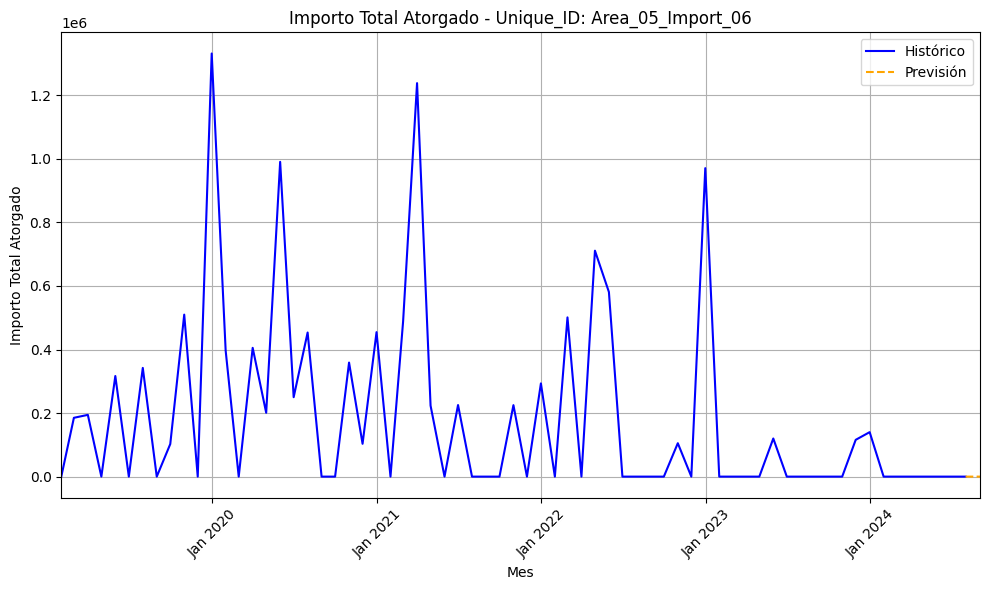

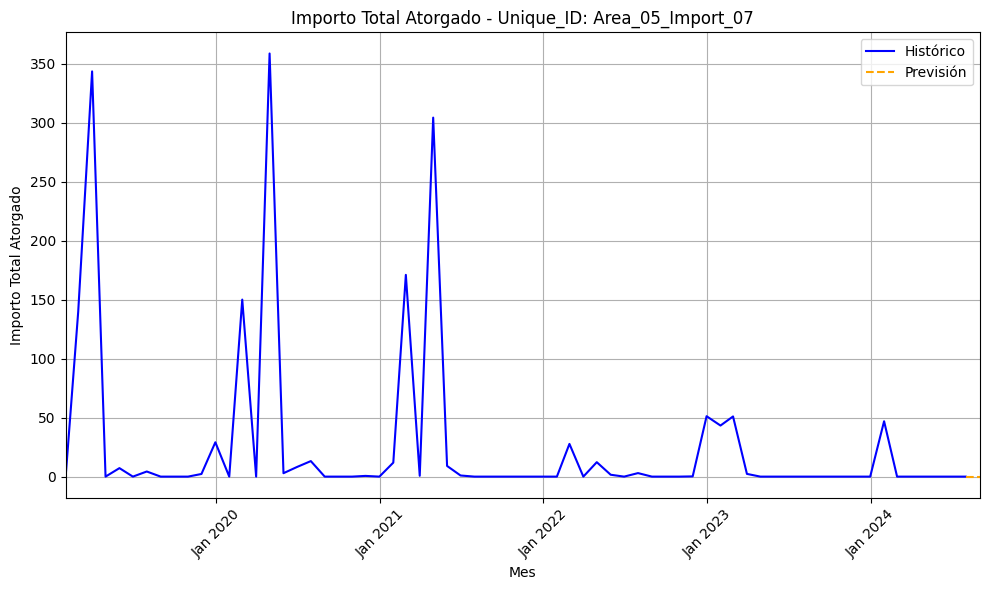

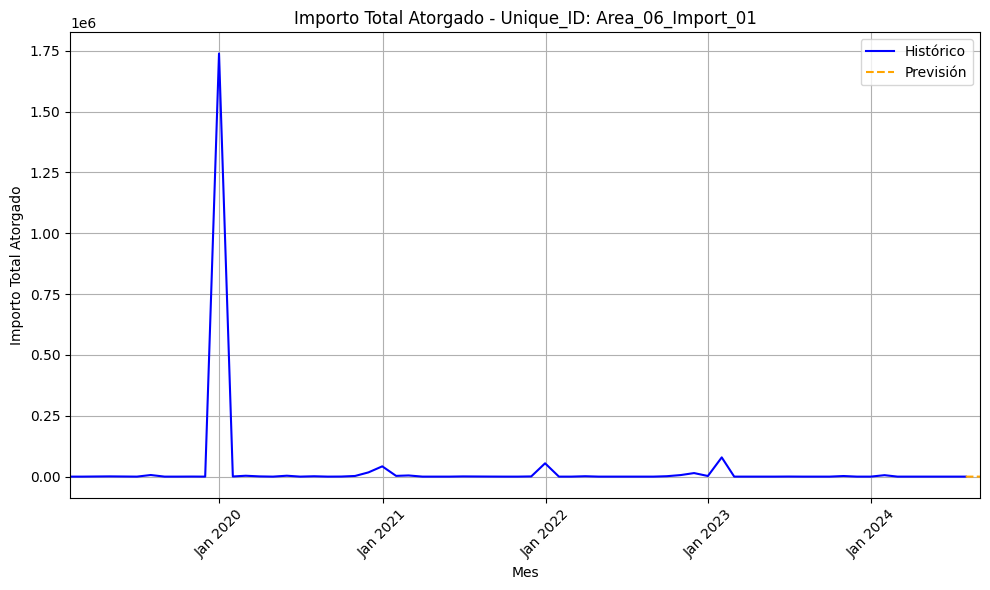

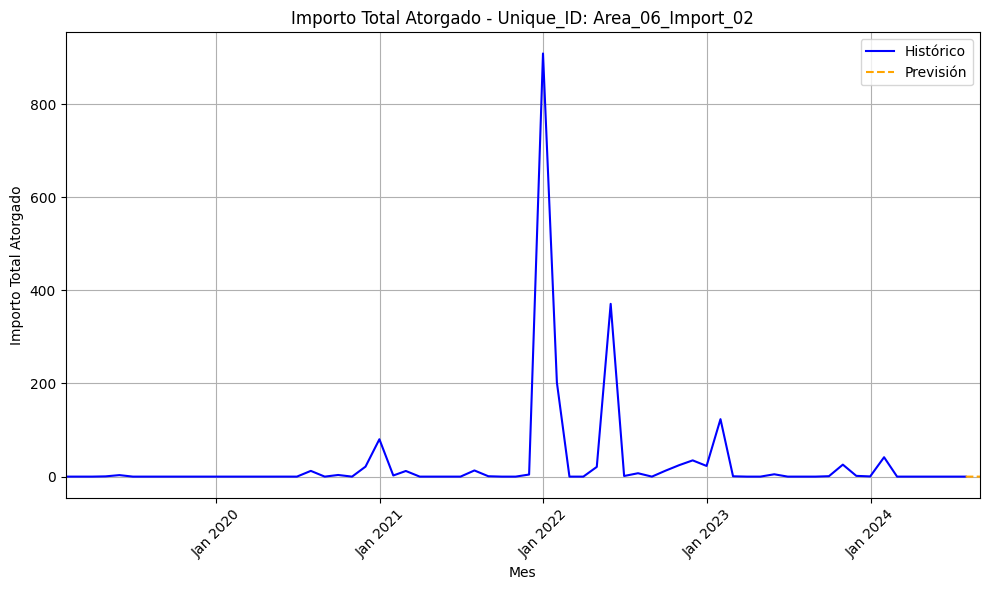

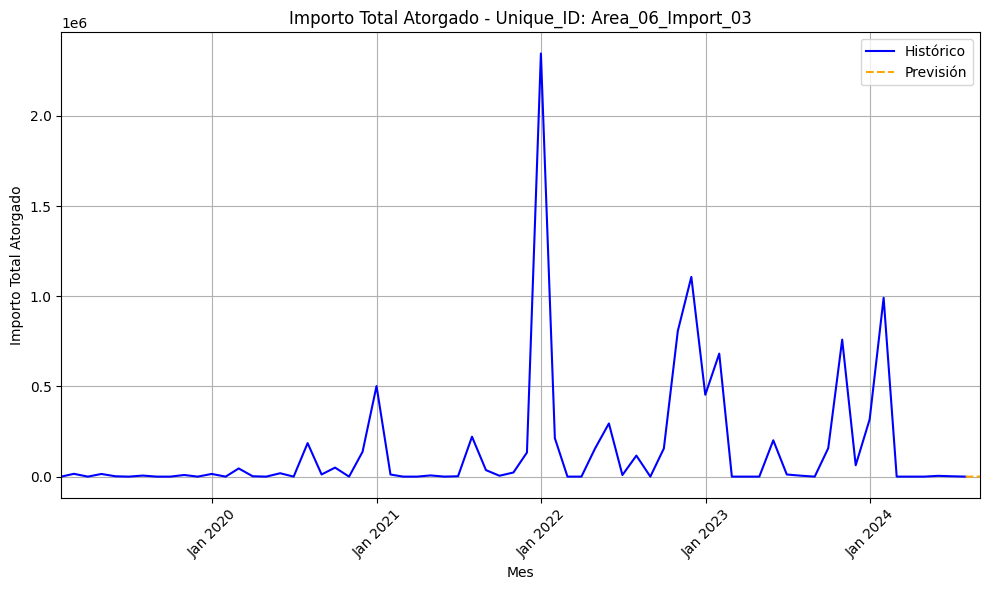

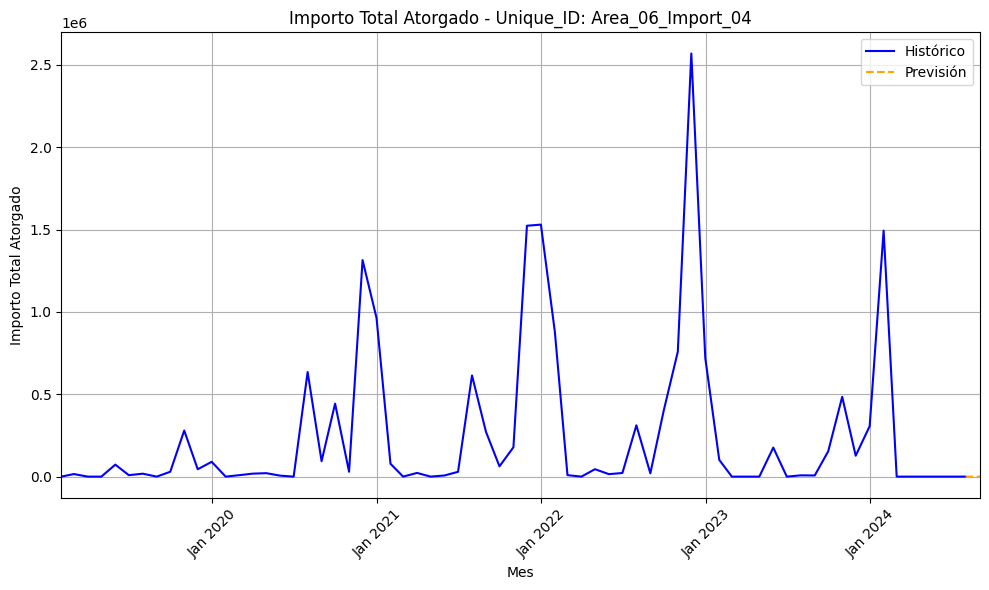

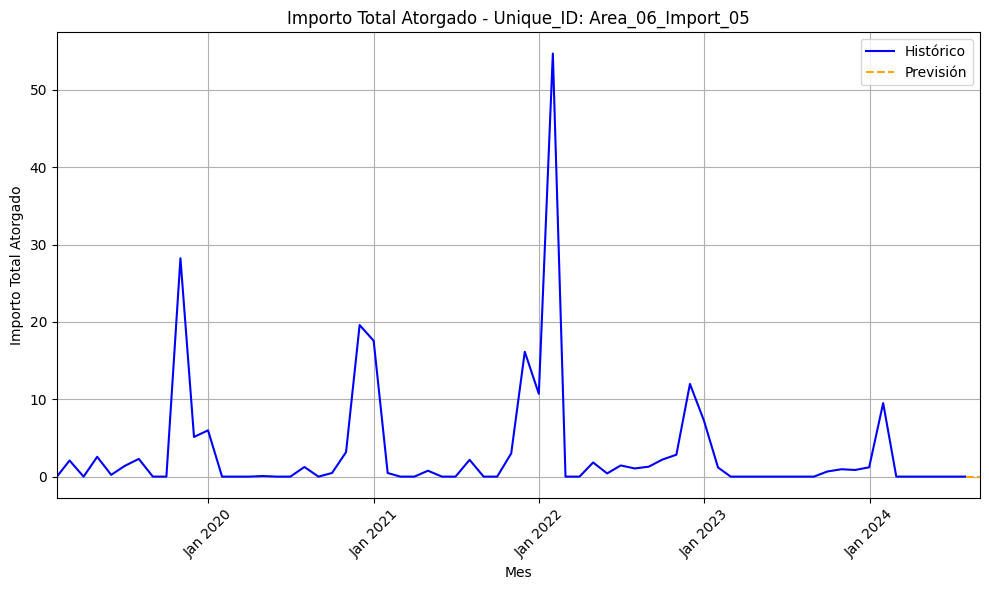

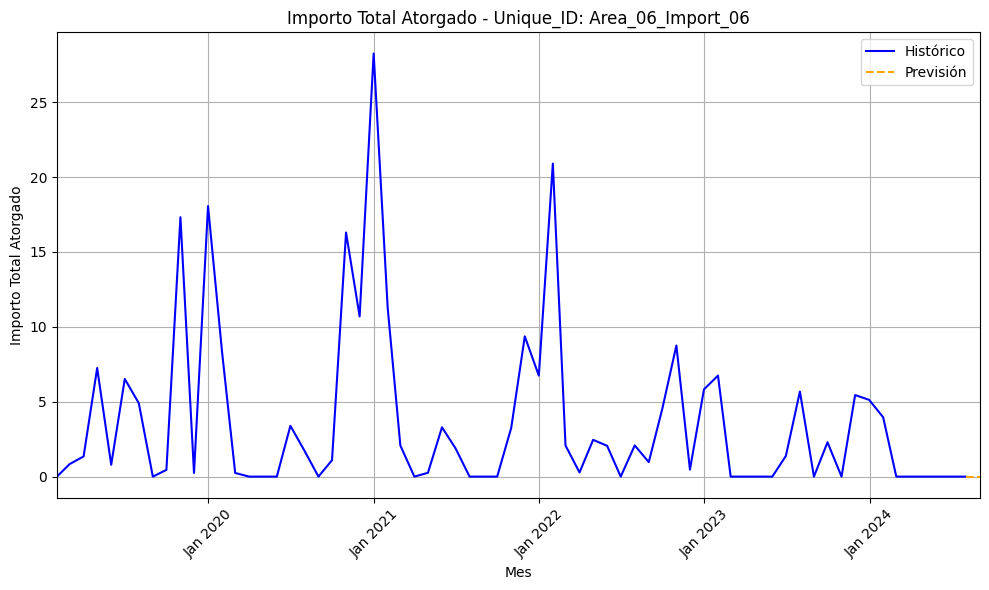

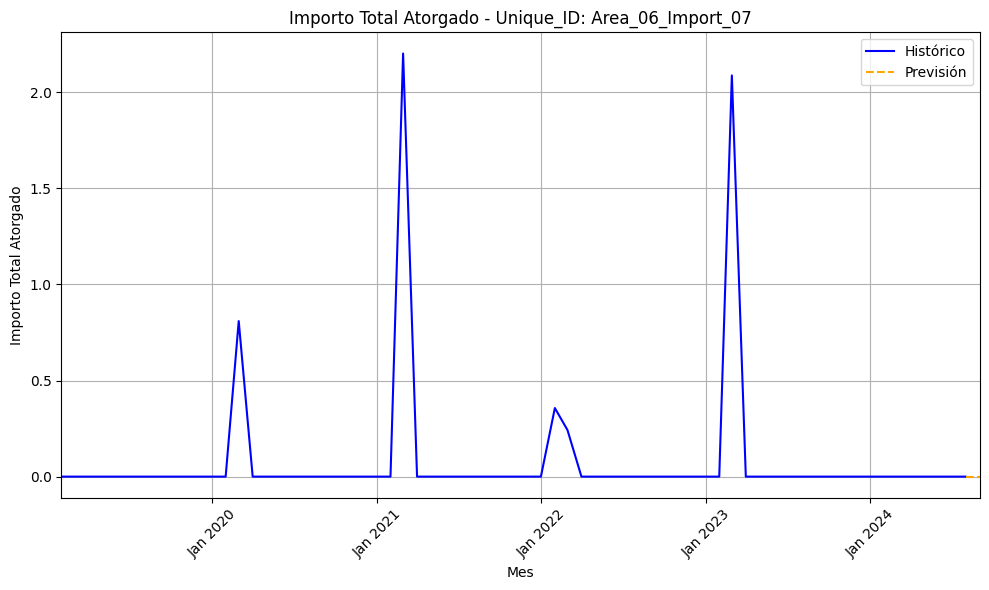

In [2344]:
# Función para visualizar la serie temporal para cada Unique_ID a partir del 2024
def plot_forecast(df, unique_id):
    # Filtrar los datos para el Unique_ID específico
    df_id = df[df['Unique_ID'] == unique_id]

    # # Filtrar los datos a partir de 2024
    # df_id = df_id[df_id['Data'] >= '2024-01-01']

    # Separar los datos históricos y previsiones
    df_historical = df_id[df_id['Data'] <= '2024-07-31']
    df_forecast = df_id[df_id['Data'] >= '2024-07-31']

    # Crear el gráfico
    plt.figure(figsize=(10, 6))

    # Trazar la línea para los datos históricos
    plt.plot(df_historical['Data'], df_historical['Import_Total_Atorgat'], label='Histórico', color='blue')

    # Trazar la línea para las previsiones
    plt.plot(df_forecast['Data'], df_forecast['Import_Total_Atorgat'], label='Previsión', color='orange', linestyle='--')

    # Limitar el eje X hasta septiembre 2024
    plt.xlim(df_historical['Data'].min(), pd.to_datetime('2024-09-01'))  # Convertir la fecha correctamente

    # Formatear el eje x para mostrar los meses
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

    # Añadir títulos y etiquetas
    plt.title(f"Importo Total Atorgado - Unique_ID: {unique_id}")
    plt.xlabel('Mes')
    plt.ylabel('Importo Total Atorgado')
    plt.legend()
    plt.grid(True)

    # Rotar las etiquetas del eje x para una mejor visualización
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Aplicar la función para cada Unique_ID
for unique_id in df_predicted['Unique_ID'].unique():
    plot_forecast(df_predicted, unique_id)


#### Observaciones sobre las predicciones

Como se puede ver, al aplicar las transformaciones inversas para llevar las predicciones a la escala original, los valores más grandes han "perdido precisión", es decir, por ejemplo, un valor que originalmente era 80e5 se registra como 80. Esto probablemente sucede porque los datos se distribuyen a una escala extremadamente grande, y en el momento de la transformación con expm1 los números que ya son grandes se vuelven enormes y los muy pequeños se vuelven próximos, y se produce la pérdida de precisión. En resumen, es un problema de gestión numérica, lo que significa que aunque las formas de los gráficos sean coherentes, las escalas en la mayoría de los casos no lo son.

Al momento de la entrega del proyecto, estoy evaluando otro tipo de transformaciones y/o estrategias para solucionar el problema, como la transformación Box-Cox.